# *+Processing with biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [6]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            


# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [7]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [8]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [9]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [10]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['GS_cub_m'])

In [11]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [12]:
# Columns in "y" data collections
y.head()

,GS_cub_m
0,43.9
1,254.0
2,190.0
3,277.7
4,142.5


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9707507894104143, 0.9697841897488096, 0.9542883589315168]
    Mean: 0.965
    Std: 0.008

 --------------------
Root-mean-square error (RMSE): 

    Scores: [22.8479464  27.29494215 28.30912931]
    Mean: 26.151
    Std: 2.372

 --------------------
Mean absolute error (MAE): 

    Scores: [14.44625411066976, 16.782850937076383, 15.905095343338816]
    Mean: 15.711
    Std: 0.964

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Hyperparameters data for the next step/stage
p1 = 0.8829191872975016               # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.4317747333990657               # gamma
print('Gamma: ' + str(p2))

p3 = 0.17029218845451208              # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 172         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.894854733579894            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8829191872975016
Gamma: 0.4317747333990657
Learning_rate: 0.17029218845451208
Max_depth: 4
N_estimators: 172
Subsample: 0.894854733579894


# Estimation of a basic XGBoost model using Loops

In [19]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [20]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
    
    
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)

[0]	validation_0-rmse:225.39305	validation_1-rmse:231.26018
[1]	validation_0-rmse:190.23503	validation_1-rmse:196.66565
[2]	validation_0-rmse:159.56620	validation_1-rmse:166.69835
[3]	validation_0-rmse:134.29354	validation_1-rmse:142.38324
[4]	validation_0-rmse:113.43848	validation_1-rmse:122.07418
[5]	validation_0-rmse:95.89585	validation_1-rmse:105.26181
[6]	validation_0-rmse:81.34772	validation_1-rmse:90.97249


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:69.37877	validation_1-rmse:79.65739
[8]	validation_0-rmse:60.17957	validation_1-rmse:70.63230
[9]	validation_0-rmse:51.94762	validation_1-rmse:62.69674
[10]	validation_0-rmse:45.15276	validation_1-rmse:56.24440
[11]	validation_0-rmse:39.72241	validation_1-rmse:51.10153
[12]	validation_0-rmse:35.41799	validation_1-rmse:46.43172
[13]	validation_0-rmse:31.64975	validation_1-rmse:42.61571
[14]	validation_0-rmse:28.92052	validation_1-rmse:39.56304
[15]	validation_0-rmse:26.65510	validation_1-rmse:37.02449
[16]	validation_0-rmse:24.91385	validation_1-rmse:35.16315
[17]	validation_0-rmse:23.57104	validation_1-rmse:33.34415
[18]	validation_0-rmse:22.41152	validation_1-rmse:32.19656
[19]	validation_0-rmse:21.49138	validation_1-rmse:31.28002
[20]	validation_0-rmse:20.66408	validation_1-rmse:30.09129
[21]	validation_0-rmse:20.00788	validation_1-rmse:29.39193
[22]	validation_0-rmse:19.50228	validation_1-rmse:28.65804
[23]	validation_0-rmse:19.11040	validation_1-rmse:27.99268


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:226.07770	validation_1-rmse:228.90889
[1]	validation_0-rmse:190.63827	validation_1-rmse:193.73945
[2]	validation_0-rmse:160.18917	validation_1-rmse:164.17327
[3]	validation_0-rmse:134.77624	validation_1-rmse:138.05995
[4]	validation_0-rmse:113.89984	validation_1-rmse:117.68244
[5]	validation_0-rmse:96.24242	validation_1-rmse:100.14538


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.71090	validation_1-rmse:86.19641
[7]	validation_0-rmse:69.75425	validation_1-rmse:74.75685
[8]	validation_0-rmse:60.55018	validation_1-rmse:66.22412
[9]	validation_0-rmse:52.34858	validation_1-rmse:58.68061
[10]	validation_0-rmse:45.66427	validation_1-rmse:52.14081
[11]	validation_0-rmse:40.21049	validation_1-rmse:47.13133
[12]	validation_0-rmse:35.93465	validation_1-rmse:42.88412
[13]	validation_0-rmse:32.24903	validation_1-rmse:39.70199
[14]	validation_0-rmse:29.30588	validation_1-rmse:37.22266
[15]	validation_0-rmse:27.06529	validation_1-rmse:35.10480
[16]	validation_0-rmse:25.24516	validation_1-rmse:33.28366
[17]	validation_0-rmse:23.86920	validation_1-rmse:31.80066
[18]	validation_0-rmse:22.79663	validation_1-rmse:31.30238
[19]	validation_0-rmse:21.82794	validation_1-rmse:30.38363
[20]	validation_0-rmse:21.09539	validation_1-rmse:29.45031
[21]	validation_0-rmse:20.45644	validation_1-rmse:28.79165
[22]	validation_0-rmse:19.70923	validation_1-rmse:28.37455
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.88412	validation_1-rmse:231.62526
[1]	validation_0-rmse:190.10932	validation_1-rmse:196.00411
[2]	validation_0-rmse:159.44713	validation_1-rmse:164.40973
[3]	validation_0-rmse:134.18037	validation_1-rmse:138.94722


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.47805	validation_1-rmse:118.81750
[5]	validation_0-rmse:96.08373	validation_1-rmse:101.21258
[6]	validation_0-rmse:81.63948	validation_1-rmse:87.13880
[7]	validation_0-rmse:69.65430	validation_1-rmse:75.30825
[8]	validation_0-rmse:60.16934	validation_1-rmse:65.86345
[9]	validation_0-rmse:51.98034	validation_1-rmse:58.31630
[10]	validation_0-rmse:45.30874	validation_1-rmse:51.97445
[11]	validation_0-rmse:39.82798	validation_1-rmse:47.08542
[12]	validation_0-rmse:35.47731	validation_1-rmse:43.46384
[13]	validation_0-rmse:31.88173	validation_1-rmse:39.77445
[14]	validation_0-rmse:28.93739	validation_1-rmse:37.09150
[15]	validation_0-rmse:26.53515	validation_1-rmse:35.07663
[16]	validation_0-rmse:24.65527	validation_1-rmse:33.23014
[17]	validation_0-rmse:23.27932	validation_1-rmse:32.11814
[18]	validation_0-rmse:22.10383	validation_1-rmse:31.11086
[19]	validation_0-rmse:21.14601	validation_1-rmse:30.24915
[20]	validation_0-rmse:20.29941	validation_1-rmse:29.45838


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.05965	validation_1-rmse:239.65811
[1]	validation_0-rmse:188.48632	validation_1-rmse:203.69023
[2]	validation_0-rmse:158.27405	validation_1-rmse:172.68956


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.12658	validation_1-rmse:146.45650
[4]	validation_0-rmse:112.55367	validation_1-rmse:124.70687
[5]	validation_0-rmse:95.45617	validation_1-rmse:106.20258
[6]	validation_0-rmse:81.03165	validation_1-rmse:91.02816
[7]	validation_0-rmse:69.43153	validation_1-rmse:78.83514
[8]	validation_0-rmse:60.09637	validation_1-rmse:68.73810
[9]	validation_0-rmse:51.88884	validation_1-rmse:60.44518
[10]	validation_0-rmse:45.36409	validation_1-rmse:53.21667
[11]	validation_0-rmse:40.03078	validation_1-rmse:47.10514
[12]	validation_0-rmse:36.14320	validation_1-rmse:42.84954
[13]	validation_0-rmse:32.35010	validation_1-rmse:38.78021
[14]	validation_0-rmse:29.44755	validation_1-rmse:35.98416
[15]	validation_0-rmse:26.97023	validation_1-rmse:33.36162
[16]	validation_0-rmse:25.28334	validation_1-rmse:31.45528
[17]	validation_0-rmse:23.90672	validation_1-rmse:30.05693
[18]	validation_0-rmse:22.75427	validation_1-rmse:29.16279
[19]	validation_0-rmse:21.73094	validation_1-rmse:28.02593

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.09626	validation_1-rmse:220.51688
[1]	validation_0-rmse:192.58503	validation_1-rmse:185.49808
[2]	validation_0-rmse:161.71377	validation_1-rmse:156.70713
[3]	validation_0-rmse:135.86584	validation_1-rmse:132.48028
[4]	validation_0-rmse:114.92548	validation_1-rmse:113.11036
[5]	validation_0-rmse:97.21958	validation_1-rmse:96.28491
[6]	validation_0-rmse:82.60507	validation_1-rmse:82.68111
[7]	validation_0-rmse:70.63331	validation_1-rmse:71.32292
[8]	validation_0-rmse:61.16407	validation_1-rmse:62.03671
[9]	validation_0-rmse:52.84704	validation_1-rmse:54.41710
[10]	validation_0-rmse:46.01003	validation_1-rmse:48.59065
[11]	validation_0-rmse:40.35116	validation_1-rmse:43.46494
[12]	validation_0-rmse:36.20205	validation_1-rmse:39.44408
[13]	validation_0-rmse:32.47934	validation_1-rmse:36.52944
[14]	validation_0-rmse:29.54004	validation_1-rmse:33.94108
[15]	validation_0-rmse:27.13157	validation_1-rmse:32.01373
[16]	validation_0-rmse:25.23896	validation_1-rmse:30.545

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.65410	validation_1-rmse:224.27215
[1]	validation_0-rmse:191.07560	validation_1-rmse:188.51438
[2]	validation_0-rmse:160.12105	validation_1-rmse:157.80003


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.81067	validation_1-rmse:132.43929
[4]	validation_0-rmse:114.13110	validation_1-rmse:111.96476
[5]	validation_0-rmse:96.52998	validation_1-rmse:95.49511
[6]	validation_0-rmse:81.82559	validation_1-rmse:81.27847
[7]	validation_0-rmse:69.78669	validation_1-rmse:69.89715
[8]	validation_0-rmse:60.49776	validation_1-rmse:61.40838
[9]	validation_0-rmse:52.01126	validation_1-rmse:54.25493
[10]	validation_0-rmse:45.38491	validation_1-rmse:48.52449
[11]	validation_0-rmse:39.90238	validation_1-rmse:43.91576
[12]	validation_0-rmse:35.75787	validation_1-rmse:40.63293
[13]	validation_0-rmse:31.93613	validation_1-rmse:37.93261
[14]	validation_0-rmse:28.83545	validation_1-rmse:35.82519
[15]	validation_0-rmse:26.47861	validation_1-rmse:34.26186
[16]	validation_0-rmse:24.62743	validation_1-rmse:33.28367
[17]	validation_0-rmse:23.21168	validation_1-rmse:32.46922
[18]	validation_0-rmse:21.97671	validation_1-rmse:31.66225
[19]	validation_0-rmse:20.99476	validation_1-rmse:31.06722


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.07677	validation_1-rmse:209.53995
[1]	validation_0-rmse:193.81011	validation_1-rmse:175.72111
[2]	validation_0-rmse:162.75309	validation_1-rmse:146.70168
[3]	validation_0-rmse:136.99063	validation_1-rmse:122.71944
[4]	validation_0-rmse:116.06828	validation_1-rmse:102.12254
[5]	validation_0-rmse:98.04219	validation_1-rmse:85.09389
[6]	validation_0-rmse:83.28546	validation_1-rmse:71.62069
[7]	validation_0-rmse:70.99746	validation_1-rmse:60.22838
[8]	validation_0-rmse:61.55447	validation_1-rmse:52.17642


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:53.04263	validation_1-rmse:44.82534
[10]	validation_0-rmse:46.01891	validation_1-rmse:39.06681
[11]	validation_0-rmse:40.45201	validation_1-rmse:34.81292
[12]	validation_0-rmse:36.28248	validation_1-rmse:31.49768
[13]	validation_0-rmse:32.35998	validation_1-rmse:29.14674
[14]	validation_0-rmse:29.41393	validation_1-rmse:27.31248
[15]	validation_0-rmse:26.96556	validation_1-rmse:26.17769
[16]	validation_0-rmse:25.21278	validation_1-rmse:25.61354
[17]	validation_0-rmse:23.74456	validation_1-rmse:25.28789
[18]	validation_0-rmse:22.60901	validation_1-rmse:25.16321
[19]	validation_0-rmse:21.78944	validation_1-rmse:25.11667
[20]	validation_0-rmse:21.00585	validation_1-rmse:25.32579
[21]	validation_0-rmse:20.25637	validation_1-rmse:25.30563
[22]	validation_0-rmse:19.76388	validation_1-rmse:25.29831
[23]	validation_0-rmse:19.25179	validation_1-rmse:25.39763
[24]	validation_0-rmse:18.82139	validation_1-rmse:25.54905
[25]	validation_0-rmse:18.33672	validation_1-rmse:25.4014

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.98595	validation_1-rmse:230.59872
[1]	validation_0-rmse:190.73174	validation_1-rmse:194.55939
[2]	validation_0-rmse:159.85498	validation_1-rmse:164.48884
[3]	validation_0-rmse:134.39174	validation_1-rmse:139.41173
[4]	validation_0-rmse:113.58401	validation_1-rmse:119.79606
[5]	validation_0-rmse:95.91118	validation_1-rmse:102.82229


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.38243	validation_1-rmse:89.13272
[7]	validation_0-rmse:69.42646	validation_1-rmse:77.93841
[8]	validation_0-rmse:59.97536	validation_1-rmse:69.88560
[9]	validation_0-rmse:51.62875	validation_1-rmse:62.43695
[10]	validation_0-rmse:44.75948	validation_1-rmse:56.61301
[11]	validation_0-rmse:39.12227	validation_1-rmse:52.23391
[12]	validation_0-rmse:35.01138	validation_1-rmse:49.09018
[13]	validation_0-rmse:31.37603	validation_1-rmse:46.44771
[14]	validation_0-rmse:28.52366	validation_1-rmse:44.28344
[15]	validation_0-rmse:26.14108	validation_1-rmse:42.54682
[16]	validation_0-rmse:24.34627	validation_1-rmse:40.86433
[17]	validation_0-rmse:22.75983	validation_1-rmse:39.33289
[18]	validation_0-rmse:21.61829	validation_1-rmse:38.38306
[19]	validation_0-rmse:20.71417	validation_1-rmse:37.50170
[20]	validation_0-rmse:19.95014	validation_1-rmse:36.81206
[21]	validation_0-rmse:19.28835	validation_1-rmse:36.33456
[22]	validation_0-rmse:18.72020	validation_1-rmse:36.05057
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.38818	validation_1-rmse:222.51640
[1]	validation_0-rmse:192.25003	validation_1-rmse:188.31005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.36625	validation_1-rmse:158.53091
[3]	validation_0-rmse:135.74003	validation_1-rmse:133.68540
[4]	validation_0-rmse:114.53936	validation_1-rmse:113.39993
[5]	validation_0-rmse:96.83119	validation_1-rmse:97.25042
[6]	validation_0-rmse:82.00826	validation_1-rmse:83.66410
[7]	validation_0-rmse:69.81429	validation_1-rmse:72.55208
[8]	validation_0-rmse:60.37722	validation_1-rmse:64.30854
[9]	validation_0-rmse:52.12821	validation_1-rmse:57.41673
[10]	validation_0-rmse:45.33503	validation_1-rmse:52.01619
[11]	validation_0-rmse:39.73071	validation_1-rmse:47.89541
[12]	validation_0-rmse:35.46535	validation_1-rmse:44.53197
[13]	validation_0-rmse:31.74494	validation_1-rmse:41.94071
[14]	validation_0-rmse:28.76864	validation_1-rmse:39.77952
[15]	validation_0-rmse:26.44301	validation_1-rmse:38.31724
[16]	validation_0-rmse:24.56408	validation_1-rmse:36.91034
[17]	validation_0-rmse:23.05134	validation_1-rmse:36.20362
[18]	validation_0-rmse:21.94254	validation_1-rmse:35.69567

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.26373	validation_1-rmse:231.04319
[1]	validation_0-rmse:190.06882	validation_1-rmse:194.69713
[2]	validation_0-rmse:159.60125	validation_1-rmse:163.13335
[3]	validation_0-rmse:134.36911	validation_1-rmse:136.55725
[4]	validation_0-rmse:113.65097	validation_1-rmse:116.15360
[5]	validation_0-rmse:96.22543	validation_1-rmse:98.53469
[6]	validation_0-rmse:81.89713	validation_1-rmse:83.80972
[7]	validation_0-rmse:69.85449	validation_1-rmse:71.90299
[8]	validation_0-rmse:60.54815	validation_1-rmse:63.04859
[9]	validation_0-rmse:52.37903	validation_1-rmse:54.92535
[10]	validation_0-rmse:45.73823	validation_1-rmse:48.57519
[11]	validation_0-rmse:40.40150	validation_1-rmse:43.56538
[12]	validation_0-rmse:36.34647	validation_1-rmse:39.64533
[13]	validation_0-rmse:32.67809	validation_1-rmse:36.49790
[14]	validation_0-rmse:29.76671	validation_1-rmse:34.05791
[15]	validation_0-rmse:27.46793	validation_1-rmse:32.03219
[16]	validation_0-rmse:25.46760	validation_1-rmse:30.517

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.80864	validation_1-rmse:223.86457


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.17241	validation_1-rmse:189.04178
[2]	validation_0-rmse:160.47871	validation_1-rmse:158.31898
[3]	validation_0-rmse:135.16691	validation_1-rmse:131.75816
[4]	validation_0-rmse:114.13578	validation_1-rmse:110.98493
[5]	validation_0-rmse:96.49480	validation_1-rmse:94.12907
[6]	validation_0-rmse:81.81654	validation_1-rmse:80.17833
[7]	validation_0-rmse:69.73299	validation_1-rmse:68.49327
[8]	validation_0-rmse:60.21024	validation_1-rmse:59.53111
[9]	validation_0-rmse:52.07913	validation_1-rmse:51.51542
[10]	validation_0-rmse:45.41919	validation_1-rmse:45.22480
[11]	validation_0-rmse:39.99120	validation_1-rmse:40.05711
[12]	validation_0-rmse:35.81990	validation_1-rmse:36.58145
[13]	validation_0-rmse:32.37795	validation_1-rmse:33.56287
[14]	validation_0-rmse:29.54923	validation_1-rmse:31.65621
[15]	validation_0-rmse:27.29656	validation_1-rmse:29.76991
[16]	validation_0-rmse:25.55148	validation_1-rmse:28.28186
[17]	validation_0-rmse:24.16872	validation_1-rmse:27.1498

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.87069	validation_1-rmse:234.00308
[1]	validation_0-rmse:189.40730	validation_1-rmse:199.67371
[2]	validation_0-rmse:159.13506	validation_1-rmse:170.03497
[3]	validation_0-rmse:133.86266	validation_1-rmse:145.17258
[4]	validation_0-rmse:113.07050	validation_1-rmse:125.03751
[5]	validation_0-rmse:95.68833	validation_1-rmse:108.40128
[6]	validation_0-rmse:81.26824	validation_1-rmse:94.47444
[7]	validation_0-rmse:69.38710	validation_1-rmse:82.99044
[8]	validation_0-rmse:60.10532	validation_1-rmse:73.92062
[9]	validation_0-rmse:51.96346	validation_1-rmse:66.01185


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:45.28850	validation_1-rmse:59.38112
[11]	validation_0-rmse:39.91545	validation_1-rmse:54.52683
[12]	validation_0-rmse:35.75950	validation_1-rmse:50.49429
[13]	validation_0-rmse:32.14575	validation_1-rmse:46.98285
[14]	validation_0-rmse:29.29789	validation_1-rmse:43.98569
[15]	validation_0-rmse:27.02552	validation_1-rmse:41.38649
[16]	validation_0-rmse:25.22571	validation_1-rmse:39.79197
[17]	validation_0-rmse:23.72316	validation_1-rmse:38.06095
[18]	validation_0-rmse:22.70471	validation_1-rmse:37.18331
[19]	validation_0-rmse:21.82248	validation_1-rmse:36.00442
[20]	validation_0-rmse:21.12021	validation_1-rmse:34.98344
[21]	validation_0-rmse:20.42524	validation_1-rmse:33.96602
[22]	validation_0-rmse:19.97940	validation_1-rmse:33.36817
[23]	validation_0-rmse:19.61095	validation_1-rmse:32.78801
[24]	validation_0-rmse:19.20223	validation_1-rmse:32.40084
[25]	validation_0-rmse:18.78289	validation_1-rmse:31.91410
[26]	validation_0-rmse:18.50905	validation_1-rmse:31.620

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.61459	validation_1-rmse:216.18967
[1]	validation_0-rmse:192.82199	validation_1-rmse:182.07379
[2]	validation_0-rmse:161.54139	validation_1-rmse:152.96916


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.65293	validation_1-rmse:128.88176
[4]	validation_0-rmse:114.55018	validation_1-rmse:109.52478
[5]	validation_0-rmse:96.91951	validation_1-rmse:93.64588
[6]	validation_0-rmse:81.99779	validation_1-rmse:79.98946
[7]	validation_0-rmse:70.04089	validation_1-rmse:69.36534
[8]	validation_0-rmse:60.43627	validation_1-rmse:60.53776
[9]	validation_0-rmse:52.08807	validation_1-rmse:53.05496
[10]	validation_0-rmse:45.13609	validation_1-rmse:47.17065
[11]	validation_0-rmse:39.51578	validation_1-rmse:42.57536
[12]	validation_0-rmse:35.22781	validation_1-rmse:39.43466
[13]	validation_0-rmse:31.49406	validation_1-rmse:36.40297
[14]	validation_0-rmse:28.58368	validation_1-rmse:34.56023
[15]	validation_0-rmse:26.29340	validation_1-rmse:33.01253
[16]	validation_0-rmse:24.45212	validation_1-rmse:31.53198
[17]	validation_0-rmse:22.93014	validation_1-rmse:30.45747
[18]	validation_0-rmse:21.75648	validation_1-rmse:29.59864
[19]	validation_0-rmse:20.85642	validation_1-rmse:29.08064


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.74122	validation_1-rmse:235.24180
[1]	validation_0-rmse:189.71665	validation_1-rmse:199.53364
[2]	validation_0-rmse:159.27464	validation_1-rmse:169.06356
[3]	validation_0-rmse:133.96427	validation_1-rmse:142.83212
[4]	validation_0-rmse:113.33143	validation_1-rmse:121.36032
[5]	validation_0-rmse:95.88299	validation_1-rmse:103.16840
[6]	validation_0-rmse:81.39744	validation_1-rmse:87.40787


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:69.74514	validation_1-rmse:75.45103
[8]	validation_0-rmse:60.34443	validation_1-rmse:66.48639
[9]	validation_0-rmse:52.15583	validation_1-rmse:58.19771
[10]	validation_0-rmse:45.40519	validation_1-rmse:51.09397
[11]	validation_0-rmse:39.78561	validation_1-rmse:45.98585
[12]	validation_0-rmse:35.73649	validation_1-rmse:41.98377
[13]	validation_0-rmse:32.09856	validation_1-rmse:38.11358
[14]	validation_0-rmse:29.21142	validation_1-rmse:35.37134
[15]	validation_0-rmse:26.79504	validation_1-rmse:33.14647
[16]	validation_0-rmse:25.10042	validation_1-rmse:31.43606
[17]	validation_0-rmse:23.64045	validation_1-rmse:30.08461
[18]	validation_0-rmse:22.65032	validation_1-rmse:29.13667
[19]	validation_0-rmse:21.59047	validation_1-rmse:28.32144
[20]	validation_0-rmse:20.71735	validation_1-rmse:27.76658
[21]	validation_0-rmse:20.09525	validation_1-rmse:27.29699
[22]	validation_0-rmse:19.59801	validation_1-rmse:27.00061
[23]	validation_0-rmse:19.11464	validation_1-rmse:26.76897


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.99282	validation_1-rmse:235.79375
[1]	validation_0-rmse:189.41883	validation_1-rmse:202.17708
[2]	validation_0-rmse:158.93195	validation_1-rmse:170.24839
[3]	validation_0-rmse:133.63287	validation_1-rmse:144.26040


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:112.89627	validation_1-rmse:123.05004
[5]	validation_0-rmse:95.52980	validation_1-rmse:105.48979
[6]	validation_0-rmse:81.09650	validation_1-rmse:90.32497
[7]	validation_0-rmse:69.32491	validation_1-rmse:77.89728
[8]	validation_0-rmse:60.01037	validation_1-rmse:68.78595
[9]	validation_0-rmse:51.94072	validation_1-rmse:60.75250
[10]	validation_0-rmse:45.35704	validation_1-rmse:54.42271
[11]	validation_0-rmse:39.81084	validation_1-rmse:48.67055
[12]	validation_0-rmse:35.59485	validation_1-rmse:44.78142
[13]	validation_0-rmse:31.94905	validation_1-rmse:41.73683
[14]	validation_0-rmse:28.91993	validation_1-rmse:39.03504
[15]	validation_0-rmse:26.55729	validation_1-rmse:36.80481
[16]	validation_0-rmse:24.67928	validation_1-rmse:35.00330
[17]	validation_0-rmse:23.15913	validation_1-rmse:33.25161
[18]	validation_0-rmse:22.01916	validation_1-rmse:32.21845
[19]	validation_0-rmse:21.08558	validation_1-rmse:31.12235
[20]	validation_0-rmse:20.35620	validation_1-rmse:30.57613


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.03838	validation_1-rmse:245.64656
[1]	validation_0-rmse:187.34832	validation_1-rmse:209.03710


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:157.05417	validation_1-rmse:177.18266
[3]	validation_0-rmse:132.14575	validation_1-rmse:151.80802
[4]	validation_0-rmse:111.65964	validation_1-rmse:130.61128
[5]	validation_0-rmse:94.49378	validation_1-rmse:112.42919
[6]	validation_0-rmse:80.37000	validation_1-rmse:97.42756
[7]	validation_0-rmse:68.50547	validation_1-rmse:84.57291
[8]	validation_0-rmse:59.08541	validation_1-rmse:74.49945
[9]	validation_0-rmse:51.08426	validation_1-rmse:66.25459
[10]	validation_0-rmse:44.60587	validation_1-rmse:59.33990
[11]	validation_0-rmse:39.23953	validation_1-rmse:53.62081
[12]	validation_0-rmse:35.21261	validation_1-rmse:49.38154
[13]	validation_0-rmse:31.69781	validation_1-rmse:45.37764
[14]	validation_0-rmse:28.79515	validation_1-rmse:42.07196
[15]	validation_0-rmse:26.59602	validation_1-rmse:39.42431
[16]	validation_0-rmse:24.83073	validation_1-rmse:37.42729
[17]	validation_0-rmse:23.30417	validation_1-rmse:35.64189
[18]	validation_0-rmse:22.20413	validation_1-rmse:34.6020

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.62913	validation_1-rmse:230.38141
[1]	validation_0-rmse:190.60415	validation_1-rmse:194.76690
[2]	validation_0-rmse:160.00099	validation_1-rmse:164.54225
[3]	validation_0-rmse:134.70940	validation_1-rmse:139.99502
[4]	validation_0-rmse:113.67517	validation_1-rmse:119.45877
[5]	validation_0-rmse:96.20150	validation_1-rmse:102.43420
[6]	validation_0-rmse:81.72267	validation_1-rmse:88.21596
[7]	validation_0-rmse:69.88752	validation_1-rmse:76.60982


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:60.18412	validation_1-rmse:66.74458
[9]	validation_0-rmse:51.90299	validation_1-rmse:58.84236
[10]	validation_0-rmse:45.17499	validation_1-rmse:52.41846
[11]	validation_0-rmse:39.69977	validation_1-rmse:47.15671
[12]	validation_0-rmse:35.40566	validation_1-rmse:43.53745
[13]	validation_0-rmse:31.83161	validation_1-rmse:40.11463
[14]	validation_0-rmse:29.01784	validation_1-rmse:37.43391
[15]	validation_0-rmse:26.78377	validation_1-rmse:35.32984
[16]	validation_0-rmse:24.93709	validation_1-rmse:33.43722
[17]	validation_0-rmse:23.52140	validation_1-rmse:31.93012
[18]	validation_0-rmse:22.51590	validation_1-rmse:30.85526
[19]	validation_0-rmse:21.55637	validation_1-rmse:29.95459
[20]	validation_0-rmse:20.86924	validation_1-rmse:29.08779
[21]	validation_0-rmse:20.17533	validation_1-rmse:28.29090
[22]	validation_0-rmse:19.57527	validation_1-rmse:27.80061
[23]	validation_0-rmse:19.10391	validation_1-rmse:27.43624
[24]	validation_0-rmse:18.78560	validation_1-rmse:27.06510

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:230.72866	validation_1-rmse:209.91749
[1]	validation_0-rmse:194.83878	validation_1-rmse:176.00455
[2]	validation_0-rmse:163.71972	validation_1-rmse:147.31197
[3]	validation_0-rmse:137.61726	validation_1-rmse:122.29310
[4]	validation_0-rmse:116.33818	validation_1-rmse:101.95467
[5]	validation_0-rmse:98.13215	validation_1-rmse:85.71441
[6]	validation_0-rmse:83.23704	validation_1-rmse:72.09264
[7]	validation_0-rmse:70.98961	validation_1-rmse:61.21989
[8]	validation_0-rmse:61.48983	validation_1-rmse:53.15937
[9]	validation_0-rmse:53.01275	validation_1-rmse:46.34546
[10]	validation_0-rmse:46.26157	validation_1-rmse:40.77076
[11]	validation_0-rmse:40.64545	validation_1-rmse:36.26733
[12]	validation_0-rmse:36.34979	validation_1-rmse:33.35056
[13]	validation_0-rmse:32.56536	validation_1-rmse:30.48601
[14]	validation_0-rmse:29.58597	validation_1-rmse:28.41475
[15]	validation_0-rmse:27.19545	validation_1-rmse:27.11952
[16]	validation_0-rmse:25.39622	validation_1-rmse:26.277

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.70007	validation_1-rmse:217.29936
[1]	validation_0-rmse:192.71929	validation_1-rmse:182.69710
[2]	validation_0-rmse:161.78061	validation_1-rmse:153.66539
[3]	validation_0-rmse:136.02379	validation_1-rmse:129.04721
[4]	validation_0-rmse:114.92465	validation_1-rmse:108.93871
[5]	validation_0-rmse:97.15102	validation_1-rmse:92.43497


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.39500	validation_1-rmse:78.60777
[7]	validation_0-rmse:70.15119	validation_1-rmse:67.38835
[8]	validation_0-rmse:60.71541	validation_1-rmse:58.87715
[9]	validation_0-rmse:52.45984	validation_1-rmse:51.83898
[10]	validation_0-rmse:45.76670	validation_1-rmse:46.61061
[11]	validation_0-rmse:40.25547	validation_1-rmse:41.74746
[12]	validation_0-rmse:36.05600	validation_1-rmse:38.77004
[13]	validation_0-rmse:32.34128	validation_1-rmse:35.82185
[14]	validation_0-rmse:29.42359	validation_1-rmse:33.94526
[15]	validation_0-rmse:27.10469	validation_1-rmse:32.21978
[16]	validation_0-rmse:25.22607	validation_1-rmse:31.00573
[17]	validation_0-rmse:23.91700	validation_1-rmse:30.11081
[18]	validation_0-rmse:22.74935	validation_1-rmse:29.61164
[19]	validation_0-rmse:21.79411	validation_1-rmse:28.92193
[20]	validation_0-rmse:21.00685	validation_1-rmse:28.48313
[21]	validation_0-rmse:20.17194	validation_1-rmse:27.83883
[22]	validation_0-rmse:19.68015	validation_1-rmse:27.60372
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.30144	validation_1-rmse:221.88015


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.02186	validation_1-rmse:185.99696
[2]	validation_0-rmse:161.25595	validation_1-rmse:154.72350
[3]	validation_0-rmse:135.72096	validation_1-rmse:128.54881
[4]	validation_0-rmse:114.73398	validation_1-rmse:107.40130
[5]	validation_0-rmse:96.97513	validation_1-rmse:90.81044
[6]	validation_0-rmse:82.39161	validation_1-rmse:76.80015
[7]	validation_0-rmse:70.37706	validation_1-rmse:64.51462
[8]	validation_0-rmse:60.82429	validation_1-rmse:55.40201
[9]	validation_0-rmse:52.58530	validation_1-rmse:47.90836
[10]	validation_0-rmse:45.98488	validation_1-rmse:41.97403
[11]	validation_0-rmse:40.50944	validation_1-rmse:37.34933
[12]	validation_0-rmse:36.29381	validation_1-rmse:33.67022
[13]	validation_0-rmse:32.66739	validation_1-rmse:30.61221
[14]	validation_0-rmse:29.89178	validation_1-rmse:28.52089
[15]	validation_0-rmse:27.51020	validation_1-rmse:26.81121
[16]	validation_0-rmse:25.59886	validation_1-rmse:25.66926
[17]	validation_0-rmse:24.13010	validation_1-rmse:24.7148

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.73742	validation_1-rmse:223.78848
[1]	validation_0-rmse:191.08221	validation_1-rmse:188.38816


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.24151	validation_1-rmse:158.28903
[3]	validation_0-rmse:134.74783	validation_1-rmse:133.79907
[4]	validation_0-rmse:113.83968	validation_1-rmse:113.36699
[5]	validation_0-rmse:96.11195	validation_1-rmse:97.00502
[6]	validation_0-rmse:81.71291	validation_1-rmse:83.39846
[7]	validation_0-rmse:69.88105	validation_1-rmse:72.32449
[8]	validation_0-rmse:60.49141	validation_1-rmse:63.52265
[9]	validation_0-rmse:52.28711	validation_1-rmse:55.63898
[10]	validation_0-rmse:45.58940	validation_1-rmse:49.03148
[11]	validation_0-rmse:40.24411	validation_1-rmse:44.10927
[12]	validation_0-rmse:36.08578	validation_1-rmse:40.41434
[13]	validation_0-rmse:32.55299	validation_1-rmse:37.42487
[14]	validation_0-rmse:29.75467	validation_1-rmse:35.20628
[15]	validation_0-rmse:27.58066	validation_1-rmse:33.74979
[16]	validation_0-rmse:25.75899	validation_1-rmse:32.56355
[17]	validation_0-rmse:24.27924	validation_1-rmse:31.38685
[18]	validation_0-rmse:23.04765	validation_1-rmse:30.52853

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.98877	validation_1-rmse:213.70542
[1]	validation_0-rmse:193.27210	validation_1-rmse:179.49039
[2]	validation_0-rmse:162.35321	validation_1-rmse:150.60206


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.53852	validation_1-rmse:126.73755
[4]	validation_0-rmse:115.51212	validation_1-rmse:107.15182
[5]	validation_0-rmse:97.67562	validation_1-rmse:91.01435
[6]	validation_0-rmse:82.91840	validation_1-rmse:77.96512
[7]	validation_0-rmse:70.77938	validation_1-rmse:66.74583
[8]	validation_0-rmse:61.09488	validation_1-rmse:57.89925
[9]	validation_0-rmse:52.75337	validation_1-rmse:50.25693
[10]	validation_0-rmse:45.83976	validation_1-rmse:44.08700
[11]	validation_0-rmse:40.35512	validation_1-rmse:39.53061
[12]	validation_0-rmse:36.16202	validation_1-rmse:35.99108
[13]	validation_0-rmse:32.59817	validation_1-rmse:33.25729
[14]	validation_0-rmse:29.75633	validation_1-rmse:30.97765
[15]	validation_0-rmse:27.39692	validation_1-rmse:29.18214
[16]	validation_0-rmse:25.49841	validation_1-rmse:27.94365
[17]	validation_0-rmse:24.04501	validation_1-rmse:27.01611
[18]	validation_0-rmse:22.91992	validation_1-rmse:26.23200
[19]	validation_0-rmse:22.01434	validation_1-rmse:25.48101


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.46502	validation_1-rmse:221.28787
[1]	validation_0-rmse:191.94291	validation_1-rmse:186.69203
[2]	validation_0-rmse:161.08757	validation_1-rmse:156.59799


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.50155	validation_1-rmse:131.43785
[4]	validation_0-rmse:114.61377	validation_1-rmse:111.39644
[5]	validation_0-rmse:96.93628	validation_1-rmse:94.91207
[6]	validation_0-rmse:82.30107	validation_1-rmse:81.36633
[7]	validation_0-rmse:70.10684	validation_1-rmse:70.46636
[8]	validation_0-rmse:60.58726	validation_1-rmse:61.99327
[9]	validation_0-rmse:52.29831	validation_1-rmse:55.00442
[10]	validation_0-rmse:45.50037	validation_1-rmse:49.58469
[11]	validation_0-rmse:40.01184	validation_1-rmse:45.33565
[12]	validation_0-rmse:35.79440	validation_1-rmse:41.81900
[13]	validation_0-rmse:31.88127	validation_1-rmse:39.04389
[14]	validation_0-rmse:28.86240	validation_1-rmse:36.99935
[15]	validation_0-rmse:26.45667	validation_1-rmse:35.60815
[16]	validation_0-rmse:24.64555	validation_1-rmse:34.56160
[17]	validation_0-rmse:23.16934	validation_1-rmse:33.71610
[18]	validation_0-rmse:22.10681	validation_1-rmse:32.92063
[19]	validation_0-rmse:21.18253	validation_1-rmse:32.65521


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.28015	validation_1-rmse:236.24603
[1]	validation_0-rmse:189.11363	validation_1-rmse:200.68364
[2]	validation_0-rmse:158.88183	validation_1-rmse:170.17722
[3]	validation_0-rmse:133.68633	validation_1-rmse:144.28280
[4]	validation_0-rmse:113.09507	validation_1-rmse:123.15529
[5]	validation_0-rmse:95.78163	validation_1-rmse:105.17589
[6]	validation_0-rmse:81.52837	validation_1-rmse:90.32672


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:69.50839	validation_1-rmse:77.60591
[8]	validation_0-rmse:60.00458	validation_1-rmse:68.79475
[9]	validation_0-rmse:51.95381	validation_1-rmse:59.96042
[10]	validation_0-rmse:45.29156	validation_1-rmse:53.38649
[11]	validation_0-rmse:39.99883	validation_1-rmse:48.15444
[12]	validation_0-rmse:35.80763	validation_1-rmse:44.06612
[13]	validation_0-rmse:32.27617	validation_1-rmse:40.53839
[14]	validation_0-rmse:29.34958	validation_1-rmse:37.81645
[15]	validation_0-rmse:27.05906	validation_1-rmse:35.50657
[16]	validation_0-rmse:25.06873	validation_1-rmse:34.09611
[17]	validation_0-rmse:23.60768	validation_1-rmse:32.95387
[18]	validation_0-rmse:22.33495	validation_1-rmse:31.71945
[19]	validation_0-rmse:21.32552	validation_1-rmse:30.95562
[20]	validation_0-rmse:20.57053	validation_1-rmse:30.25658
[21]	validation_0-rmse:19.99421	validation_1-rmse:29.94825
[22]	validation_0-rmse:19.30398	validation_1-rmse:29.36161
[23]	validation_0-rmse:18.89990	validation_1-rmse:29.01478


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.53711	validation_1-rmse:217.73026
[1]	validation_0-rmse:193.08014	validation_1-rmse:183.88068


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.09199	validation_1-rmse:153.85836
[3]	validation_0-rmse:136.45650	validation_1-rmse:129.66690
[4]	validation_0-rmse:115.32624	validation_1-rmse:109.95474
[5]	validation_0-rmse:97.75373	validation_1-rmse:93.01232
[6]	validation_0-rmse:82.98632	validation_1-rmse:78.54867
[7]	validation_0-rmse:70.90627	validation_1-rmse:67.34443
[8]	validation_0-rmse:61.36330	validation_1-rmse:58.43967
[9]	validation_0-rmse:53.06007	validation_1-rmse:51.20542
[10]	validation_0-rmse:46.13965	validation_1-rmse:45.47700
[11]	validation_0-rmse:40.55764	validation_1-rmse:40.90362
[12]	validation_0-rmse:36.22258	validation_1-rmse:37.79703
[13]	validation_0-rmse:32.44403	validation_1-rmse:34.92831
[14]	validation_0-rmse:29.42885	validation_1-rmse:32.66709
[15]	validation_0-rmse:27.02792	validation_1-rmse:31.19158
[16]	validation_0-rmse:25.14024	validation_1-rmse:30.06355
[17]	validation_0-rmse:23.58505	validation_1-rmse:29.11279
[18]	validation_0-rmse:22.32527	validation_1-rmse:28.46148

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.89234	validation_1-rmse:211.87758
[1]	validation_0-rmse:193.81770	validation_1-rmse:178.44622
[2]	validation_0-rmse:162.71235	validation_1-rmse:151.07242


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.86470	validation_1-rmse:128.46359
[4]	validation_0-rmse:115.50842	validation_1-rmse:108.94490
[5]	validation_0-rmse:97.61298	validation_1-rmse:93.34563
[6]	validation_0-rmse:82.80587	validation_1-rmse:80.61117
[7]	validation_0-rmse:70.53262	validation_1-rmse:69.99725
[8]	validation_0-rmse:60.97988	validation_1-rmse:61.58379
[9]	validation_0-rmse:52.67114	validation_1-rmse:54.70716
[10]	validation_0-rmse:45.80796	validation_1-rmse:48.92602
[11]	validation_0-rmse:40.45107	validation_1-rmse:44.49050
[12]	validation_0-rmse:36.10141	validation_1-rmse:40.85254
[13]	validation_0-rmse:32.47518	validation_1-rmse:38.12508
[14]	validation_0-rmse:29.40983	validation_1-rmse:35.56640
[15]	validation_0-rmse:27.12224	validation_1-rmse:33.85998
[16]	validation_0-rmse:25.28541	validation_1-rmse:32.50817
[17]	validation_0-rmse:23.85726	validation_1-rmse:31.48245
[18]	validation_0-rmse:22.67901	validation_1-rmse:30.89810
[19]	validation_0-rmse:21.81331	validation_1-rmse:30.34023


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.59655	validation_1-rmse:229.58739
[1]	validation_0-rmse:190.46099	validation_1-rmse:192.38955
[2]	validation_0-rmse:159.93810	validation_1-rmse:162.30195
[3]	validation_0-rmse:134.58901	validation_1-rmse:137.17681
[4]	validation_0-rmse:113.75321	validation_1-rmse:116.78368
[5]	validation_0-rmse:96.22008	validation_1-rmse:98.39954


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.80092	validation_1-rmse:83.88343
[7]	validation_0-rmse:69.94330	validation_1-rmse:71.07340
[8]	validation_0-rmse:60.42599	validation_1-rmse:60.64762
[9]	validation_0-rmse:52.23170	validation_1-rmse:52.80362
[10]	validation_0-rmse:45.39215	validation_1-rmse:46.29517
[11]	validation_0-rmse:39.95081	validation_1-rmse:40.90753
[12]	validation_0-rmse:35.82619	validation_1-rmse:36.95341
[13]	validation_0-rmse:32.20951	validation_1-rmse:33.88410
[14]	validation_0-rmse:29.17035	validation_1-rmse:31.44775
[15]	validation_0-rmse:26.90142	validation_1-rmse:29.68061
[16]	validation_0-rmse:25.03433	validation_1-rmse:28.68819
[17]	validation_0-rmse:23.64225	validation_1-rmse:27.70125
[18]	validation_0-rmse:22.48788	validation_1-rmse:27.30453
[19]	validation_0-rmse:21.60949	validation_1-rmse:26.64886
[20]	validation_0-rmse:20.94344	validation_1-rmse:26.46344
[21]	validation_0-rmse:20.35692	validation_1-rmse:26.28270
[22]	validation_0-rmse:19.71863	validation_1-rmse:25.85983
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.66162	validation_1-rmse:241.67580
[1]	validation_0-rmse:187.80054	validation_1-rmse:205.37098
[2]	validation_0-rmse:157.48387	validation_1-rmse:173.13193
[3]	validation_0-rmse:132.58429	validation_1-rmse:146.78962


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:111.99906	validation_1-rmse:124.69793
[5]	validation_0-rmse:94.62389	validation_1-rmse:106.37033
[6]	validation_0-rmse:80.17625	validation_1-rmse:91.12688
[7]	validation_0-rmse:68.33658	validation_1-rmse:78.83879
[8]	validation_0-rmse:59.18643	validation_1-rmse:69.82041
[9]	validation_0-rmse:51.09919	validation_1-rmse:61.56604
[10]	validation_0-rmse:44.55569	validation_1-rmse:55.01264
[11]	validation_0-rmse:39.09131	validation_1-rmse:49.45331
[12]	validation_0-rmse:35.00180	validation_1-rmse:45.34571
[13]	validation_0-rmse:31.47024	validation_1-rmse:42.05284
[14]	validation_0-rmse:28.67201	validation_1-rmse:39.41305
[15]	validation_0-rmse:26.35148	validation_1-rmse:37.33530
[16]	validation_0-rmse:24.47882	validation_1-rmse:35.80846
[17]	validation_0-rmse:22.85515	validation_1-rmse:34.41652
[18]	validation_0-rmse:21.68175	validation_1-rmse:33.35462
[19]	validation_0-rmse:20.79407	validation_1-rmse:32.79827
[20]	validation_0-rmse:20.07050	validation_1-rmse:32.01619


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.52753	validation_1-rmse:212.01130
[1]	validation_0-rmse:193.61987	validation_1-rmse:178.28373


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.48563	validation_1-rmse:150.16173
[3]	validation_0-rmse:136.52317	validation_1-rmse:126.52548
[4]	validation_0-rmse:115.43780	validation_1-rmse:107.34274
[5]	validation_0-rmse:97.53345	validation_1-rmse:90.93928
[6]	validation_0-rmse:82.79875	validation_1-rmse:77.47489
[7]	validation_0-rmse:70.52001	validation_1-rmse:67.15025
[8]	validation_0-rmse:61.09734	validation_1-rmse:59.20971
[9]	validation_0-rmse:52.82671	validation_1-rmse:52.32685
[10]	validation_0-rmse:45.96834	validation_1-rmse:46.79952
[11]	validation_0-rmse:40.53934	validation_1-rmse:42.55855
[12]	validation_0-rmse:36.42174	validation_1-rmse:39.11529
[13]	validation_0-rmse:32.66179	validation_1-rmse:36.45078
[14]	validation_0-rmse:29.73515	validation_1-rmse:34.25810
[15]	validation_0-rmse:27.48352	validation_1-rmse:32.66579
[16]	validation_0-rmse:25.59714	validation_1-rmse:31.47329
[17]	validation_0-rmse:24.13790	validation_1-rmse:30.54156
[18]	validation_0-rmse:22.90640	validation_1-rmse:30.04788

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.48285	validation_1-rmse:217.92488
[1]	validation_0-rmse:192.69929	validation_1-rmse:184.08162
[2]	validation_0-rmse:161.83363	validation_1-rmse:153.59946
[3]	validation_0-rmse:136.33807	validation_1-rmse:130.23360
[4]	validation_0-rmse:115.22970	validation_1-rmse:110.72914
[5]	validation_0-rmse:97.45595	validation_1-rmse:94.03801
[6]	validation_0-rmse:82.73759	validation_1-rmse:80.57857
[7]	validation_0-rmse:70.65851	validation_1-rmse:69.88390
[8]	validation_0-rmse:61.16419	validation_1-rmse:60.95693
[9]	validation_0-rmse:52.78492	validation_1-rmse:53.47866
[10]	validation_0-rmse:45.84140	validation_1-rmse:47.80392
[11]	validation_0-rmse:40.28298	validation_1-rmse:42.85841
[12]	validation_0-rmse:36.00382	validation_1-rmse:39.52979
[13]	validation_0-rmse:32.19821	validation_1-rmse:36.63895
[14]	validation_0-rmse:29.21018	validation_1-rmse:34.38788
[15]	validation_0-rmse:26.85518	validation_1-rmse:32.77648
[16]	validation_0-rmse:25.05733	validation_1-rmse:31.596

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.92477	validation_1-rmse:234.81594
[1]	validation_0-rmse:190.09994	validation_1-rmse:199.83481
[2]	validation_0-rmse:159.58736	validation_1-rmse:169.08772
[3]	validation_0-rmse:134.11951	validation_1-rmse:143.06450
[4]	validation_0-rmse:113.46129	validation_1-rmse:121.97578
[5]	validation_0-rmse:96.11533	validation_1-rmse:104.62450
[6]	validation_0-rmse:81.56953	validation_1-rmse:89.75248
[7]	validation_0-rmse:69.67020	validation_1-rmse:77.94085
[8]	validation_0-rmse:60.28220	validation_1-rmse:69.01464
[9]	validation_0-rmse:52.25113	validation_1-rmse:60.85567
[10]	validation_0-rmse:45.60387	validation_1-rmse:54.33046
[11]	validation_0-rmse:40.21893	validation_1-rmse:48.38668
[12]	validation_0-rmse:36.09757	validation_1-rmse:44.34332
[13]	validation_0-rmse:32.63286	validation_1-rmse:41.08660
[14]	validation_0-rmse:29.75596	validation_1-rmse:38.05799
[15]	validation_0-rmse:27.45126	validation_1-rmse:35.68077
[16]	validation_0-rmse:25.63472	validation_1-rmse:33.80

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.84227	validation_1-rmse:217.42513
[1]	validation_0-rmse:193.24444	validation_1-rmse:183.68029


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.14497	validation_1-rmse:154.62948
[3]	validation_0-rmse:136.25638	validation_1-rmse:130.47392
[4]	validation_0-rmse:115.28002	validation_1-rmse:111.38067
[5]	validation_0-rmse:97.36918	validation_1-rmse:94.31968
[6]	validation_0-rmse:82.63255	validation_1-rmse:80.56925
[7]	validation_0-rmse:70.47576	validation_1-rmse:68.92685
[8]	validation_0-rmse:60.92579	validation_1-rmse:60.07882
[9]	validation_0-rmse:52.48704	validation_1-rmse:52.68317
[10]	validation_0-rmse:45.62636	validation_1-rmse:46.65432
[11]	validation_0-rmse:40.09790	validation_1-rmse:41.90335
[12]	validation_0-rmse:35.65090	validation_1-rmse:38.61454
[13]	validation_0-rmse:31.90620	validation_1-rmse:35.44472
[14]	validation_0-rmse:29.05568	validation_1-rmse:33.25097
[15]	validation_0-rmse:26.76812	validation_1-rmse:31.79599
[16]	validation_0-rmse:24.72548	validation_1-rmse:30.46411
[17]	validation_0-rmse:23.27185	validation_1-rmse:29.41234
[18]	validation_0-rmse:22.12414	validation_1-rmse:28.64763

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.16413	validation_1-rmse:219.28954
[1]	validation_0-rmse:192.08028	validation_1-rmse:182.61457
[2]	validation_0-rmse:161.11998	validation_1-rmse:152.89634


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.50675	validation_1-rmse:127.57959
[4]	validation_0-rmse:114.56950	validation_1-rmse:107.29368
[5]	validation_0-rmse:96.88249	validation_1-rmse:90.88303
[6]	validation_0-rmse:82.33148	validation_1-rmse:76.82568
[7]	validation_0-rmse:70.20431	validation_1-rmse:65.34608
[8]	validation_0-rmse:60.84044	validation_1-rmse:56.10166
[9]	validation_0-rmse:52.65081	validation_1-rmse:48.77135
[10]	validation_0-rmse:46.05727	validation_1-rmse:42.61918
[11]	validation_0-rmse:40.58874	validation_1-rmse:37.88047
[12]	validation_0-rmse:36.34044	validation_1-rmse:33.98484
[13]	validation_0-rmse:32.57465	validation_1-rmse:30.95737
[14]	validation_0-rmse:29.76868	validation_1-rmse:28.68401
[15]	validation_0-rmse:27.62904	validation_1-rmse:27.01469
[16]	validation_0-rmse:25.85074	validation_1-rmse:25.68826
[17]	validation_0-rmse:24.34483	validation_1-rmse:24.55749
[18]	validation_0-rmse:23.10245	validation_1-rmse:23.92680
[19]	validation_0-rmse:22.22495	validation_1-rmse:23.47921


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.35122	validation_1-rmse:230.01192
[1]	validation_0-rmse:189.92906	validation_1-rmse:193.65545
[2]	validation_0-rmse:159.36338	validation_1-rmse:161.96848
[3]	validation_0-rmse:134.09133	validation_1-rmse:135.97188
[4]	validation_0-rmse:113.43634	validation_1-rmse:114.92998


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.74272	validation_1-rmse:96.37039
[6]	validation_0-rmse:81.20419	validation_1-rmse:81.44861
[7]	validation_0-rmse:69.20078	validation_1-rmse:69.48972
[8]	validation_0-rmse:59.84178	validation_1-rmse:60.16566
[9]	validation_0-rmse:51.69768	validation_1-rmse:52.54052
[10]	validation_0-rmse:45.08228	validation_1-rmse:46.66790
[11]	validation_0-rmse:39.65952	validation_1-rmse:41.59603
[12]	validation_0-rmse:35.47469	validation_1-rmse:37.89547
[13]	validation_0-rmse:31.75827	validation_1-rmse:35.12276
[14]	validation_0-rmse:28.76051	validation_1-rmse:32.96140
[15]	validation_0-rmse:26.49413	validation_1-rmse:31.46640
[16]	validation_0-rmse:24.57556	validation_1-rmse:30.23186
[17]	validation_0-rmse:23.25526	validation_1-rmse:29.56130
[18]	validation_0-rmse:22.09429	validation_1-rmse:28.86193
[19]	validation_0-rmse:21.15660	validation_1-rmse:28.68987
[20]	validation_0-rmse:20.33794	validation_1-rmse:28.53920
[21]	validation_0-rmse:19.70199	validation_1-rmse:28.04601
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.52509	validation_1-rmse:221.84354
[1]	validation_0-rmse:192.05237	validation_1-rmse:188.70360


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.07240	validation_1-rmse:159.64322
[3]	validation_0-rmse:135.11017	validation_1-rmse:135.60925
[4]	validation_0-rmse:114.08245	validation_1-rmse:116.22783
[5]	validation_0-rmse:96.44948	validation_1-rmse:99.93464
[6]	validation_0-rmse:81.87999	validation_1-rmse:86.21724
[7]	validation_0-rmse:69.90747	validation_1-rmse:75.54555
[8]	validation_0-rmse:60.51607	validation_1-rmse:67.16715
[9]	validation_0-rmse:52.36220	validation_1-rmse:59.46325
[10]	validation_0-rmse:45.52600	validation_1-rmse:53.12027
[11]	validation_0-rmse:40.19901	validation_1-rmse:47.98908
[12]	validation_0-rmse:35.99406	validation_1-rmse:43.76132
[13]	validation_0-rmse:32.44453	validation_1-rmse:40.05786
[14]	validation_0-rmse:29.64875	validation_1-rmse:37.30826
[15]	validation_0-rmse:27.39026	validation_1-rmse:34.63592
[16]	validation_0-rmse:25.67539	validation_1-rmse:32.63540
[17]	validation_0-rmse:24.17488	validation_1-rmse:31.08392
[18]	validation_0-rmse:23.12609	validation_1-rmse:29.85573

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.83427	validation_1-rmse:236.32768
[1]	validation_0-rmse:188.76349	validation_1-rmse:201.07765


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.24182	validation_1-rmse:169.81671
[3]	validation_0-rmse:132.87419	validation_1-rmse:144.04329
[4]	validation_0-rmse:112.12094	validation_1-rmse:123.86038
[5]	validation_0-rmse:94.69262	validation_1-rmse:106.26989
[6]	validation_0-rmse:80.27703	validation_1-rmse:91.99816
[7]	validation_0-rmse:68.51468	validation_1-rmse:80.51655
[8]	validation_0-rmse:59.18379	validation_1-rmse:71.57405
[9]	validation_0-rmse:51.17013	validation_1-rmse:63.86995
[10]	validation_0-rmse:44.57534	validation_1-rmse:57.37178
[11]	validation_0-rmse:39.18310	validation_1-rmse:52.38797
[12]	validation_0-rmse:35.04154	validation_1-rmse:48.48014
[13]	validation_0-rmse:31.55176	validation_1-rmse:44.89246
[14]	validation_0-rmse:28.81083	validation_1-rmse:42.17681
[15]	validation_0-rmse:26.51189	validation_1-rmse:40.14377
[16]	validation_0-rmse:24.64451	validation_1-rmse:38.22526
[17]	validation_0-rmse:23.28008	validation_1-rmse:36.92805
[18]	validation_0-rmse:22.21402	validation_1-rmse:35.8783

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.26145	validation_1-rmse:225.55272
[1]	validation_0-rmse:190.94820	validation_1-rmse:190.10955
[2]	validation_0-rmse:159.85466	validation_1-rmse:158.89859
[3]	validation_0-rmse:134.58381	validation_1-rmse:133.74997
[4]	validation_0-rmse:113.77411	validation_1-rmse:113.50438


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.15041	validation_1-rmse:96.15635
[6]	validation_0-rmse:81.44823	validation_1-rmse:82.18581
[7]	validation_0-rmse:69.47806	validation_1-rmse:70.54130
[8]	validation_0-rmse:60.08224	validation_1-rmse:61.82293
[9]	validation_0-rmse:51.77527	validation_1-rmse:54.50724
[10]	validation_0-rmse:45.10479	validation_1-rmse:49.17402
[11]	validation_0-rmse:39.74911	validation_1-rmse:44.86687
[12]	validation_0-rmse:35.49713	validation_1-rmse:41.82827
[13]	validation_0-rmse:31.89094	validation_1-rmse:38.91069
[14]	validation_0-rmse:29.01163	validation_1-rmse:36.85057
[15]	validation_0-rmse:26.65638	validation_1-rmse:35.39859
[16]	validation_0-rmse:24.79140	validation_1-rmse:34.06282
[17]	validation_0-rmse:23.36646	validation_1-rmse:33.31194
[18]	validation_0-rmse:22.20946	validation_1-rmse:32.88490
[19]	validation_0-rmse:21.23563	validation_1-rmse:32.37253
[20]	validation_0-rmse:20.56040	validation_1-rmse:31.99283
[21]	validation_0-rmse:19.98541	validation_1-rmse:31.70563
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.72722	validation_1-rmse:233.21233
[1]	validation_0-rmse:189.65316	validation_1-rmse:197.80647
[2]	validation_0-rmse:159.12538	validation_1-rmse:167.26882
[3]	validation_0-rmse:133.98725	validation_1-rmse:142.15178
[4]	validation_0-rmse:113.18048	validation_1-rmse:121.99322


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.82639	validation_1-rmse:104.28349
[6]	validation_0-rmse:81.27562	validation_1-rmse:90.16112
[7]	validation_0-rmse:69.27043	validation_1-rmse:78.31912
[8]	validation_0-rmse:59.95909	validation_1-rmse:69.67032
[9]	validation_0-rmse:51.73418	validation_1-rmse:62.30962
[10]	validation_0-rmse:44.97087	validation_1-rmse:56.14950
[11]	validation_0-rmse:39.46559	validation_1-rmse:51.05806
[12]	validation_0-rmse:35.37865	validation_1-rmse:47.76637
[13]	validation_0-rmse:31.71225	validation_1-rmse:44.81905
[14]	validation_0-rmse:28.81641	validation_1-rmse:42.42627
[15]	validation_0-rmse:26.40548	validation_1-rmse:40.64457
[16]	validation_0-rmse:24.52042	validation_1-rmse:38.96848
[17]	validation_0-rmse:22.99716	validation_1-rmse:38.01226
[18]	validation_0-rmse:21.86405	validation_1-rmse:37.22225
[19]	validation_0-rmse:20.93248	validation_1-rmse:36.67180
[20]	validation_0-rmse:20.16465	validation_1-rmse:36.20707
[21]	validation_0-rmse:19.48951	validation_1-rmse:35.50826
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.87964	validation_1-rmse:233.97135
[1]	validation_0-rmse:189.58021	validation_1-rmse:198.70375
[2]	validation_0-rmse:159.09552	validation_1-rmse:167.46344
[3]	validation_0-rmse:133.77147	validation_1-rmse:142.06345
[4]	validation_0-rmse:113.08029	validation_1-rmse:121.13783


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.51715	validation_1-rmse:103.38531
[6]	validation_0-rmse:81.17272	validation_1-rmse:89.17254
[7]	validation_0-rmse:69.29059	validation_1-rmse:77.11167
[8]	validation_0-rmse:60.04267	validation_1-rmse:68.36182
[9]	validation_0-rmse:51.83075	validation_1-rmse:60.01135
[10]	validation_0-rmse:45.14171	validation_1-rmse:52.80883
[11]	validation_0-rmse:39.70685	validation_1-rmse:47.10258
[12]	validation_0-rmse:35.56402	validation_1-rmse:43.26027
[13]	validation_0-rmse:31.97356	validation_1-rmse:39.94006
[14]	validation_0-rmse:29.15215	validation_1-rmse:36.91026
[15]	validation_0-rmse:26.90868	validation_1-rmse:34.50963
[16]	validation_0-rmse:25.00179	validation_1-rmse:32.54147
[17]	validation_0-rmse:23.54167	validation_1-rmse:31.09407
[18]	validation_0-rmse:22.44882	validation_1-rmse:29.80482
[19]	validation_0-rmse:21.52308	validation_1-rmse:29.04317
[20]	validation_0-rmse:20.73818	validation_1-rmse:28.24310
[21]	validation_0-rmse:20.19621	validation_1-rmse:27.85132
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.23205	validation_1-rmse:216.37211
[1]	validation_0-rmse:193.23167	validation_1-rmse:182.93780
[2]	validation_0-rmse:162.20700	validation_1-rmse:154.50065


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.55919	validation_1-rmse:131.52551
[4]	validation_0-rmse:115.28320	validation_1-rmse:112.30381
[5]	validation_0-rmse:97.46377	validation_1-rmse:96.03515
[6]	validation_0-rmse:82.66275	validation_1-rmse:82.05644
[7]	validation_0-rmse:70.38500	validation_1-rmse:70.63838
[8]	validation_0-rmse:61.03254	validation_1-rmse:62.11467
[9]	validation_0-rmse:52.84620	validation_1-rmse:54.32161
[10]	validation_0-rmse:46.00744	validation_1-rmse:47.88718
[11]	validation_0-rmse:40.58252	validation_1-rmse:43.22495
[12]	validation_0-rmse:36.27088	validation_1-rmse:39.45185
[13]	validation_0-rmse:32.78026	validation_1-rmse:36.25077
[14]	validation_0-rmse:29.93120	validation_1-rmse:33.63987
[15]	validation_0-rmse:27.56274	validation_1-rmse:31.08807
[16]	validation_0-rmse:25.61462	validation_1-rmse:29.30202
[17]	validation_0-rmse:24.07606	validation_1-rmse:27.97943
[18]	validation_0-rmse:22.88811	validation_1-rmse:27.19397
[19]	validation_0-rmse:21.85303	validation_1-rmse:26.23664


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.17309	validation_1-rmse:242.78057
[1]	validation_0-rmse:187.42012	validation_1-rmse:206.59167
[2]	validation_0-rmse:157.33418	validation_1-rmse:173.71659
[3]	validation_0-rmse:132.42441	validation_1-rmse:146.59730
[4]	validation_0-rmse:111.92479	validation_1-rmse:124.85934


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:94.53468	validation_1-rmse:106.51223
[6]	validation_0-rmse:80.26945	validation_1-rmse:91.32314
[7]	validation_0-rmse:68.54368	validation_1-rmse:79.12376
[8]	validation_0-rmse:59.27134	validation_1-rmse:70.17103
[9]	validation_0-rmse:51.20948	validation_1-rmse:61.39390
[10]	validation_0-rmse:44.40785	validation_1-rmse:54.12778
[11]	validation_0-rmse:39.30005	validation_1-rmse:48.76267
[12]	validation_0-rmse:35.21470	validation_1-rmse:45.13448
[13]	validation_0-rmse:31.56668	validation_1-rmse:41.10759
[14]	validation_0-rmse:28.83134	validation_1-rmse:37.99815
[15]	validation_0-rmse:26.66207	validation_1-rmse:35.63409
[16]	validation_0-rmse:24.75822	validation_1-rmse:33.72850
[17]	validation_0-rmse:23.38223	validation_1-rmse:32.01156
[18]	validation_0-rmse:22.28835	validation_1-rmse:30.87703
[19]	validation_0-rmse:21.34752	validation_1-rmse:30.09653
[20]	validation_0-rmse:20.70002	validation_1-rmse:29.53049
[21]	validation_0-rmse:20.02384	validation_1-rmse:28.76988
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.01860	validation_1-rmse:236.29767
[1]	validation_0-rmse:189.07572	validation_1-rmse:199.88760


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.79488	validation_1-rmse:168.00213
[3]	validation_0-rmse:133.50982	validation_1-rmse:141.43313
[4]	validation_0-rmse:112.87326	validation_1-rmse:119.92849
[5]	validation_0-rmse:95.39732	validation_1-rmse:101.80122
[6]	validation_0-rmse:81.00421	validation_1-rmse:87.10801
[7]	validation_0-rmse:69.25184	validation_1-rmse:74.83017
[8]	validation_0-rmse:60.11391	validation_1-rmse:65.69030
[9]	validation_0-rmse:52.03384	validation_1-rmse:57.46986
[10]	validation_0-rmse:45.32931	validation_1-rmse:50.78147
[11]	validation_0-rmse:39.96328	validation_1-rmse:45.78388
[12]	validation_0-rmse:35.83164	validation_1-rmse:42.06324
[13]	validation_0-rmse:32.31893	validation_1-rmse:38.76843
[14]	validation_0-rmse:29.35788	validation_1-rmse:36.22336
[15]	validation_0-rmse:26.96757	validation_1-rmse:34.03612
[16]	validation_0-rmse:25.17138	validation_1-rmse:32.61241
[17]	validation_0-rmse:23.64874	validation_1-rmse:31.34369
[18]	validation_0-rmse:22.43873	validation_1-rmse:30.2234

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:226.66502	validation_1-rmse:225.03851
[1]	validation_0-rmse:191.09295	validation_1-rmse:190.42303
[2]	validation_0-rmse:160.44090	validation_1-rmse:160.46336
[3]	validation_0-rmse:134.93317	validation_1-rmse:135.96992
[4]	validation_0-rmse:113.96646	validation_1-rmse:115.01758
[5]	validation_0-rmse:96.24518	validation_1-rmse:98.01031


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.83925	validation_1-rmse:83.33258
[7]	validation_0-rmse:69.56839	validation_1-rmse:71.73448
[8]	validation_0-rmse:60.12246	validation_1-rmse:62.77600
[9]	validation_0-rmse:51.87473	validation_1-rmse:55.48343
[10]	validation_0-rmse:44.91167	validation_1-rmse:49.04083
[11]	validation_0-rmse:39.21780	validation_1-rmse:44.13985
[12]	validation_0-rmse:35.04215	validation_1-rmse:40.71312
[13]	validation_0-rmse:31.23948	validation_1-rmse:38.11648
[14]	validation_0-rmse:28.19534	validation_1-rmse:36.27660
[15]	validation_0-rmse:25.78688	validation_1-rmse:34.92744
[16]	validation_0-rmse:23.98513	validation_1-rmse:34.10259
[17]	validation_0-rmse:22.55446	validation_1-rmse:33.19046
[18]	validation_0-rmse:21.39004	validation_1-rmse:32.80383
[19]	validation_0-rmse:20.52457	validation_1-rmse:32.58717
[20]	validation_0-rmse:19.79183	validation_1-rmse:32.13447
[21]	validation_0-rmse:19.15960	validation_1-rmse:31.96866
[22]	validation_0-rmse:18.67950	validation_1-rmse:31.77949
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.68513	validation_1-rmse:237.42600
[1]	validation_0-rmse:188.70119	validation_1-rmse:199.41442
[2]	validation_0-rmse:158.44630	validation_1-rmse:168.00846
[3]	validation_0-rmse:133.23302	validation_1-rmse:141.03275
[4]	validation_0-rmse:112.46590	validation_1-rmse:120.02352
[5]	validation_0-rmse:95.05466	validation_1-rmse:102.09927
[6]	validation_0-rmse:80.66473	validation_1-rmse:87.23277
[7]	validation_0-rmse:68.68176	validation_1-rmse:74.95331
[8]	validation_0-rmse:59.28378	validation_1-rmse:65.71674
[9]	validation_0-rmse:51.02403	validation_1-rmse:57.70952
[10]	validation_0-rmse:44.23154	validation_1-rmse:51.38531
[11]	validation_0-rmse:38.97506	validation_1-rmse:46.85190
[12]	validation_0-rmse:34.81203	validation_1-rmse:43.09179
[13]	validation_0-rmse:31.07961	validation_1-rmse:40.23814
[14]	validation_0-rmse:28.14247	validation_1-rmse:37.57078
[15]	validation_0-rmse:25.93679	validation_1-rmse:35.89258
[16]	validation_0-rmse:24.15122	validation_1-rmse:34.70

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.72591	validation_1-rmse:229.24914
[1]	validation_0-rmse:190.76243	validation_1-rmse:193.80488
[2]	validation_0-rmse:160.00280	validation_1-rmse:162.82358
[3]	validation_0-rmse:134.85784	validation_1-rmse:137.58984
[4]	validation_0-rmse:114.17973	validation_1-rmse:117.13751


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.68644	validation_1-rmse:99.57613
[6]	validation_0-rmse:82.01536	validation_1-rmse:85.45141
[7]	validation_0-rmse:70.18469	validation_1-rmse:73.76208
[8]	validation_0-rmse:60.80678	validation_1-rmse:64.40931
[9]	validation_0-rmse:52.61337	validation_1-rmse:56.23344
[10]	validation_0-rmse:45.82082	validation_1-rmse:49.42710
[11]	validation_0-rmse:40.34579	validation_1-rmse:43.81226
[12]	validation_0-rmse:36.02963	validation_1-rmse:39.52867
[13]	validation_0-rmse:32.33168	validation_1-rmse:35.76145
[14]	validation_0-rmse:29.45996	validation_1-rmse:32.97716
[15]	validation_0-rmse:26.99743	validation_1-rmse:30.63956
[16]	validation_0-rmse:25.20624	validation_1-rmse:29.01921
[17]	validation_0-rmse:23.65388	validation_1-rmse:27.42999
[18]	validation_0-rmse:22.55106	validation_1-rmse:26.91001
[19]	validation_0-rmse:21.59010	validation_1-rmse:26.33703
[20]	validation_0-rmse:20.81254	validation_1-rmse:25.88128
[21]	validation_0-rmse:20.30469	validation_1-rmse:25.71204
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:231.41826	validation_1-rmse:204.56336
[1]	validation_0-rmse:195.19740	validation_1-rmse:170.47596
[2]	validation_0-rmse:163.72410	validation_1-rmse:141.26774


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:137.75414	validation_1-rmse:117.30986
[4]	validation_0-rmse:116.39133	validation_1-rmse:97.91603
[5]	validation_0-rmse:98.44970	validation_1-rmse:81.86617
[6]	validation_0-rmse:83.72298	validation_1-rmse:68.70454
[7]	validation_0-rmse:71.56602	validation_1-rmse:58.18650
[8]	validation_0-rmse:61.89237	validation_1-rmse:50.01169
[9]	validation_0-rmse:53.50956	validation_1-rmse:43.07948
[10]	validation_0-rmse:46.75862	validation_1-rmse:37.61228
[11]	validation_0-rmse:41.29633	validation_1-rmse:33.68000
[12]	validation_0-rmse:36.98180	validation_1-rmse:30.76256
[13]	validation_0-rmse:33.34035	validation_1-rmse:28.04966
[14]	validation_0-rmse:30.32075	validation_1-rmse:25.72566
[15]	validation_0-rmse:27.94176	validation_1-rmse:24.26848
[16]	validation_0-rmse:26.11217	validation_1-rmse:23.39016
[17]	validation_0-rmse:24.64073	validation_1-rmse:22.37583
[18]	validation_0-rmse:23.50012	validation_1-rmse:21.94415
[19]	validation_0-rmse:22.64675	validation_1-rmse:21.52039
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.94831	validation_1-rmse:227.78088
[1]	validation_0-rmse:190.60084	validation_1-rmse:191.78495
[2]	validation_0-rmse:159.95015	validation_1-rmse:160.95968
[3]	validation_0-rmse:134.73208	validation_1-rmse:135.85370
[4]	validation_0-rmse:113.80290	validation_1-rmse:115.41692


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.38069	validation_1-rmse:98.16279
[6]	validation_0-rmse:81.80749	validation_1-rmse:83.85206
[7]	validation_0-rmse:69.92552	validation_1-rmse:71.82938
[8]	validation_0-rmse:60.40270	validation_1-rmse:62.30476
[9]	validation_0-rmse:52.17251	validation_1-rmse:54.60809
[10]	validation_0-rmse:45.32761	validation_1-rmse:48.38757
[11]	validation_0-rmse:39.96187	validation_1-rmse:43.42422
[12]	validation_0-rmse:35.71098	validation_1-rmse:39.65335
[13]	validation_0-rmse:32.01779	validation_1-rmse:36.58036
[14]	validation_0-rmse:29.14921	validation_1-rmse:34.15111
[15]	validation_0-rmse:26.86079	validation_1-rmse:32.20310
[16]	validation_0-rmse:25.03874	validation_1-rmse:30.77105
[17]	validation_0-rmse:23.57856	validation_1-rmse:29.78786
[18]	validation_0-rmse:22.37770	validation_1-rmse:28.97347
[19]	validation_0-rmse:21.44482	validation_1-rmse:28.20823
[20]	validation_0-rmse:20.72256	validation_1-rmse:27.73622
[21]	validation_0-rmse:20.11302	validation_1-rmse:27.37637
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.77656	validation_1-rmse:232.97571
[1]	validation_0-rmse:189.49387	validation_1-rmse:197.74365
[2]	validation_0-rmse:159.11351	validation_1-rmse:168.35705
[3]	validation_0-rmse:134.09978	validation_1-rmse:143.13479
[4]	validation_0-rmse:113.47079	validation_1-rmse:122.75760
[5]	validation_0-rmse:96.27062	validation_1-rmse:105.42280
[6]	validation_0-rmse:81.58047	validation_1-rmse:89.88350
[7]	validation_0-rmse:69.52676	validation_1-rmse:77.80904
[8]	validation_0-rmse:60.27864	validation_1-rmse:68.41305
[9]	validation_0-rmse:52.14850	validation_1-rmse:59.80955
[10]	validation_0-rmse:45.58285	validation_1-rmse:53.07298
[11]	validation_0-rmse:40.28847	validation_1-rmse:47.52094
[12]	validation_0-rmse:36.11635	validation_1-rmse:42.92235
[13]	validation_0-rmse:32.80515	validation_1-rmse:39.19673
[14]	validation_0-rmse:30.01824	validation_1-rmse:36.67146
[15]	validation_0-rmse:27.59507	validation_1-rmse:34.26193
[16]	validation_0-rmse:25.88361	validation_1-rmse:32.15

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.77680	validation_1-rmse:241.72795
[1]	validation_0-rmse:187.77923	validation_1-rmse:205.61596
[2]	validation_0-rmse:157.73691	validation_1-rmse:174.10870
[3]	validation_0-rmse:132.69891	validation_1-rmse:148.43848
[4]	validation_0-rmse:112.05676	validation_1-rmse:127.52400
[5]	validation_0-rmse:94.76659	validation_1-rmse:110.08334


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:80.58132	validation_1-rmse:95.51914
[7]	validation_0-rmse:68.70739	validation_1-rmse:83.22063
[8]	validation_0-rmse:59.30070	validation_1-rmse:73.84397
[9]	validation_0-rmse:51.20420	validation_1-rmse:65.70339
[10]	validation_0-rmse:44.60300	validation_1-rmse:58.77429
[11]	validation_0-rmse:39.19014	validation_1-rmse:53.28186
[12]	validation_0-rmse:35.23599	validation_1-rmse:49.32164
[13]	validation_0-rmse:31.68108	validation_1-rmse:45.71642
[14]	validation_0-rmse:28.81123	validation_1-rmse:43.17340
[15]	validation_0-rmse:26.56547	validation_1-rmse:40.89777
[16]	validation_0-rmse:24.87076	validation_1-rmse:39.16903
[17]	validation_0-rmse:23.41790	validation_1-rmse:37.76651
[18]	validation_0-rmse:22.29587	validation_1-rmse:36.85431
[19]	validation_0-rmse:21.25669	validation_1-rmse:35.58858
[20]	validation_0-rmse:20.38061	validation_1-rmse:34.82840
[21]	validation_0-rmse:19.70533	validation_1-rmse:34.40573
[22]	validation_0-rmse:19.09054	validation_1-rmse:33.95233
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.66065	validation_1-rmse:226.45573
[1]	validation_0-rmse:190.81443	validation_1-rmse:192.08167
[2]	validation_0-rmse:160.21139	validation_1-rmse:162.24590
[3]	validation_0-rmse:134.72160	validation_1-rmse:137.58656
[4]	validation_0-rmse:113.70401	validation_1-rmse:116.98693


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.04768	validation_1-rmse:100.93786
[6]	validation_0-rmse:81.55997	validation_1-rmse:87.53150
[7]	validation_0-rmse:69.51050	validation_1-rmse:75.90964
[8]	validation_0-rmse:60.28147	validation_1-rmse:66.95098
[9]	validation_0-rmse:52.09522	validation_1-rmse:59.59349
[10]	validation_0-rmse:45.52311	validation_1-rmse:52.95046
[11]	validation_0-rmse:40.08668	validation_1-rmse:47.33433
[12]	validation_0-rmse:35.96412	validation_1-rmse:43.54527
[13]	validation_0-rmse:32.10975	validation_1-rmse:39.92775
[14]	validation_0-rmse:29.18123	validation_1-rmse:36.96656
[15]	validation_0-rmse:26.91336	validation_1-rmse:34.62304
[16]	validation_0-rmse:24.93845	validation_1-rmse:32.87618
[17]	validation_0-rmse:23.39751	validation_1-rmse:31.56538
[18]	validation_0-rmse:22.28676	validation_1-rmse:30.60596
[19]	validation_0-rmse:21.31048	validation_1-rmse:29.53343
[20]	validation_0-rmse:20.45813	validation_1-rmse:28.76465
[21]	validation_0-rmse:19.77401	validation_1-rmse:28.21314
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.67327	validation_1-rmse:233.32444
[1]	validation_0-rmse:189.59960	validation_1-rmse:198.77490
[2]	validation_0-rmse:159.40034	validation_1-rmse:168.08980
[3]	validation_0-rmse:134.00757	validation_1-rmse:142.91549


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.26108	validation_1-rmse:122.23967
[5]	validation_0-rmse:96.04338	validation_1-rmse:104.55618
[6]	validation_0-rmse:81.49898	validation_1-rmse:89.78428
[7]	validation_0-rmse:69.45537	validation_1-rmse:77.44695
[8]	validation_0-rmse:60.09160	validation_1-rmse:68.13586
[9]	validation_0-rmse:51.95924	validation_1-rmse:59.96100
[10]	validation_0-rmse:45.19482	validation_1-rmse:53.46867
[11]	validation_0-rmse:39.72290	validation_1-rmse:48.16583
[12]	validation_0-rmse:35.60007	validation_1-rmse:44.40353
[13]	validation_0-rmse:31.85288	validation_1-rmse:41.42968
[14]	validation_0-rmse:28.95214	validation_1-rmse:38.84959
[15]	validation_0-rmse:26.68220	validation_1-rmse:36.90569
[16]	validation_0-rmse:24.87564	validation_1-rmse:35.67855
[17]	validation_0-rmse:23.42805	validation_1-rmse:34.74191
[18]	validation_0-rmse:22.31963	validation_1-rmse:34.06607
[19]	validation_0-rmse:21.29406	validation_1-rmse:33.55582
[20]	validation_0-rmse:20.48982	validation_1-rmse:33.09635


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:230.27413	validation_1-rmse:207.84218
[1]	validation_0-rmse:194.37181	validation_1-rmse:173.12073
[2]	validation_0-rmse:163.27053	validation_1-rmse:144.65543
[3]	validation_0-rmse:137.44073	validation_1-rmse:121.33875
[4]	validation_0-rmse:116.05234	validation_1-rmse:101.32606


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:98.12397	validation_1-rmse:85.12222
[6]	validation_0-rmse:83.34043	validation_1-rmse:71.96623
[7]	validation_0-rmse:71.23993	validation_1-rmse:61.02211
[8]	validation_0-rmse:61.54219	validation_1-rmse:51.83206
[9]	validation_0-rmse:53.32653	validation_1-rmse:44.83851
[10]	validation_0-rmse:46.55030	validation_1-rmse:39.20742
[11]	validation_0-rmse:41.05932	validation_1-rmse:34.82121
[12]	validation_0-rmse:36.94312	validation_1-rmse:31.52620
[13]	validation_0-rmse:33.28149	validation_1-rmse:28.59893
[14]	validation_0-rmse:30.35687	validation_1-rmse:26.35891
[15]	validation_0-rmse:28.00430	validation_1-rmse:24.87978
[16]	validation_0-rmse:26.05872	validation_1-rmse:23.67787
[17]	validation_0-rmse:24.55898	validation_1-rmse:22.73456
[18]	validation_0-rmse:23.43772	validation_1-rmse:22.13058
[19]	validation_0-rmse:22.46115	validation_1-rmse:21.67837
[20]	validation_0-rmse:21.63846	validation_1-rmse:21.39141
[21]	validation_0-rmse:20.97072	validation_1-rmse:21.14953
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:226.77373	validation_1-rmse:223.75942
[1]	validation_0-rmse:191.37790	validation_1-rmse:187.70141
[2]	validation_0-rmse:160.64702	validation_1-rmse:156.70313
[3]	validation_0-rmse:135.14422	validation_1-rmse:131.54992
[4]	validation_0-rmse:114.25487	validation_1-rmse:111.03279
[5]	validation_0-rmse:96.68768	validation_1-rmse:93.59033


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.14183	validation_1-rmse:78.92389
[7]	validation_0-rmse:69.99352	validation_1-rmse:67.23091
[8]	validation_0-rmse:60.77908	validation_1-rmse:58.46241
[9]	validation_0-rmse:52.72444	validation_1-rmse:50.78189
[10]	validation_0-rmse:46.06645	validation_1-rmse:44.36096
[11]	validation_0-rmse:40.51632	validation_1-rmse:39.75890
[12]	validation_0-rmse:36.42937	validation_1-rmse:36.75392
[13]	validation_0-rmse:32.79817	validation_1-rmse:33.99216
[14]	validation_0-rmse:29.84896	validation_1-rmse:31.91337
[15]	validation_0-rmse:27.55470	validation_1-rmse:30.38627
[16]	validation_0-rmse:25.73441	validation_1-rmse:29.44941
[17]	validation_0-rmse:24.29582	validation_1-rmse:28.58629
[18]	validation_0-rmse:23.09681	validation_1-rmse:27.89220
[19]	validation_0-rmse:22.04176	validation_1-rmse:27.52201
[20]	validation_0-rmse:21.30481	validation_1-rmse:27.28182
[21]	validation_0-rmse:20.73488	validation_1-rmse:27.17686
[22]	validation_0-rmse:20.11423	validation_1-rmse:26.95081
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.74387	validation_1-rmse:243.62451
[1]	validation_0-rmse:187.11512	validation_1-rmse:206.60769
[2]	validation_0-rmse:157.32348	validation_1-rmse:173.58775
[3]	validation_0-rmse:132.38186	validation_1-rmse:146.16925
[4]	validation_0-rmse:111.89687	validation_1-rmse:123.01897


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:94.64756	validation_1-rmse:103.77345
[6]	validation_0-rmse:80.19003	validation_1-rmse:87.38697
[7]	validation_0-rmse:68.58383	validation_1-rmse:75.30373
[8]	validation_0-rmse:59.58758	validation_1-rmse:65.51390
[9]	validation_0-rmse:51.32759	validation_1-rmse:56.16473
[10]	validation_0-rmse:44.68122	validation_1-rmse:48.63395
[11]	validation_0-rmse:39.30366	validation_1-rmse:42.87966
[12]	validation_0-rmse:35.38380	validation_1-rmse:38.65809
[13]	validation_0-rmse:31.70043	validation_1-rmse:34.80976
[14]	validation_0-rmse:28.79337	validation_1-rmse:31.98935
[15]	validation_0-rmse:26.46197	validation_1-rmse:29.93937
[16]	validation_0-rmse:24.49471	validation_1-rmse:28.39305
[17]	validation_0-rmse:23.03086	validation_1-rmse:26.96381
[18]	validation_0-rmse:21.89262	validation_1-rmse:26.07471
[19]	validation_0-rmse:20.89504	validation_1-rmse:25.29391
[20]	validation_0-rmse:20.04590	validation_1-rmse:24.59924
[21]	validation_0-rmse:19.36309	validation_1-rmse:24.10730
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.23424	validation_1-rmse:219.26053
[1]	validation_0-rmse:192.32260	validation_1-rmse:183.98826
[2]	validation_0-rmse:161.56530	validation_1-rmse:154.22533
[3]	validation_0-rmse:135.87140	validation_1-rmse:129.94339


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.55492	validation_1-rmse:109.36488
[5]	validation_0-rmse:97.07544	validation_1-rmse:92.60935
[6]	validation_0-rmse:82.36024	validation_1-rmse:79.21476
[7]	validation_0-rmse:70.51928	validation_1-rmse:68.01021
[8]	validation_0-rmse:60.94553	validation_1-rmse:59.76743
[9]	validation_0-rmse:52.63964	validation_1-rmse:52.75903
[10]	validation_0-rmse:45.70721	validation_1-rmse:47.03327
[11]	validation_0-rmse:40.13306	validation_1-rmse:42.13467
[12]	validation_0-rmse:35.90919	validation_1-rmse:38.46351
[13]	validation_0-rmse:32.20949	validation_1-rmse:35.57218
[14]	validation_0-rmse:29.45947	validation_1-rmse:33.27147
[15]	validation_0-rmse:27.13740	validation_1-rmse:31.59828
[16]	validation_0-rmse:25.30925	validation_1-rmse:30.20468
[17]	validation_0-rmse:23.89310	validation_1-rmse:29.00484
[18]	validation_0-rmse:22.62856	validation_1-rmse:28.17425
[19]	validation_0-rmse:21.82364	validation_1-rmse:27.55256
[20]	validation_0-rmse:21.09591	validation_1-rmse:26.99967
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.07167	validation_1-rmse:229.47986


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.59692	validation_1-rmse:192.84420
[2]	validation_0-rmse:159.09693	validation_1-rmse:161.79950
[3]	validation_0-rmse:133.69762	validation_1-rmse:135.65760
[4]	validation_0-rmse:113.19886	validation_1-rmse:114.23136
[5]	validation_0-rmse:95.68641	validation_1-rmse:97.00753
[6]	validation_0-rmse:81.14429	validation_1-rmse:82.77488
[7]	validation_0-rmse:69.32241	validation_1-rmse:71.56831
[8]	validation_0-rmse:59.80885	validation_1-rmse:62.94679
[9]	validation_0-rmse:51.64591	validation_1-rmse:55.26789
[10]	validation_0-rmse:44.90983	validation_1-rmse:49.55436
[11]	validation_0-rmse:39.35980	validation_1-rmse:45.20034
[12]	validation_0-rmse:35.13263	validation_1-rmse:41.93499
[13]	validation_0-rmse:31.54049	validation_1-rmse:39.21239
[14]	validation_0-rmse:28.61957	validation_1-rmse:37.14726
[15]	validation_0-rmse:26.32876	validation_1-rmse:35.82202
[16]	validation_0-rmse:24.58104	validation_1-rmse:34.68721
[17]	validation_0-rmse:23.20139	validation_1-rmse:33.8612

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.41328	validation_1-rmse:234.38060
[1]	validation_0-rmse:189.36080	validation_1-rmse:198.60514
[2]	validation_0-rmse:159.15115	validation_1-rmse:168.06419
[3]	validation_0-rmse:133.76196	validation_1-rmse:142.46649


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.20979	validation_1-rmse:122.35536
[5]	validation_0-rmse:95.76301	validation_1-rmse:105.01179
[6]	validation_0-rmse:81.39638	validation_1-rmse:91.02399
[7]	validation_0-rmse:69.59159	validation_1-rmse:79.20740
[8]	validation_0-rmse:60.28896	validation_1-rmse:69.99155
[9]	validation_0-rmse:52.26136	validation_1-rmse:62.13791
[10]	validation_0-rmse:45.67033	validation_1-rmse:55.75666
[11]	validation_0-rmse:40.17620	validation_1-rmse:50.67380
[12]	validation_0-rmse:36.01342	validation_1-rmse:46.78277
[13]	validation_0-rmse:32.38086	validation_1-rmse:43.26427
[14]	validation_0-rmse:29.51873	validation_1-rmse:40.50498
[15]	validation_0-rmse:27.22612	validation_1-rmse:38.18364
[16]	validation_0-rmse:25.18971	validation_1-rmse:36.07807
[17]	validation_0-rmse:23.63841	validation_1-rmse:34.62362
[18]	validation_0-rmse:22.42878	validation_1-rmse:33.44248
[19]	validation_0-rmse:21.42598	validation_1-rmse:32.38261
[20]	validation_0-rmse:20.69126	validation_1-rmse:31.68922


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.55228	validation_1-rmse:224.19418
[1]	validation_0-rmse:191.43276	validation_1-rmse:190.09130
[2]	validation_0-rmse:160.70464	validation_1-rmse:160.30909
[3]	validation_0-rmse:135.37827	validation_1-rmse:136.47690


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.35874	validation_1-rmse:116.82318
[5]	validation_0-rmse:96.71957	validation_1-rmse:100.25838
[6]	validation_0-rmse:82.07521	validation_1-rmse:86.14920
[7]	validation_0-rmse:70.12346	validation_1-rmse:74.95849
[8]	validation_0-rmse:60.71132	validation_1-rmse:65.63404
[9]	validation_0-rmse:52.40398	validation_1-rmse:57.42574
[10]	validation_0-rmse:45.82169	validation_1-rmse:50.70613
[11]	validation_0-rmse:40.23912	validation_1-rmse:45.44879
[12]	validation_0-rmse:36.00456	validation_1-rmse:41.03456
[13]	validation_0-rmse:32.32334	validation_1-rmse:37.65147
[14]	validation_0-rmse:29.34852	validation_1-rmse:35.08716
[15]	validation_0-rmse:27.12866	validation_1-rmse:33.03749
[16]	validation_0-rmse:25.32786	validation_1-rmse:31.47877
[17]	validation_0-rmse:23.94355	validation_1-rmse:30.16209
[18]	validation_0-rmse:22.85516	validation_1-rmse:29.46607
[19]	validation_0-rmse:21.77304	validation_1-rmse:28.43100
[20]	validation_0-rmse:20.99969	validation_1-rmse:27.70232


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.94689	validation_1-rmse:215.94381
[1]	validation_0-rmse:193.21344	validation_1-rmse:182.00935
[2]	validation_0-rmse:162.40372	validation_1-rmse:152.58818
[3]	validation_0-rmse:136.86940	validation_1-rmse:127.87628
[4]	validation_0-rmse:115.84962	validation_1-rmse:107.90342


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:98.09904	validation_1-rmse:90.85501
[6]	validation_0-rmse:83.16469	validation_1-rmse:76.61372
[7]	validation_0-rmse:71.11325	validation_1-rmse:65.13942
[8]	validation_0-rmse:61.44611	validation_1-rmse:56.49546
[9]	validation_0-rmse:53.07222	validation_1-rmse:48.87665
[10]	validation_0-rmse:46.24874	validation_1-rmse:43.12897
[11]	validation_0-rmse:40.61004	validation_1-rmse:38.52365
[12]	validation_0-rmse:36.52445	validation_1-rmse:35.43498
[13]	validation_0-rmse:32.91555	validation_1-rmse:32.87367
[14]	validation_0-rmse:29.99368	validation_1-rmse:30.50916
[15]	validation_0-rmse:27.55057	validation_1-rmse:28.64226
[16]	validation_0-rmse:25.55104	validation_1-rmse:27.56551
[17]	validation_0-rmse:24.02854	validation_1-rmse:26.63649
[18]	validation_0-rmse:22.88189	validation_1-rmse:26.24108
[19]	validation_0-rmse:21.91826	validation_1-rmse:25.79238
[20]	validation_0-rmse:21.11958	validation_1-rmse:25.41115
[21]	validation_0-rmse:20.41701	validation_1-rmse:25.26130
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.36740	validation_1-rmse:229.29722
[1]	validation_0-rmse:190.33531	validation_1-rmse:193.84306
[2]	validation_0-rmse:159.71617	validation_1-rmse:163.23429
[3]	validation_0-rmse:134.31704	validation_1-rmse:137.85457
[4]	validation_0-rmse:113.72015	validation_1-rmse:117.36892
[5]	validation_0-rmse:96.40512	validation_1-rmse:99.82579
[6]	validation_0-rmse:81.81489	validation_1-rmse:84.88863


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:69.80728	validation_1-rmse:73.40093
[8]	validation_0-rmse:60.51691	validation_1-rmse:63.69497
[9]	validation_0-rmse:52.41869	validation_1-rmse:55.74020
[10]	validation_0-rmse:45.74744	validation_1-rmse:49.27112
[11]	validation_0-rmse:40.33505	validation_1-rmse:43.87502
[12]	validation_0-rmse:36.07289	validation_1-rmse:40.21234
[13]	validation_0-rmse:32.55978	validation_1-rmse:37.44645
[14]	validation_0-rmse:29.65779	validation_1-rmse:34.59734
[15]	validation_0-rmse:27.39933	validation_1-rmse:32.34041
[16]	validation_0-rmse:25.59233	validation_1-rmse:30.76151
[17]	validation_0-rmse:24.18846	validation_1-rmse:29.65063
[18]	validation_0-rmse:23.00997	validation_1-rmse:28.82778
[19]	validation_0-rmse:22.05548	validation_1-rmse:27.92166
[20]	validation_0-rmse:21.18956	validation_1-rmse:27.45576
[21]	validation_0-rmse:20.56934	validation_1-rmse:27.04621
[22]	validation_0-rmse:20.01403	validation_1-rmse:26.65757
[23]	validation_0-rmse:19.55569	validation_1-rmse:26.31180


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.13606	validation_1-rmse:230.78574


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.21790	validation_1-rmse:197.61519
[2]	validation_0-rmse:159.64907	validation_1-rmse:166.53775
[3]	validation_0-rmse:134.33515	validation_1-rmse:140.72842
[4]	validation_0-rmse:113.72725	validation_1-rmse:119.97783
[5]	validation_0-rmse:96.18435	validation_1-rmse:102.19918
[6]	validation_0-rmse:81.73658	validation_1-rmse:87.57845
[7]	validation_0-rmse:69.72428	validation_1-rmse:75.63293
[8]	validation_0-rmse:60.38151	validation_1-rmse:66.63921
[9]	validation_0-rmse:52.22295	validation_1-rmse:58.22237
[10]	validation_0-rmse:45.43858	validation_1-rmse:51.27056
[11]	validation_0-rmse:40.12392	validation_1-rmse:46.77504
[12]	validation_0-rmse:35.83546	validation_1-rmse:43.22988
[13]	validation_0-rmse:32.15828	validation_1-rmse:39.38151
[14]	validation_0-rmse:29.18449	validation_1-rmse:36.78936
[15]	validation_0-rmse:26.82760	validation_1-rmse:35.10115
[16]	validation_0-rmse:24.94742	validation_1-rmse:33.35519
[17]	validation_0-rmse:23.65702	validation_1-rmse:32.348

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.82731	validation_1-rmse:245.27120
[1]	validation_0-rmse:187.26272	validation_1-rmse:209.29048
[2]	validation_0-rmse:157.29985	validation_1-rmse:176.65816
[3]	validation_0-rmse:132.57689	validation_1-rmse:150.21407
[4]	validation_0-rmse:112.15434	validation_1-rmse:128.43159


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:94.91087	validation_1-rmse:109.87471
[6]	validation_0-rmse:80.86192	validation_1-rmse:94.42775
[7]	validation_0-rmse:69.09336	validation_1-rmse:81.36040
[8]	validation_0-rmse:59.85985	validation_1-rmse:71.37645
[9]	validation_0-rmse:51.74742	validation_1-rmse:62.21122
[10]	validation_0-rmse:45.07414	validation_1-rmse:54.77558
[11]	validation_0-rmse:39.67497	validation_1-rmse:48.55203
[12]	validation_0-rmse:35.52953	validation_1-rmse:44.44437
[13]	validation_0-rmse:31.99408	validation_1-rmse:40.42548
[14]	validation_0-rmse:29.09514	validation_1-rmse:36.93528
[15]	validation_0-rmse:26.74479	validation_1-rmse:34.32116
[16]	validation_0-rmse:24.99378	validation_1-rmse:32.48817
[17]	validation_0-rmse:23.54455	validation_1-rmse:30.65920
[18]	validation_0-rmse:22.42493	validation_1-rmse:29.19394
[19]	validation_0-rmse:21.44412	validation_1-rmse:28.08701
[20]	validation_0-rmse:20.70127	validation_1-rmse:27.38379
[21]	validation_0-rmse:20.07076	validation_1-rmse:26.65401
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.04019	validation_1-rmse:236.90163
[1]	validation_0-rmse:189.05799	validation_1-rmse:201.62536
[2]	validation_0-rmse:158.71547	validation_1-rmse:169.76582


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.54833	validation_1-rmse:143.24169
[4]	validation_0-rmse:112.89834	validation_1-rmse:121.61667
[5]	validation_0-rmse:95.46267	validation_1-rmse:103.36600
[6]	validation_0-rmse:81.11549	validation_1-rmse:88.39212
[7]	validation_0-rmse:69.19572	validation_1-rmse:75.93657
[8]	validation_0-rmse:60.10403	validation_1-rmse:67.15441
[9]	validation_0-rmse:52.06131	validation_1-rmse:58.96121
[10]	validation_0-rmse:45.51700	validation_1-rmse:52.14975
[11]	validation_0-rmse:40.16968	validation_1-rmse:46.92741
[12]	validation_0-rmse:35.87758	validation_1-rmse:43.43016
[13]	validation_0-rmse:32.35303	validation_1-rmse:39.89363
[14]	validation_0-rmse:29.57190	validation_1-rmse:37.12037
[15]	validation_0-rmse:27.43384	validation_1-rmse:34.89292
[16]	validation_0-rmse:25.52371	validation_1-rmse:33.04460
[17]	validation_0-rmse:24.05854	validation_1-rmse:31.53396
[18]	validation_0-rmse:22.95559	validation_1-rmse:30.57799
[19]	validation_0-rmse:22.04738	validation_1-rmse:29.62136

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.19693	validation_1-rmse:227.53116


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.54660	validation_1-rmse:192.74086
[2]	validation_0-rmse:160.10271	validation_1-rmse:163.40320
[3]	validation_0-rmse:134.63371	validation_1-rmse:139.21744
[4]	validation_0-rmse:113.60091	validation_1-rmse:119.40679
[5]	validation_0-rmse:96.11175	validation_1-rmse:103.16324
[6]	validation_0-rmse:81.80109	validation_1-rmse:89.80089
[7]	validation_0-rmse:69.81524	validation_1-rmse:77.98515
[8]	validation_0-rmse:60.53432	validation_1-rmse:68.61775
[9]	validation_0-rmse:52.35902	validation_1-rmse:60.68440
[10]	validation_0-rmse:45.74376	validation_1-rmse:54.38327
[11]	validation_0-rmse:40.16924	validation_1-rmse:49.02859
[12]	validation_0-rmse:36.08491	validation_1-rmse:44.98950
[13]	validation_0-rmse:32.43490	validation_1-rmse:41.59739
[14]	validation_0-rmse:29.52892	validation_1-rmse:38.47757
[15]	validation_0-rmse:27.18489	validation_1-rmse:35.96171
[16]	validation_0-rmse:25.38374	validation_1-rmse:33.81713
[17]	validation_0-rmse:23.91519	validation_1-rmse:32.455

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.12113	validation_1-rmse:219.04433
[1]	validation_0-rmse:192.40411	validation_1-rmse:184.23436
[2]	validation_0-rmse:161.44280	validation_1-rmse:155.40447


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.59151	validation_1-rmse:129.73810
[4]	validation_0-rmse:114.49259	validation_1-rmse:110.11034
[5]	validation_0-rmse:96.80084	validation_1-rmse:93.61122
[6]	validation_0-rmse:82.09751	validation_1-rmse:79.54165
[7]	validation_0-rmse:70.20789	validation_1-rmse:68.17137
[8]	validation_0-rmse:60.80724	validation_1-rmse:59.78016
[9]	validation_0-rmse:52.69898	validation_1-rmse:52.13532
[10]	validation_0-rmse:45.93267	validation_1-rmse:45.91074
[11]	validation_0-rmse:40.57432	validation_1-rmse:41.03054
[12]	validation_0-rmse:36.31430	validation_1-rmse:37.83903
[13]	validation_0-rmse:32.63605	validation_1-rmse:34.81819
[14]	validation_0-rmse:29.77443	validation_1-rmse:32.50171
[15]	validation_0-rmse:27.26558	validation_1-rmse:30.79643
[16]	validation_0-rmse:25.43322	validation_1-rmse:29.65668
[17]	validation_0-rmse:24.04009	validation_1-rmse:28.63666
[18]	validation_0-rmse:22.65405	validation_1-rmse:28.06548
[19]	validation_0-rmse:21.69322	validation_1-rmse:27.61329


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.08028	validation_1-rmse:227.93109
[1]	validation_0-rmse:190.76761	validation_1-rmse:192.70308


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.08549	validation_1-rmse:161.91682
[3]	validation_0-rmse:134.89766	validation_1-rmse:136.03899
[4]	validation_0-rmse:114.12488	validation_1-rmse:115.38825
[5]	validation_0-rmse:96.52046	validation_1-rmse:97.86101
[6]	validation_0-rmse:81.89359	validation_1-rmse:82.91981
[7]	validation_0-rmse:69.81647	validation_1-rmse:71.12757
[8]	validation_0-rmse:60.55571	validation_1-rmse:62.52077
[9]	validation_0-rmse:52.36538	validation_1-rmse:54.71540
[10]	validation_0-rmse:45.46204	validation_1-rmse:48.10746
[11]	validation_0-rmse:40.05809	validation_1-rmse:43.65475
[12]	validation_0-rmse:36.16172	validation_1-rmse:40.33732
[13]	validation_0-rmse:32.61544	validation_1-rmse:37.08203
[14]	validation_0-rmse:29.78336	validation_1-rmse:34.56420
[15]	validation_0-rmse:27.42667	validation_1-rmse:32.77438
[16]	validation_0-rmse:25.60472	validation_1-rmse:31.60151
[17]	validation_0-rmse:24.24623	validation_1-rmse:30.51669
[18]	validation_0-rmse:23.10949	validation_1-rmse:29.85668

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.43259	validation_1-rmse:234.44697
[1]	validation_0-rmse:189.38564	validation_1-rmse:199.25513


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.08374	validation_1-rmse:168.38401
[3]	validation_0-rmse:134.11704	validation_1-rmse:142.60811
[4]	validation_0-rmse:113.37208	validation_1-rmse:121.39266
[5]	validation_0-rmse:95.88333	validation_1-rmse:103.41080
[6]	validation_0-rmse:81.55406	validation_1-rmse:88.82525
[7]	validation_0-rmse:69.71485	validation_1-rmse:77.05836
[8]	validation_0-rmse:60.44802	validation_1-rmse:67.56332
[9]	validation_0-rmse:52.22526	validation_1-rmse:59.98422
[10]	validation_0-rmse:45.52114	validation_1-rmse:53.43269
[11]	validation_0-rmse:40.07434	validation_1-rmse:47.98748
[12]	validation_0-rmse:35.78139	validation_1-rmse:43.79535
[13]	validation_0-rmse:32.17011	validation_1-rmse:40.45390
[14]	validation_0-rmse:29.37676	validation_1-rmse:38.03105
[15]	validation_0-rmse:26.97762	validation_1-rmse:35.84280
[16]	validation_0-rmse:25.10017	validation_1-rmse:34.28070
[17]	validation_0-rmse:23.64651	validation_1-rmse:33.12698
[18]	validation_0-rmse:22.50772	validation_1-rmse:32.2243

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.03127	validation_1-rmse:222.21411
[1]	validation_0-rmse:191.56868	validation_1-rmse:186.47580


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.84751	validation_1-rmse:156.63832
[3]	validation_0-rmse:135.36300	validation_1-rmse:131.52540
[4]	validation_0-rmse:114.47674	validation_1-rmse:111.17083
[5]	validation_0-rmse:96.96484	validation_1-rmse:94.51429
[6]	validation_0-rmse:82.31621	validation_1-rmse:80.27649
[7]	validation_0-rmse:70.41134	validation_1-rmse:68.96682
[8]	validation_0-rmse:60.87015	validation_1-rmse:60.03251
[9]	validation_0-rmse:52.64878	validation_1-rmse:51.94458
[10]	validation_0-rmse:45.83744	validation_1-rmse:45.55871
[11]	validation_0-rmse:40.38206	validation_1-rmse:40.50037
[12]	validation_0-rmse:36.11628	validation_1-rmse:36.81038
[13]	validation_0-rmse:32.57246	validation_1-rmse:33.69397
[14]	validation_0-rmse:29.73416	validation_1-rmse:31.34054
[15]	validation_0-rmse:27.29964	validation_1-rmse:29.34638
[16]	validation_0-rmse:25.34338	validation_1-rmse:27.89482
[17]	validation_0-rmse:23.80469	validation_1-rmse:26.91032
[18]	validation_0-rmse:22.68280	validation_1-rmse:26.09506

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.21051	validation_1-rmse:234.81916
[1]	validation_0-rmse:189.28310	validation_1-rmse:198.62677
[2]	validation_0-rmse:158.98566	validation_1-rmse:167.89199
[3]	validation_0-rmse:133.49696	validation_1-rmse:142.33157
[4]	validation_0-rmse:112.99590	validation_1-rmse:122.55346
[5]	validation_0-rmse:95.41443	validation_1-rmse:104.94640
[6]	validation_0-rmse:80.96836	validation_1-rmse:91.07614
[7]	validation_0-rmse:68.83518	validation_1-rmse:79.62535
[8]	validation_0-rmse:59.46904	validation_1-rmse:70.42670
[9]	validation_0-rmse:51.30384	validation_1-rmse:62.46212
[10]	validation_0-rmse:44.78656	validation_1-rmse:56.38819
[11]	validation_0-rmse:39.43291	validation_1-rmse:51.47234
[12]	validation_0-rmse:35.38357	validation_1-rmse:47.28684
[13]	validation_0-rmse:31.78235	validation_1-rmse:44.54636
[14]	validation_0-rmse:28.89780	validation_1-rmse:41.92960
[15]	validation_0-rmse:26.58991	validation_1-rmse:40.04734
[16]	validation_0-rmse:24.76076	validation_1-rmse:38.33

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.26591	validation_1-rmse:226.48132


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.69144	validation_1-rmse:190.68479
[2]	validation_0-rmse:160.07497	validation_1-rmse:160.48509
[3]	validation_0-rmse:134.73479	validation_1-rmse:135.36867
[4]	validation_0-rmse:114.08805	validation_1-rmse:115.35478
[5]	validation_0-rmse:96.79321	validation_1-rmse:98.01874
[6]	validation_0-rmse:82.27818	validation_1-rmse:83.05210
[7]	validation_0-rmse:70.17190	validation_1-rmse:71.04127
[8]	validation_0-rmse:60.73592	validation_1-rmse:61.49811
[9]	validation_0-rmse:52.56634	validation_1-rmse:53.08701
[10]	validation_0-rmse:45.89447	validation_1-rmse:46.52587
[11]	validation_0-rmse:40.31997	validation_1-rmse:41.43246
[12]	validation_0-rmse:36.09613	validation_1-rmse:37.49880
[13]	validation_0-rmse:32.51079	validation_1-rmse:34.33138
[14]	validation_0-rmse:29.49830	validation_1-rmse:31.93000
[15]	validation_0-rmse:27.09206	validation_1-rmse:30.09189
[16]	validation_0-rmse:25.35286	validation_1-rmse:28.56395
[17]	validation_0-rmse:23.84027	validation_1-rmse:27.3540

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.20372	validation_1-rmse:223.38417
[1]	validation_0-rmse:191.66157	validation_1-rmse:187.32846
[2]	validation_0-rmse:161.14863	validation_1-rmse:156.44297


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.61079	validation_1-rmse:131.20926
[4]	validation_0-rmse:114.93670	validation_1-rmse:111.25168
[5]	validation_0-rmse:97.23694	validation_1-rmse:94.53101
[6]	validation_0-rmse:82.76037	validation_1-rmse:80.91868
[7]	validation_0-rmse:70.81828	validation_1-rmse:69.82876
[8]	validation_0-rmse:61.48432	validation_1-rmse:61.14120
[9]	validation_0-rmse:53.25263	validation_1-rmse:53.61671
[10]	validation_0-rmse:46.60263	validation_1-rmse:47.62006
[11]	validation_0-rmse:41.16369	validation_1-rmse:42.77668
[12]	validation_0-rmse:36.86563	validation_1-rmse:38.93633
[13]	validation_0-rmse:33.11543	validation_1-rmse:35.57143
[14]	validation_0-rmse:30.25485	validation_1-rmse:33.02903
[15]	validation_0-rmse:28.08586	validation_1-rmse:31.01520
[16]	validation_0-rmse:26.29603	validation_1-rmse:29.89362
[17]	validation_0-rmse:24.91288	validation_1-rmse:28.79936
[18]	validation_0-rmse:23.77904	validation_1-rmse:27.74031
[19]	validation_0-rmse:22.78861	validation_1-rmse:27.04161


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.89487	validation_1-rmse:220.70438


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.59058	validation_1-rmse:187.41762
[2]	validation_0-rmse:161.55310	validation_1-rmse:158.86192
[3]	validation_0-rmse:136.03329	validation_1-rmse:135.35828
[4]	validation_0-rmse:114.89296	validation_1-rmse:115.42099
[5]	validation_0-rmse:96.98602	validation_1-rmse:98.62392
[6]	validation_0-rmse:82.16734	validation_1-rmse:84.94750
[7]	validation_0-rmse:69.87135	validation_1-rmse:73.92780
[8]	validation_0-rmse:60.29541	validation_1-rmse:65.21099
[9]	validation_0-rmse:51.99487	validation_1-rmse:57.88485
[10]	validation_0-rmse:45.28224	validation_1-rmse:52.02116
[11]	validation_0-rmse:39.92459	validation_1-rmse:47.94442
[12]	validation_0-rmse:35.73941	validation_1-rmse:43.95460
[13]	validation_0-rmse:32.00522	validation_1-rmse:40.97499
[14]	validation_0-rmse:29.06496	validation_1-rmse:38.43776
[15]	validation_0-rmse:26.81304	validation_1-rmse:36.68588
[16]	validation_0-rmse:25.01536	validation_1-rmse:35.19532
[17]	validation_0-rmse:23.62344	validation_1-rmse:34.1843

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:222.40610	validation_1-rmse:239.28514
[1]	validation_0-rmse:187.80421	validation_1-rmse:202.44172
[2]	validation_0-rmse:157.85487	validation_1-rmse:169.23869
[3]	validation_0-rmse:132.75572	validation_1-rmse:142.65175
[4]	validation_0-rmse:112.23513	validation_1-rmse:120.82035
[5]	validation_0-rmse:95.06055	validation_1-rmse:102.39379
[6]	validation_0-rmse:80.76899	validation_1-rmse:87.15179
[7]	validation_0-rmse:68.88177	validation_1-rmse:74.95394
[8]	validation_0-rmse:59.70465	validation_1-rmse:64.83501
[9]	validation_0-rmse:51.59230	validation_1-rmse:56.22722
[10]	validation_0-rmse:44.94212	validation_1-rmse:49.29249
[11]	validation_0-rmse:39.62345	validation_1-rmse:44.15695
[12]	validation_0-rmse:35.45818	validation_1-rmse:40.41741
[13]	validation_0-rmse:31.92075	validation_1-rmse:37.28357
[14]	validation_0-rmse:28.90710	validation_1-rmse:34.76746
[15]	validation_0-rmse:26.55787	validation_1-rmse:33.06224
[16]	validation_0-rmse:24.69057	validation_1-rmse:31.74

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.66816	validation_1-rmse:232.03681
[1]	validation_0-rmse:189.38177	validation_1-rmse:196.57863
[2]	validation_0-rmse:158.97101	validation_1-rmse:164.34537
[3]	validation_0-rmse:133.80574	validation_1-rmse:138.46496
[4]	validation_0-rmse:113.22240	validation_1-rmse:117.95411
[5]	validation_0-rmse:95.77044	validation_1-rmse:100.12633
[6]	validation_0-rmse:81.36571	validation_1-rmse:85.59572
[7]	validation_0-rmse:69.53771	validation_1-rmse:73.85856
[8]	validation_0-rmse:60.09216	validation_1-rmse:64.69199
[9]	validation_0-rmse:51.95312	validation_1-rmse:56.65628
[10]	validation_0-rmse:45.27929	validation_1-rmse:50.34538
[11]	validation_0-rmse:39.84070	validation_1-rmse:45.32217
[12]	validation_0-rmse:35.70347	validation_1-rmse:41.51480
[13]	validation_0-rmse:32.10375	validation_1-rmse:37.96994
[14]	validation_0-rmse:29.16752	validation_1-rmse:35.51058
[15]	validation_0-rmse:26.77159	validation_1-rmse:33.45405
[16]	validation_0-rmse:24.98914	validation_1-rmse:32.04

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.67869	validation_1-rmse:232.33009
[1]	validation_0-rmse:189.61871	validation_1-rmse:195.98856
[2]	validation_0-rmse:159.26838	validation_1-rmse:164.54047
[3]	validation_0-rmse:134.08582	validation_1-rmse:138.68285
[4]	validation_0-rmse:113.22908	validation_1-rmse:116.93418
[5]	validation_0-rmse:95.86203	validation_1-rmse:99.17766
[6]	validation_0-rmse:81.26771	validation_1-rmse:84.59982
[7]	validation_0-rmse:69.32508	validation_1-rmse:72.65337
[8]	validation_0-rmse:60.07754	validation_1-rmse:63.08110
[9]	validation_0-rmse:51.93846	validation_1-rmse:54.98410
[10]	validation_0-rmse:45.29972	validation_1-rmse:48.07358
[11]	validation_0-rmse:40.07227	validation_1-rmse:42.92309
[12]	validation_0-rmse:35.97488	validation_1-rmse:38.99460
[13]	validation_0-rmse:32.35565	validation_1-rmse:35.73661
[14]	validation_0-rmse:29.51441	validation_1-rmse:33.29982
[15]	validation_0-rmse:27.20365	validation_1-rmse:31.09869
[16]	validation_0-rmse:25.42292	validation_1-rmse:29.466

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.58856	validation_1-rmse:233.16312
[1]	validation_0-rmse:189.55295	validation_1-rmse:198.36097
[2]	validation_0-rmse:159.28209	validation_1-rmse:167.06596


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.94745	validation_1-rmse:140.96584
[4]	validation_0-rmse:113.27968	validation_1-rmse:120.63665
[5]	validation_0-rmse:95.88806	validation_1-rmse:103.09490
[6]	validation_0-rmse:81.44663	validation_1-rmse:87.85184
[7]	validation_0-rmse:69.53233	validation_1-rmse:75.62413
[8]	validation_0-rmse:60.25906	validation_1-rmse:66.68510
[9]	validation_0-rmse:52.09855	validation_1-rmse:58.89428
[10]	validation_0-rmse:45.43573	validation_1-rmse:52.64533
[11]	validation_0-rmse:39.99850	validation_1-rmse:47.17000
[12]	validation_0-rmse:36.00774	validation_1-rmse:43.37559
[13]	validation_0-rmse:32.49632	validation_1-rmse:40.14523
[14]	validation_0-rmse:29.54127	validation_1-rmse:37.84029
[15]	validation_0-rmse:27.18105	validation_1-rmse:36.20037
[16]	validation_0-rmse:25.29368	validation_1-rmse:34.74923
[17]	validation_0-rmse:23.84768	validation_1-rmse:33.78210
[18]	validation_0-rmse:22.69004	validation_1-rmse:33.05896
[19]	validation_0-rmse:21.78162	validation_1-rmse:32.16469

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.68473	validation_1-rmse:238.33172
[1]	validation_0-rmse:188.66993	validation_1-rmse:200.81484


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.30818	validation_1-rmse:169.32259
[3]	validation_0-rmse:133.30163	validation_1-rmse:143.47077
[4]	validation_0-rmse:112.57684	validation_1-rmse:122.28875
[5]	validation_0-rmse:95.25807	validation_1-rmse:104.12658
[6]	validation_0-rmse:81.13481	validation_1-rmse:89.64003
[7]	validation_0-rmse:69.12241	validation_1-rmse:77.23710
[8]	validation_0-rmse:59.80913	validation_1-rmse:67.08216
[9]	validation_0-rmse:51.69623	validation_1-rmse:58.76041
[10]	validation_0-rmse:44.98918	validation_1-rmse:51.77939
[11]	validation_0-rmse:39.67457	validation_1-rmse:46.64911
[12]	validation_0-rmse:35.60899	validation_1-rmse:42.21467
[13]	validation_0-rmse:32.07495	validation_1-rmse:38.84136
[14]	validation_0-rmse:29.11125	validation_1-rmse:35.82625
[15]	validation_0-rmse:26.89868	validation_1-rmse:33.79959
[16]	validation_0-rmse:25.06739	validation_1-rmse:32.16113
[17]	validation_0-rmse:23.64956	validation_1-rmse:30.99325
[18]	validation_0-rmse:22.37192	validation_1-rmse:29.7840

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.51975	validation_1-rmse:230.20569
[1]	validation_0-rmse:190.05113	validation_1-rmse:193.83383
[2]	validation_0-rmse:159.70901	validation_1-rmse:161.75951
[3]	validation_0-rmse:134.24633	validation_1-rmse:135.29410
[4]	validation_0-rmse:113.50941	validation_1-rmse:114.06188
[5]	validation_0-rmse:96.09107	validation_1-rmse:97.18490
[6]	validation_0-rmse:81.53544	validation_1-rmse:82.52858
[7]	validation_0-rmse:69.82021	validation_1-rmse:70.76230
[8]	validation_0-rmse:60.33136	validation_1-rmse:61.99078
[9]	validation_0-rmse:52.00522	validation_1-rmse:54.37696
[10]	validation_0-rmse:45.40442	validation_1-rmse:47.76080
[11]	validation_0-rmse:39.96389	validation_1-rmse:42.88454
[12]	validation_0-rmse:35.87244	validation_1-rmse:39.75129
[13]	validation_0-rmse:32.23270	validation_1-rmse:36.54839
[14]	validation_0-rmse:29.33123	validation_1-rmse:34.13745
[15]	validation_0-rmse:27.08738	validation_1-rmse:32.49532
[16]	validation_0-rmse:25.29493	validation_1-rmse:31.003

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.49020	validation_1-rmse:228.34318


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.07276	validation_1-rmse:192.81313
[2]	validation_0-rmse:159.85851	validation_1-rmse:162.23694
[3]	validation_0-rmse:134.52859	validation_1-rmse:136.47317
[4]	validation_0-rmse:113.83832	validation_1-rmse:116.31490
[5]	validation_0-rmse:96.37052	validation_1-rmse:98.63660
[6]	validation_0-rmse:81.63983	validation_1-rmse:83.84185
[7]	validation_0-rmse:69.63059	validation_1-rmse:71.54617
[8]	validation_0-rmse:60.44947	validation_1-rmse:62.42892
[9]	validation_0-rmse:52.25730	validation_1-rmse:54.20429
[10]	validation_0-rmse:45.57430	validation_1-rmse:48.37859
[11]	validation_0-rmse:40.10234	validation_1-rmse:43.67562
[12]	validation_0-rmse:35.85487	validation_1-rmse:40.00057
[13]	validation_0-rmse:32.10662	validation_1-rmse:36.51322
[14]	validation_0-rmse:29.13262	validation_1-rmse:33.97111
[15]	validation_0-rmse:26.81289	validation_1-rmse:31.86041
[16]	validation_0-rmse:24.92614	validation_1-rmse:30.61059
[17]	validation_0-rmse:23.44278	validation_1-rmse:29.3934

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.99004	validation_1-rmse:224.85806
[1]	validation_0-rmse:191.72030	validation_1-rmse:190.92931
[2]	validation_0-rmse:161.22125	validation_1-rmse:161.27995


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.40554	validation_1-rmse:136.50696
[4]	validation_0-rmse:114.52090	validation_1-rmse:116.21580
[5]	validation_0-rmse:97.10644	validation_1-rmse:99.46363
[6]	validation_0-rmse:82.57836	validation_1-rmse:85.57587
[7]	validation_0-rmse:70.43046	validation_1-rmse:73.59923
[8]	validation_0-rmse:61.04076	validation_1-rmse:64.36554
[9]	validation_0-rmse:52.69812	validation_1-rmse:56.51811
[10]	validation_0-rmse:45.97520	validation_1-rmse:50.16773
[11]	validation_0-rmse:40.52597	validation_1-rmse:44.81279
[12]	validation_0-rmse:36.16623	validation_1-rmse:41.11936
[13]	validation_0-rmse:32.58646	validation_1-rmse:37.78241
[14]	validation_0-rmse:29.65299	validation_1-rmse:34.99751
[15]	validation_0-rmse:27.34181	validation_1-rmse:32.79969
[16]	validation_0-rmse:25.55536	validation_1-rmse:31.01669
[17]	validation_0-rmse:24.00728	validation_1-rmse:29.70114
[18]	validation_0-rmse:22.78207	validation_1-rmse:28.72659
[19]	validation_0-rmse:21.78051	validation_1-rmse:27.88551


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.45524	validation_1-rmse:212.73149
[1]	validation_0-rmse:193.21606	validation_1-rmse:178.52146


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.17734	validation_1-rmse:149.96014
[3]	validation_0-rmse:136.59151	validation_1-rmse:126.28896
[4]	validation_0-rmse:115.33128	validation_1-rmse:106.95073
[5]	validation_0-rmse:97.76246	validation_1-rmse:91.22216
[6]	validation_0-rmse:82.86463	validation_1-rmse:77.68101
[7]	validation_0-rmse:70.75757	validation_1-rmse:66.93354
[8]	validation_0-rmse:61.27965	validation_1-rmse:58.40021
[9]	validation_0-rmse:52.81555	validation_1-rmse:51.23684
[10]	validation_0-rmse:45.94577	validation_1-rmse:45.14609
[11]	validation_0-rmse:40.24094	validation_1-rmse:40.71116
[12]	validation_0-rmse:35.96408	validation_1-rmse:37.22929
[13]	validation_0-rmse:32.18612	validation_1-rmse:34.31562
[14]	validation_0-rmse:29.21028	validation_1-rmse:32.25972
[15]	validation_0-rmse:26.84837	validation_1-rmse:30.85512
[16]	validation_0-rmse:25.07494	validation_1-rmse:29.71647
[17]	validation_0-rmse:23.59539	validation_1-rmse:28.70011
[18]	validation_0-rmse:22.37657	validation_1-rmse:28.01465

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.84900	validation_1-rmse:226.46806


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.80902	validation_1-rmse:190.88127
[2]	validation_0-rmse:160.36227	validation_1-rmse:159.65214
[3]	validation_0-rmse:134.93651	validation_1-rmse:133.65422
[4]	validation_0-rmse:114.15428	validation_1-rmse:112.45987
[5]	validation_0-rmse:96.52886	validation_1-rmse:94.18806
[6]	validation_0-rmse:81.96359	validation_1-rmse:79.21339
[7]	validation_0-rmse:70.10081	validation_1-rmse:67.17043
[8]	validation_0-rmse:60.66810	validation_1-rmse:57.77263
[9]	validation_0-rmse:52.35829	validation_1-rmse:49.91686
[10]	validation_0-rmse:45.99422	validation_1-rmse:44.25639
[11]	validation_0-rmse:40.59123	validation_1-rmse:39.86861
[12]	validation_0-rmse:36.27165	validation_1-rmse:36.30939
[13]	validation_0-rmse:32.45390	validation_1-rmse:33.36616
[14]	validation_0-rmse:29.56467	validation_1-rmse:31.50618
[15]	validation_0-rmse:27.14580	validation_1-rmse:29.95816
[16]	validation_0-rmse:25.14691	validation_1-rmse:28.88796
[17]	validation_0-rmse:23.68764	validation_1-rmse:28.3934

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.94792	validation_1-rmse:237.65607
[1]	validation_0-rmse:189.04713	validation_1-rmse:203.01039


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.80896	validation_1-rmse:172.41218
[3]	validation_0-rmse:133.66279	validation_1-rmse:146.75726
[4]	validation_0-rmse:113.14734	validation_1-rmse:126.31178
[5]	validation_0-rmse:95.79881	validation_1-rmse:108.09651
[6]	validation_0-rmse:81.48703	validation_1-rmse:93.41846
[7]	validation_0-rmse:69.62371	validation_1-rmse:81.32162
[8]	validation_0-rmse:60.31567	validation_1-rmse:71.85292
[9]	validation_0-rmse:52.15870	validation_1-rmse:63.26247
[10]	validation_0-rmse:45.43968	validation_1-rmse:55.92942
[11]	validation_0-rmse:40.27473	validation_1-rmse:50.00489
[12]	validation_0-rmse:36.08335	validation_1-rmse:45.55713
[13]	validation_0-rmse:32.50071	validation_1-rmse:41.48957
[14]	validation_0-rmse:29.49387	validation_1-rmse:38.02296
[15]	validation_0-rmse:27.34026	validation_1-rmse:35.52000
[16]	validation_0-rmse:25.53537	validation_1-rmse:33.38244
[17]	validation_0-rmse:24.11277	validation_1-rmse:31.73873
[18]	validation_0-rmse:23.02136	validation_1-rmse:30.3976

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.43878	validation_1-rmse:230.36309


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.31879	validation_1-rmse:193.52810
[2]	validation_0-rmse:159.76540	validation_1-rmse:162.86778
[3]	validation_0-rmse:134.40127	validation_1-rmse:137.01035
[4]	validation_0-rmse:113.54445	validation_1-rmse:116.78165
[5]	validation_0-rmse:95.75269	validation_1-rmse:99.18917
[6]	validation_0-rmse:81.31764	validation_1-rmse:84.97940
[7]	validation_0-rmse:69.25742	validation_1-rmse:73.32519
[8]	validation_0-rmse:59.96873	validation_1-rmse:64.36407
[9]	validation_0-rmse:51.70795	validation_1-rmse:56.81823
[10]	validation_0-rmse:44.87783	validation_1-rmse:50.57152
[11]	validation_0-rmse:39.47823	validation_1-rmse:45.54377
[12]	validation_0-rmse:35.22043	validation_1-rmse:41.84406
[13]	validation_0-rmse:31.49181	validation_1-rmse:38.75550
[14]	validation_0-rmse:28.48244	validation_1-rmse:36.60431
[15]	validation_0-rmse:26.25703	validation_1-rmse:34.97058
[16]	validation_0-rmse:24.29260	validation_1-rmse:33.53532
[17]	validation_0-rmse:22.72275	validation_1-rmse:32.7556

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.01191	validation_1-rmse:217.64590


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.61171	validation_1-rmse:183.31148
[2]	validation_0-rmse:161.62177	validation_1-rmse:154.26710
[3]	validation_0-rmse:135.76622	validation_1-rmse:129.68202
[4]	validation_0-rmse:114.66171	validation_1-rmse:109.85099
[5]	validation_0-rmse:96.85312	validation_1-rmse:93.54919
[6]	validation_0-rmse:82.26966	validation_1-rmse:80.13371
[7]	validation_0-rmse:70.15838	validation_1-rmse:69.71844
[8]	validation_0-rmse:60.73428	validation_1-rmse:61.40256
[9]	validation_0-rmse:52.40978	validation_1-rmse:54.90002
[10]	validation_0-rmse:45.76216	validation_1-rmse:49.86138
[11]	validation_0-rmse:40.16543	validation_1-rmse:45.67073
[12]	validation_0-rmse:35.95635	validation_1-rmse:42.25689
[13]	validation_0-rmse:32.43948	validation_1-rmse:39.64310
[14]	validation_0-rmse:29.31972	validation_1-rmse:38.00426
[15]	validation_0-rmse:26.97709	validation_1-rmse:36.25062
[16]	validation_0-rmse:25.20133	validation_1-rmse:35.02958
[17]	validation_0-rmse:23.74983	validation_1-rmse:34.4769

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.92545	validation_1-rmse:237.28759


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.54476	validation_1-rmse:201.23784
[2]	validation_0-rmse:158.45583	validation_1-rmse:170.97668
[3]	validation_0-rmse:133.24669	validation_1-rmse:145.58840
[4]	validation_0-rmse:112.51519	validation_1-rmse:125.25893
[5]	validation_0-rmse:95.05172	validation_1-rmse:106.98896
[6]	validation_0-rmse:80.63964	validation_1-rmse:92.03346
[7]	validation_0-rmse:68.73932	validation_1-rmse:79.69843
[8]	validation_0-rmse:59.43899	validation_1-rmse:69.79716
[9]	validation_0-rmse:51.34712	validation_1-rmse:61.55629
[10]	validation_0-rmse:44.63073	validation_1-rmse:54.52797
[11]	validation_0-rmse:39.14829	validation_1-rmse:48.55540
[12]	validation_0-rmse:34.96585	validation_1-rmse:44.12036
[13]	validation_0-rmse:31.23666	validation_1-rmse:40.53248
[14]	validation_0-rmse:28.43777	validation_1-rmse:37.59226
[15]	validation_0-rmse:26.07783	validation_1-rmse:35.26528
[16]	validation_0-rmse:24.26403	validation_1-rmse:33.23136
[17]	validation_0-rmse:22.81689	validation_1-rmse:31.831

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.44565	validation_1-rmse:233.96995
[1]	validation_0-rmse:189.37999	validation_1-rmse:197.80532


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.90121	validation_1-rmse:167.10368
[3]	validation_0-rmse:133.66790	validation_1-rmse:141.50657
[4]	validation_0-rmse:112.98717	validation_1-rmse:121.74472
[5]	validation_0-rmse:95.35360	validation_1-rmse:104.33854
[6]	validation_0-rmse:80.73928	validation_1-rmse:89.81963
[7]	validation_0-rmse:69.10957	validation_1-rmse:78.84439
[8]	validation_0-rmse:59.75070	validation_1-rmse:70.01237
[9]	validation_0-rmse:51.74325	validation_1-rmse:62.62903
[10]	validation_0-rmse:44.95849	validation_1-rmse:56.48758
[11]	validation_0-rmse:39.59278	validation_1-rmse:51.12928
[12]	validation_0-rmse:35.34877	validation_1-rmse:46.76813
[13]	validation_0-rmse:31.75364	validation_1-rmse:43.57573
[14]	validation_0-rmse:28.89790	validation_1-rmse:41.06421
[15]	validation_0-rmse:26.66724	validation_1-rmse:39.08389
[16]	validation_0-rmse:24.94579	validation_1-rmse:37.14380
[17]	validation_0-rmse:23.45110	validation_1-rmse:36.10171
[18]	validation_0-rmse:22.27855	validation_1-rmse:35.2499

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:219.33394	validation_1-rmse:253.83345
[1]	validation_0-rmse:185.03243	validation_1-rmse:217.01464


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:155.84489	validation_1-rmse:183.49050
[3]	validation_0-rmse:131.18589	validation_1-rmse:155.11335
[4]	validation_0-rmse:111.19461	validation_1-rmse:132.15230
[5]	validation_0-rmse:93.99490	validation_1-rmse:111.74893
[6]	validation_0-rmse:80.05422	validation_1-rmse:95.32051
[7]	validation_0-rmse:68.63045	validation_1-rmse:81.70843
[8]	validation_0-rmse:59.49584	validation_1-rmse:71.69972
[9]	validation_0-rmse:51.57259	validation_1-rmse:62.53577
[10]	validation_0-rmse:45.05074	validation_1-rmse:55.21418
[11]	validation_0-rmse:39.81228	validation_1-rmse:49.10080
[12]	validation_0-rmse:35.84252	validation_1-rmse:45.05598
[13]	validation_0-rmse:32.16888	validation_1-rmse:40.64740
[14]	validation_0-rmse:29.31677	validation_1-rmse:38.08271
[15]	validation_0-rmse:27.08073	validation_1-rmse:35.59408
[16]	validation_0-rmse:25.25355	validation_1-rmse:33.85964
[17]	validation_0-rmse:23.77289	validation_1-rmse:32.23655
[18]	validation_0-rmse:22.70455	validation_1-rmse:31.3034

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.60873	validation_1-rmse:224.58330
[1]	validation_0-rmse:191.27453	validation_1-rmse:188.84305


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.37305	validation_1-rmse:157.62925
[3]	validation_0-rmse:134.77001	validation_1-rmse:133.32322
[4]	validation_0-rmse:113.95968	validation_1-rmse:114.09027
[5]	validation_0-rmse:96.41512	validation_1-rmse:96.60142
[6]	validation_0-rmse:81.95833	validation_1-rmse:82.34376
[7]	validation_0-rmse:69.85598	validation_1-rmse:70.76995
[8]	validation_0-rmse:60.43951	validation_1-rmse:61.61101
[9]	validation_0-rmse:52.26016	validation_1-rmse:54.08737
[10]	validation_0-rmse:45.48985	validation_1-rmse:48.22695
[11]	validation_0-rmse:40.04005	validation_1-rmse:43.34420
[12]	validation_0-rmse:35.81293	validation_1-rmse:39.70836
[13]	validation_0-rmse:32.15260	validation_1-rmse:36.47557
[14]	validation_0-rmse:29.18004	validation_1-rmse:34.18251
[15]	validation_0-rmse:26.69337	validation_1-rmse:32.05359
[16]	validation_0-rmse:24.91557	validation_1-rmse:30.75380
[17]	validation_0-rmse:23.45112	validation_1-rmse:29.57682
[18]	validation_0-rmse:22.29205	validation_1-rmse:28.75469

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.99451	validation_1-rmse:215.00325


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.87967	validation_1-rmse:180.22866
[2]	validation_0-rmse:161.83525	validation_1-rmse:150.24887
[3]	validation_0-rmse:136.16942	validation_1-rmse:126.33719
[4]	validation_0-rmse:115.23010	validation_1-rmse:106.54839
[5]	validation_0-rmse:97.37796	validation_1-rmse:89.30221
[6]	validation_0-rmse:82.84890	validation_1-rmse:75.79195
[7]	validation_0-rmse:70.62641	validation_1-rmse:63.85939
[8]	validation_0-rmse:61.24435	validation_1-rmse:54.50602
[9]	validation_0-rmse:53.12828	validation_1-rmse:47.33107
[10]	validation_0-rmse:46.32717	validation_1-rmse:41.17119
[11]	validation_0-rmse:40.97126	validation_1-rmse:36.42492
[12]	validation_0-rmse:36.67989	validation_1-rmse:32.48079
[13]	validation_0-rmse:33.03919	validation_1-rmse:30.15580
[14]	validation_0-rmse:30.09084	validation_1-rmse:28.24846
[15]	validation_0-rmse:27.75052	validation_1-rmse:26.65175
[16]	validation_0-rmse:25.79704	validation_1-rmse:25.55265
[17]	validation_0-rmse:24.42154	validation_1-rmse:24.7369

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.49827	validation_1-rmse:234.30388
[1]	validation_0-rmse:189.52831	validation_1-rmse:198.50346
[2]	validation_0-rmse:159.11724	validation_1-rmse:168.40630


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.61810	validation_1-rmse:142.89261
[4]	validation_0-rmse:112.86688	validation_1-rmse:122.28031
[5]	validation_0-rmse:95.47793	validation_1-rmse:105.29110
[6]	validation_0-rmse:81.12160	validation_1-rmse:91.22708
[7]	validation_0-rmse:69.11081	validation_1-rmse:79.81316
[8]	validation_0-rmse:59.73527	validation_1-rmse:70.81054
[9]	validation_0-rmse:51.61055	validation_1-rmse:63.39681
[10]	validation_0-rmse:44.93576	validation_1-rmse:57.31479
[11]	validation_0-rmse:39.44050	validation_1-rmse:52.37868
[12]	validation_0-rmse:35.33684	validation_1-rmse:48.26418
[13]	validation_0-rmse:31.88643	validation_1-rmse:45.57073
[14]	validation_0-rmse:29.12091	validation_1-rmse:43.47440
[15]	validation_0-rmse:26.93133	validation_1-rmse:41.50905
[16]	validation_0-rmse:25.22169	validation_1-rmse:40.02495
[17]	validation_0-rmse:23.69988	validation_1-rmse:38.40082
[18]	validation_0-rmse:22.56985	validation_1-rmse:37.69381
[19]	validation_0-rmse:21.70591	validation_1-rmse:36.66390

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.24643	validation_1-rmse:215.17540
[1]	validation_0-rmse:193.63067	validation_1-rmse:180.34708
[2]	validation_0-rmse:162.62948	validation_1-rmse:150.17796
[3]	validation_0-rmse:137.06730	validation_1-rmse:125.38543


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.81354	validation_1-rmse:104.85062
[5]	validation_0-rmse:98.03132	validation_1-rmse:87.84268
[6]	validation_0-rmse:83.18180	validation_1-rmse:74.48373
[7]	validation_0-rmse:71.02742	validation_1-rmse:63.29557
[8]	validation_0-rmse:61.57552	validation_1-rmse:54.96840
[9]	validation_0-rmse:53.42016	validation_1-rmse:47.68108
[10]	validation_0-rmse:46.52584	validation_1-rmse:41.18585
[11]	validation_0-rmse:40.94795	validation_1-rmse:36.31771
[12]	validation_0-rmse:36.74786	validation_1-rmse:33.05805
[13]	validation_0-rmse:33.06738	validation_1-rmse:30.05735
[14]	validation_0-rmse:30.26122	validation_1-rmse:28.01648
[15]	validation_0-rmse:27.95344	validation_1-rmse:26.61616
[16]	validation_0-rmse:26.03240	validation_1-rmse:25.38443
[17]	validation_0-rmse:24.53904	validation_1-rmse:24.80610
[18]	validation_0-rmse:23.44435	validation_1-rmse:24.21162
[19]	validation_0-rmse:22.45632	validation_1-rmse:24.04084
[20]	validation_0-rmse:21.73708	validation_1-rmse:23.81704
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.37860	validation_1-rmse:232.95487
[1]	validation_0-rmse:189.14030	validation_1-rmse:195.94343
[2]	validation_0-rmse:158.98470	validation_1-rmse:164.69750
[3]	validation_0-rmse:134.34681	validation_1-rmse:139.04107
[4]	validation_0-rmse:113.68384	validation_1-rmse:117.81152
[5]	validation_0-rmse:96.27440	validation_1-rmse:99.55032
[6]	validation_0-rmse:81.69552	validation_1-rmse:84.48465
[7]	validation_0-rmse:69.75755	validation_1-rmse:71.96733
[8]	validation_0-rmse:60.48874	validation_1-rmse:62.74321
[9]	validation_0-rmse:52.38472	validation_1-rmse:54.36057
[10]	validation_0-rmse:45.61922	validation_1-rmse:47.85320
[11]	validation_0-rmse:40.20467	validation_1-rmse:42.61094
[12]	validation_0-rmse:36.08802	validation_1-rmse:38.63234
[13]	validation_0-rmse:32.46640	validation_1-rmse:35.13938
[14]	validation_0-rmse:29.57260	validation_1-rmse:32.33178
[15]	validation_0-rmse:27.32747	validation_1-rmse:30.37538
[16]	validation_0-rmse:25.35667	validation_1-rmse:28.785

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.84385	validation_1-rmse:227.79445
[1]	validation_0-rmse:190.46583	validation_1-rmse:192.46300
[2]	validation_0-rmse:159.84108	validation_1-rmse:161.33957
[3]	validation_0-rmse:134.69309	validation_1-rmse:135.76048


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.97959	validation_1-rmse:115.21595
[5]	validation_0-rmse:96.46440	validation_1-rmse:97.74812
[6]	validation_0-rmse:82.02736	validation_1-rmse:83.20219
[7]	validation_0-rmse:69.95412	validation_1-rmse:71.33696
[8]	validation_0-rmse:60.60905	validation_1-rmse:62.69160
[9]	validation_0-rmse:52.29204	validation_1-rmse:54.65316
[10]	validation_0-rmse:45.77707	validation_1-rmse:48.63896
[11]	validation_0-rmse:40.30399	validation_1-rmse:43.81110
[12]	validation_0-rmse:36.17222	validation_1-rmse:40.17809
[13]	validation_0-rmse:32.49812	validation_1-rmse:36.96993
[14]	validation_0-rmse:29.43996	validation_1-rmse:34.25309
[15]	validation_0-rmse:27.06998	validation_1-rmse:32.33972
[16]	validation_0-rmse:25.25806	validation_1-rmse:30.98356
[17]	validation_0-rmse:23.77262	validation_1-rmse:30.02319
[18]	validation_0-rmse:22.63998	validation_1-rmse:29.43789
[19]	validation_0-rmse:21.70814	validation_1-rmse:28.62319
[20]	validation_0-rmse:20.99528	validation_1-rmse:27.95552
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.91611	validation_1-rmse:239.82336
[1]	validation_0-rmse:188.19155	validation_1-rmse:202.59748
[2]	validation_0-rmse:158.21656	validation_1-rmse:170.96389


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.18186	validation_1-rmse:145.00249
[4]	validation_0-rmse:112.65102	validation_1-rmse:123.10913
[5]	validation_0-rmse:95.37279	validation_1-rmse:105.40385
[6]	validation_0-rmse:80.93965	validation_1-rmse:90.45097
[7]	validation_0-rmse:69.16745	validation_1-rmse:78.10509
[8]	validation_0-rmse:59.70186	validation_1-rmse:68.60822
[9]	validation_0-rmse:51.55864	validation_1-rmse:60.44320
[10]	validation_0-rmse:44.96682	validation_1-rmse:53.96598
[11]	validation_0-rmse:39.45073	validation_1-rmse:48.44398
[12]	validation_0-rmse:35.43204	validation_1-rmse:44.82319
[13]	validation_0-rmse:31.79115	validation_1-rmse:41.08113
[14]	validation_0-rmse:28.92495	validation_1-rmse:38.28827
[15]	validation_0-rmse:26.65507	validation_1-rmse:36.24132
[16]	validation_0-rmse:24.88953	validation_1-rmse:34.71468
[17]	validation_0-rmse:23.48447	validation_1-rmse:33.38473
[18]	validation_0-rmse:22.39305	validation_1-rmse:32.20715
[19]	validation_0-rmse:21.50622	validation_1-rmse:31.35025

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.78763	validation_1-rmse:228.86545
[1]	validation_0-rmse:191.01251	validation_1-rmse:195.12403
[2]	validation_0-rmse:160.53993	validation_1-rmse:164.43372


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.19184	validation_1-rmse:138.72612
[4]	validation_0-rmse:114.16775	validation_1-rmse:117.47319
[5]	validation_0-rmse:96.60863	validation_1-rmse:99.62617
[6]	validation_0-rmse:82.09248	validation_1-rmse:85.26537
[7]	validation_0-rmse:70.02432	validation_1-rmse:73.25155
[8]	validation_0-rmse:60.81278	validation_1-rmse:64.78198
[9]	validation_0-rmse:52.56563	validation_1-rmse:56.54316
[10]	validation_0-rmse:45.77228	validation_1-rmse:50.03980
[11]	validation_0-rmse:40.48899	validation_1-rmse:45.00349
[12]	validation_0-rmse:36.43923	validation_1-rmse:41.46919
[13]	validation_0-rmse:32.71813	validation_1-rmse:38.15100
[14]	validation_0-rmse:29.67409	validation_1-rmse:35.71405
[15]	validation_0-rmse:27.24822	validation_1-rmse:33.57450
[16]	validation_0-rmse:25.37932	validation_1-rmse:32.12383
[17]	validation_0-rmse:23.97067	validation_1-rmse:31.02917
[18]	validation_0-rmse:22.76957	validation_1-rmse:29.89372
[19]	validation_0-rmse:21.86087	validation_1-rmse:29.20278


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.71235	validation_1-rmse:221.62218


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.95731	validation_1-rmse:187.68942
[2]	validation_0-rmse:161.20952	validation_1-rmse:157.51063
[3]	validation_0-rmse:135.77244	validation_1-rmse:132.20729
[4]	validation_0-rmse:115.08735	validation_1-rmse:111.39345
[5]	validation_0-rmse:97.34694	validation_1-rmse:94.47647
[6]	validation_0-rmse:82.73741	validation_1-rmse:80.38865
[7]	validation_0-rmse:70.56927	validation_1-rmse:68.46007
[8]	validation_0-rmse:61.11646	validation_1-rmse:59.40590
[9]	validation_0-rmse:52.74793	validation_1-rmse:51.65914
[10]	validation_0-rmse:45.82859	validation_1-rmse:45.36016
[11]	validation_0-rmse:40.26754	validation_1-rmse:40.40048
[12]	validation_0-rmse:36.03722	validation_1-rmse:36.71520
[13]	validation_0-rmse:32.33105	validation_1-rmse:33.46177
[14]	validation_0-rmse:29.51172	validation_1-rmse:31.13884
[15]	validation_0-rmse:27.10041	validation_1-rmse:29.26804
[16]	validation_0-rmse:25.28521	validation_1-rmse:28.18953
[17]	validation_0-rmse:23.77849	validation_1-rmse:27.2389

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.29458	validation_1-rmse:223.01767
[1]	validation_0-rmse:191.77863	validation_1-rmse:189.62668
[2]	validation_0-rmse:160.93716	validation_1-rmse:160.70092
[3]	validation_0-rmse:135.46494	validation_1-rmse:135.98199
[4]	validation_0-rmse:114.45900	validation_1-rmse:116.36774
[5]	validation_0-rmse:96.74547	validation_1-rmse:99.97912
[6]	validation_0-rmse:82.08826	validation_1-rmse:85.57237
[7]	validation_0-rmse:69.96268	validation_1-rmse:74.16938
[8]	validation_0-rmse:60.55818	validation_1-rmse:65.85128
[9]	validation_0-rmse:52.38296	validation_1-rmse:58.19418
[10]	validation_0-rmse:45.88195	validation_1-rmse:51.87895
[11]	validation_0-rmse:40.38981	validation_1-rmse:47.25088
[12]	validation_0-rmse:36.15291	validation_1-rmse:43.92947
[13]	validation_0-rmse:32.45142	validation_1-rmse:40.25645
[14]	validation_0-rmse:29.53883	validation_1-rmse:37.26098
[15]	validation_0-rmse:27.16980	validation_1-rmse:35.49167
[16]	validation_0-rmse:25.36560	validation_1-rmse:33.600

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.53518	validation_1-rmse:224.46055


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.14393	validation_1-rmse:189.35806
[2]	validation_0-rmse:160.58485	validation_1-rmse:158.09312
[3]	validation_0-rmse:135.18235	validation_1-rmse:132.46052
[4]	validation_0-rmse:114.13975	validation_1-rmse:111.61700
[5]	validation_0-rmse:96.70885	validation_1-rmse:94.40219
[6]	validation_0-rmse:82.21976	validation_1-rmse:79.96487
[7]	validation_0-rmse:70.12704	validation_1-rmse:67.94165
[8]	validation_0-rmse:60.79201	validation_1-rmse:59.05945
[9]	validation_0-rmse:52.71944	validation_1-rmse:51.40103
[10]	validation_0-rmse:45.97075	validation_1-rmse:45.07741
[11]	validation_0-rmse:40.44560	validation_1-rmse:39.95977
[12]	validation_0-rmse:36.33980	validation_1-rmse:36.25600
[13]	validation_0-rmse:32.69056	validation_1-rmse:33.36515
[14]	validation_0-rmse:29.75563	validation_1-rmse:31.22636
[15]	validation_0-rmse:27.45946	validation_1-rmse:29.45024
[16]	validation_0-rmse:25.58347	validation_1-rmse:28.30088
[17]	validation_0-rmse:24.09545	validation_1-rmse:27.5427

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:231.64856	validation_1-rmse:205.00135
[1]	validation_0-rmse:195.46191	validation_1-rmse:172.08762
[2]	validation_0-rmse:164.08837	validation_1-rmse:143.50353


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:137.96340	validation_1-rmse:120.46190
[4]	validation_0-rmse:116.56016	validation_1-rmse:102.07503
[5]	validation_0-rmse:98.55933	validation_1-rmse:86.76420
[6]	validation_0-rmse:83.63640	validation_1-rmse:74.00529
[7]	validation_0-rmse:71.41577	validation_1-rmse:63.95966
[8]	validation_0-rmse:61.87913	validation_1-rmse:55.56485
[9]	validation_0-rmse:53.40932	validation_1-rmse:48.52151
[10]	validation_0-rmse:46.49284	validation_1-rmse:43.22880
[11]	validation_0-rmse:40.79470	validation_1-rmse:38.66830
[12]	validation_0-rmse:36.51583	validation_1-rmse:35.28832
[13]	validation_0-rmse:32.77839	validation_1-rmse:32.55322
[14]	validation_0-rmse:29.74198	validation_1-rmse:30.40707
[15]	validation_0-rmse:27.31580	validation_1-rmse:28.86056
[16]	validation_0-rmse:25.38577	validation_1-rmse:28.01799
[17]	validation_0-rmse:23.98726	validation_1-rmse:27.25232
[18]	validation_0-rmse:22.76050	validation_1-rmse:26.61122
[19]	validation_0-rmse:21.80896	validation_1-rmse:26.26889


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.91682	validation_1-rmse:228.64768


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.88655	validation_1-rmse:193.38802
[2]	validation_0-rmse:160.32613	validation_1-rmse:162.65758
[3]	validation_0-rmse:134.95356	validation_1-rmse:136.64033
[4]	validation_0-rmse:113.87550	validation_1-rmse:115.63629
[5]	validation_0-rmse:96.28861	validation_1-rmse:98.38107
[6]	validation_0-rmse:81.66834	validation_1-rmse:84.38188
[7]	validation_0-rmse:69.75685	validation_1-rmse:72.86370
[8]	validation_0-rmse:60.42313	validation_1-rmse:63.68014
[9]	validation_0-rmse:52.26181	validation_1-rmse:56.10291
[10]	validation_0-rmse:45.44901	validation_1-rmse:49.74121
[11]	validation_0-rmse:39.93328	validation_1-rmse:44.72392
[12]	validation_0-rmse:35.84447	validation_1-rmse:40.91350
[13]	validation_0-rmse:32.27219	validation_1-rmse:37.98967
[14]	validation_0-rmse:29.25611	validation_1-rmse:35.36194
[15]	validation_0-rmse:26.86901	validation_1-rmse:33.41174
[16]	validation_0-rmse:24.99807	validation_1-rmse:31.71242
[17]	validation_0-rmse:23.47341	validation_1-rmse:30.3793

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.53086	validation_1-rmse:233.02764
[1]	validation_0-rmse:189.31343	validation_1-rmse:197.13959
[2]	validation_0-rmse:158.80425	validation_1-rmse:165.44081
[3]	validation_0-rmse:133.61271	validation_1-rmse:139.72102
[4]	validation_0-rmse:112.88794	validation_1-rmse:118.88585
[5]	validation_0-rmse:95.36078	validation_1-rmse:101.10457
[6]	validation_0-rmse:80.85717	validation_1-rmse:87.12141
[7]	validation_0-rmse:69.06364	validation_1-rmse:75.10618
[8]	validation_0-rmse:59.96730	validation_1-rmse:65.75428
[9]	validation_0-rmse:51.79434	validation_1-rmse:57.90993
[10]	validation_0-rmse:44.99586	validation_1-rmse:51.60959
[11]	validation_0-rmse:39.61833	validation_1-rmse:46.42059
[12]	validation_0-rmse:35.53996	validation_1-rmse:42.78336
[13]	validation_0-rmse:31.84373	validation_1-rmse:39.25128
[14]	validation_0-rmse:28.90056	validation_1-rmse:36.74536
[15]	validation_0-rmse:26.56654	validation_1-rmse:34.82557
[16]	validation_0-rmse:24.68554	validation_1-rmse:33.28

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.08727	validation_1-rmse:222.99977
[1]	validation_0-rmse:191.45202	validation_1-rmse:188.00914
[2]	validation_0-rmse:160.84500	validation_1-rmse:159.13544
[3]	validation_0-rmse:135.40373	validation_1-rmse:134.81127
[4]	validation_0-rmse:114.32624	validation_1-rmse:114.56750
[5]	validation_0-rmse:96.73049	validation_1-rmse:96.87012
[6]	validation_0-rmse:82.07220	validation_1-rmse:82.73704
[7]	validation_0-rmse:70.03402	validation_1-rmse:70.89674
[8]	validation_0-rmse:60.64064	validation_1-rmse:61.98478
[9]	validation_0-rmse:52.39424	validation_1-rmse:54.92310
[10]	validation_0-rmse:45.59537	validation_1-rmse:48.98120
[11]	validation_0-rmse:40.04434	validation_1-rmse:44.07179
[12]	validation_0-rmse:35.74530	validation_1-rmse:40.49322
[13]	validation_0-rmse:32.01206	validation_1-rmse:37.80199
[14]	validation_0-rmse:29.04903	validation_1-rmse:35.37915
[15]	validation_0-rmse:26.69793	validation_1-rmse:33.59006
[16]	validation_0-rmse:24.86449	validation_1-rmse:32.107

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.05530	validation_1-rmse:212.07032
[1]	validation_0-rmse:193.07687	validation_1-rmse:176.41738


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.18880	validation_1-rmse:146.23717
[3]	validation_0-rmse:136.27267	validation_1-rmse:120.94637
[4]	validation_0-rmse:115.06995	validation_1-rmse:100.97330
[5]	validation_0-rmse:97.23308	validation_1-rmse:83.75179
[6]	validation_0-rmse:82.34410	validation_1-rmse:69.84770
[7]	validation_0-rmse:70.20083	validation_1-rmse:58.69407
[8]	validation_0-rmse:60.77283	validation_1-rmse:50.59129
[9]	validation_0-rmse:52.47843	validation_1-rmse:43.36784
[10]	validation_0-rmse:46.00196	validation_1-rmse:38.16513
[11]	validation_0-rmse:40.38197	validation_1-rmse:33.79685
[12]	validation_0-rmse:36.26400	validation_1-rmse:31.38801
[13]	validation_0-rmse:32.56206	validation_1-rmse:29.10092
[14]	validation_0-rmse:29.60740	validation_1-rmse:27.33728
[15]	validation_0-rmse:27.21021	validation_1-rmse:26.35351
[16]	validation_0-rmse:25.27694	validation_1-rmse:25.70282
[17]	validation_0-rmse:23.81419	validation_1-rmse:25.24676
[18]	validation_0-rmse:22.68934	validation_1-rmse:24.89304

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.64701	validation_1-rmse:242.20287
[1]	validation_0-rmse:188.16810	validation_1-rmse:206.08828


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.21407	validation_1-rmse:174.20340
[3]	validation_0-rmse:133.19632	validation_1-rmse:148.61165
[4]	validation_0-rmse:112.63862	validation_1-rmse:127.36843
[5]	validation_0-rmse:95.50563	validation_1-rmse:108.74436
[6]	validation_0-rmse:80.93685	validation_1-rmse:93.14096
[7]	validation_0-rmse:69.09755	validation_1-rmse:80.09519
[8]	validation_0-rmse:59.95733	validation_1-rmse:70.48221
[9]	validation_0-rmse:51.87948	validation_1-rmse:61.92963
[10]	validation_0-rmse:45.39019	validation_1-rmse:54.96018
[11]	validation_0-rmse:40.04241	validation_1-rmse:49.00083
[12]	validation_0-rmse:35.93105	validation_1-rmse:44.74505
[13]	validation_0-rmse:32.31143	validation_1-rmse:40.66758
[14]	validation_0-rmse:29.54216	validation_1-rmse:37.65283
[15]	validation_0-rmse:27.23951	validation_1-rmse:34.93747
[16]	validation_0-rmse:25.42160	validation_1-rmse:32.85767
[17]	validation_0-rmse:24.06504	validation_1-rmse:31.43601
[18]	validation_0-rmse:22.91940	validation_1-rmse:30.1122

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.07602	validation_1-rmse:218.50719
[1]	validation_0-rmse:192.31346	validation_1-rmse:185.01328
[2]	validation_0-rmse:161.30594	validation_1-rmse:155.76496


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.81820	validation_1-rmse:131.63860
[4]	validation_0-rmse:114.68095	validation_1-rmse:112.21382
[5]	validation_0-rmse:97.02234	validation_1-rmse:95.92335
[6]	validation_0-rmse:82.38804	validation_1-rmse:81.50108
[7]	validation_0-rmse:70.26843	validation_1-rmse:70.19449
[8]	validation_0-rmse:60.73377	validation_1-rmse:61.63510
[9]	validation_0-rmse:52.49275	validation_1-rmse:53.90035
[10]	validation_0-rmse:45.89139	validation_1-rmse:48.20781
[11]	validation_0-rmse:40.24682	validation_1-rmse:42.92389
[12]	validation_0-rmse:36.04711	validation_1-rmse:39.53979
[13]	validation_0-rmse:32.31083	validation_1-rmse:36.29355
[14]	validation_0-rmse:29.35732	validation_1-rmse:33.46890
[15]	validation_0-rmse:27.13053	validation_1-rmse:31.62620
[16]	validation_0-rmse:25.29341	validation_1-rmse:30.13459
[17]	validation_0-rmse:23.83020	validation_1-rmse:29.07992
[18]	validation_0-rmse:22.68737	validation_1-rmse:28.10828
[19]	validation_0-rmse:21.75990	validation_1-rmse:27.41054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.40515	validation_1-rmse:230.79139
[1]	validation_0-rmse:190.06242	validation_1-rmse:194.50329
[2]	validation_0-rmse:159.88736	validation_1-rmse:163.71694


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.53685	validation_1-rmse:137.89786
[4]	validation_0-rmse:113.94548	validation_1-rmse:116.89495
[5]	validation_0-rmse:96.25976	validation_1-rmse:98.44999
[6]	validation_0-rmse:81.77586	validation_1-rmse:83.61369
[7]	validation_0-rmse:69.90760	validation_1-rmse:71.38366
[8]	validation_0-rmse:60.53077	validation_1-rmse:62.05887
[9]	validation_0-rmse:52.22374	validation_1-rmse:53.76270
[10]	validation_0-rmse:45.57230	validation_1-rmse:47.38245
[11]	validation_0-rmse:40.14977	validation_1-rmse:42.15019
[12]	validation_0-rmse:35.86408	validation_1-rmse:38.28392
[13]	validation_0-rmse:32.16040	validation_1-rmse:34.86642
[14]	validation_0-rmse:29.31342	validation_1-rmse:32.19279
[15]	validation_0-rmse:26.91791	validation_1-rmse:30.19999
[16]	validation_0-rmse:25.14564	validation_1-rmse:28.93273
[17]	validation_0-rmse:23.66981	validation_1-rmse:27.78272
[18]	validation_0-rmse:22.53668	validation_1-rmse:26.98642
[19]	validation_0-rmse:21.55566	validation_1-rmse:26.14450


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.40868	validation_1-rmse:226.09807
[1]	validation_0-rmse:191.09321	validation_1-rmse:191.32331


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.44945	validation_1-rmse:161.22722
[3]	validation_0-rmse:134.96070	validation_1-rmse:137.01429
[4]	validation_0-rmse:113.95786	validation_1-rmse:116.91388
[5]	validation_0-rmse:96.25796	validation_1-rmse:99.23404
[6]	validation_0-rmse:81.64287	validation_1-rmse:85.58937
[7]	validation_0-rmse:69.74917	validation_1-rmse:74.22092
[8]	validation_0-rmse:60.31579	validation_1-rmse:65.27546
[9]	validation_0-rmse:51.99599	validation_1-rmse:58.05025
[10]	validation_0-rmse:45.38157	validation_1-rmse:51.91762
[11]	validation_0-rmse:39.95938	validation_1-rmse:47.49021
[12]	validation_0-rmse:35.85057	validation_1-rmse:43.85982
[13]	validation_0-rmse:32.17853	validation_1-rmse:41.17005
[14]	validation_0-rmse:29.21454	validation_1-rmse:38.96242
[15]	validation_0-rmse:26.86011	validation_1-rmse:37.42930
[16]	validation_0-rmse:24.90894	validation_1-rmse:35.99226
[17]	validation_0-rmse:23.48625	validation_1-rmse:35.26582
[18]	validation_0-rmse:22.31334	validation_1-rmse:34.67860

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.45091	validation_1-rmse:222.13854
[1]	validation_0-rmse:192.11553	validation_1-rmse:188.16130


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.40812	validation_1-rmse:157.89646
[3]	validation_0-rmse:135.81808	validation_1-rmse:132.25857
[4]	validation_0-rmse:114.67049	validation_1-rmse:111.48711
[5]	validation_0-rmse:97.11784	validation_1-rmse:94.76301
[6]	validation_0-rmse:82.51414	validation_1-rmse:80.66301
[7]	validation_0-rmse:70.49601	validation_1-rmse:69.51102
[8]	validation_0-rmse:61.10142	validation_1-rmse:61.07259
[9]	validation_0-rmse:52.74892	validation_1-rmse:53.53059
[10]	validation_0-rmse:45.89499	validation_1-rmse:46.90952
[11]	validation_0-rmse:40.35418	validation_1-rmse:42.45715
[12]	validation_0-rmse:36.26241	validation_1-rmse:39.18608
[13]	validation_0-rmse:32.46733	validation_1-rmse:35.85803
[14]	validation_0-rmse:29.51644	validation_1-rmse:33.54471
[15]	validation_0-rmse:27.22179	validation_1-rmse:31.88145
[16]	validation_0-rmse:25.25628	validation_1-rmse:30.48982
[17]	validation_0-rmse:23.72165	validation_1-rmse:29.26680
[18]	validation_0-rmse:22.47028	validation_1-rmse:28.32103

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.87036	validation_1-rmse:215.47513
[1]	validation_0-rmse:193.59325	validation_1-rmse:183.21562


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.61033	validation_1-rmse:154.85164
[3]	validation_0-rmse:136.91498	validation_1-rmse:131.15895
[4]	validation_0-rmse:115.90031	validation_1-rmse:112.28396
[5]	validation_0-rmse:98.13682	validation_1-rmse:96.44286
[6]	validation_0-rmse:83.34686	validation_1-rmse:82.90437
[7]	validation_0-rmse:71.11201	validation_1-rmse:71.89849
[8]	validation_0-rmse:61.48529	validation_1-rmse:63.38600
[9]	validation_0-rmse:53.01252	validation_1-rmse:55.83142
[10]	validation_0-rmse:46.16314	validation_1-rmse:50.56852
[11]	validation_0-rmse:40.68749	validation_1-rmse:46.10604
[12]	validation_0-rmse:36.17131	validation_1-rmse:42.73922
[13]	validation_0-rmse:32.58411	validation_1-rmse:40.02979
[14]	validation_0-rmse:29.55861	validation_1-rmse:37.85690
[15]	validation_0-rmse:27.29289	validation_1-rmse:36.18848
[16]	validation_0-rmse:25.43754	validation_1-rmse:34.78860
[17]	validation_0-rmse:24.03870	validation_1-rmse:33.66721
[18]	validation_0-rmse:22.90621	validation_1-rmse:33.01622

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.56410	validation_1-rmse:234.58582
[1]	validation_0-rmse:189.61573	validation_1-rmse:197.96318


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.33210	validation_1-rmse:167.89131
[3]	validation_0-rmse:134.26951	validation_1-rmse:142.71430
[4]	validation_0-rmse:113.90552	validation_1-rmse:121.97374
[5]	validation_0-rmse:96.45486	validation_1-rmse:104.00253
[6]	validation_0-rmse:81.75769	validation_1-rmse:89.33520
[7]	validation_0-rmse:69.81696	validation_1-rmse:76.95056
[8]	validation_0-rmse:60.47579	validation_1-rmse:68.13827
[9]	validation_0-rmse:52.30199	validation_1-rmse:59.78460
[10]	validation_0-rmse:45.50297	validation_1-rmse:52.89861
[11]	validation_0-rmse:40.05662	validation_1-rmse:47.65151
[12]	validation_0-rmse:35.74372	validation_1-rmse:43.28172
[13]	validation_0-rmse:32.13849	validation_1-rmse:39.87054
[14]	validation_0-rmse:29.25054	validation_1-rmse:37.46169
[15]	validation_0-rmse:26.97548	validation_1-rmse:35.44274
[16]	validation_0-rmse:25.21256	validation_1-rmse:33.52879
[17]	validation_0-rmse:23.71112	validation_1-rmse:31.77840
[18]	validation_0-rmse:22.58827	validation_1-rmse:31.3048

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.37337	validation_1-rmse:221.90646


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.04464	validation_1-rmse:188.34375
[2]	validation_0-rmse:161.32683	validation_1-rmse:157.79193
[3]	validation_0-rmse:135.88358	validation_1-rmse:132.00117
[4]	validation_0-rmse:114.91120	validation_1-rmse:112.03323
[5]	validation_0-rmse:97.28196	validation_1-rmse:95.04882
[6]	validation_0-rmse:82.53044	validation_1-rmse:81.26261
[7]	validation_0-rmse:70.41496	validation_1-rmse:70.29078
[8]	validation_0-rmse:60.97122	validation_1-rmse:61.36130
[9]	validation_0-rmse:52.66979	validation_1-rmse:52.81558
[10]	validation_0-rmse:45.82139	validation_1-rmse:46.41801
[11]	validation_0-rmse:40.22245	validation_1-rmse:41.65773
[12]	validation_0-rmse:36.15157	validation_1-rmse:38.24629
[13]	validation_0-rmse:32.40907	validation_1-rmse:34.82250
[14]	validation_0-rmse:29.40020	validation_1-rmse:33.00243
[15]	validation_0-rmse:27.07940	validation_1-rmse:30.99333
[16]	validation_0-rmse:25.30660	validation_1-rmse:29.69527
[17]	validation_0-rmse:23.76036	validation_1-rmse:28.3418

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.60918	validation_1-rmse:228.89823
[1]	validation_0-rmse:190.48542	validation_1-rmse:194.09415
[2]	validation_0-rmse:159.75143	validation_1-rmse:163.57934
[3]	validation_0-rmse:134.38330	validation_1-rmse:138.37824
[4]	validation_0-rmse:113.59639	validation_1-rmse:118.15299
[5]	validation_0-rmse:96.11608	validation_1-rmse:101.71301
[6]	validation_0-rmse:81.64732	validation_1-rmse:87.71264
[7]	validation_0-rmse:69.58279	validation_1-rmse:75.92745
[8]	validation_0-rmse:60.17663	validation_1-rmse:66.60722
[9]	validation_0-rmse:51.86975	validation_1-rmse:58.38862
[10]	validation_0-rmse:45.17774	validation_1-rmse:52.57089
[11]	validation_0-rmse:39.58243	validation_1-rmse:47.60511
[12]	validation_0-rmse:35.35041	validation_1-rmse:44.20686
[13]	validation_0-rmse:31.72047	validation_1-rmse:40.82052
[14]	validation_0-rmse:28.70393	validation_1-rmse:38.04129
[15]	validation_0-rmse:26.38985	validation_1-rmse:36.10664
[16]	validation_0-rmse:24.48740	validation_1-rmse:34.45

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:222.92591	validation_1-rmse:241.64051
[1]	validation_0-rmse:188.28524	validation_1-rmse:204.40041
[2]	validation_0-rmse:158.04311	validation_1-rmse:172.16435
[3]	validation_0-rmse:133.01998	validation_1-rmse:146.21604
[4]	validation_0-rmse:112.19965	validation_1-rmse:124.52250
[5]	validation_0-rmse:94.97459	validation_1-rmse:105.83171
[6]	validation_0-rmse:80.68273	validation_1-rmse:90.16320
[7]	validation_0-rmse:68.83640	validation_1-rmse:77.09310
[8]	validation_0-rmse:59.56635	validation_1-rmse:67.21287
[9]	validation_0-rmse:51.50485	validation_1-rmse:58.82075
[10]	validation_0-rmse:44.94832	validation_1-rmse:51.44611
[11]	validation_0-rmse:39.54862	validation_1-rmse:46.11957
[12]	validation_0-rmse:35.47108	validation_1-rmse:41.82344
[13]	validation_0-rmse:31.94656	validation_1-rmse:38.05566
[14]	validation_0-rmse:29.09407	validation_1-rmse:35.41786
[15]	validation_0-rmse:26.82618	validation_1-rmse:33.19309
[16]	validation_0-rmse:24.91898	validation_1-rmse:31.05

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.29043	validation_1-rmse:222.63672
[1]	validation_0-rmse:191.90940	validation_1-rmse:189.18434
[2]	validation_0-rmse:161.23583	validation_1-rmse:159.91912
[3]	validation_0-rmse:135.59559	validation_1-rmse:135.28354
[4]	validation_0-rmse:114.44547	validation_1-rmse:114.92819
[5]	validation_0-rmse:97.01718	validation_1-rmse:98.35729
[6]	validation_0-rmse:82.47850	validation_1-rmse:84.32486
[7]	validation_0-rmse:70.32724	validation_1-rmse:72.60965
[8]	validation_0-rmse:60.96672	validation_1-rmse:64.04569
[9]	validation_0-rmse:52.90263	validation_1-rmse:56.60379
[10]	validation_0-rmse:46.13198	validation_1-rmse:50.00092
[11]	validation_0-rmse:40.51586	validation_1-rmse:44.67418
[12]	validation_0-rmse:36.42470	validation_1-rmse:40.96011
[13]	validation_0-rmse:32.72308	validation_1-rmse:37.43785
[14]	validation_0-rmse:29.78711	validation_1-rmse:34.85965
[15]	validation_0-rmse:27.40172	validation_1-rmse:32.88549
[16]	validation_0-rmse:25.56194	validation_1-rmse:31.035

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.78290	validation_1-rmse:220.55977
[1]	validation_0-rmse:192.15452	validation_1-rmse:185.95032


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.23865	validation_1-rmse:155.80337
[3]	validation_0-rmse:135.62529	validation_1-rmse:130.69567
[4]	validation_0-rmse:114.54373	validation_1-rmse:110.06197
[5]	validation_0-rmse:97.03901	validation_1-rmse:92.98410
[6]	validation_0-rmse:82.32898	validation_1-rmse:78.50337
[7]	validation_0-rmse:70.11852	validation_1-rmse:67.21960
[8]	validation_0-rmse:60.98034	validation_1-rmse:59.26351
[9]	validation_0-rmse:52.81728	validation_1-rmse:51.83556
[10]	validation_0-rmse:46.38817	validation_1-rmse:45.87797
[11]	validation_0-rmse:40.78637	validation_1-rmse:40.47022
[12]	validation_0-rmse:36.61703	validation_1-rmse:36.65566
[13]	validation_0-rmse:32.92589	validation_1-rmse:33.20608
[14]	validation_0-rmse:30.19578	validation_1-rmse:31.06180
[15]	validation_0-rmse:27.88111	validation_1-rmse:29.18675
[16]	validation_0-rmse:25.96227	validation_1-rmse:27.51564
[17]	validation_0-rmse:24.44671	validation_1-rmse:26.27714
[18]	validation_0-rmse:23.29811	validation_1-rmse:25.32634

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.33953	validation_1-rmse:232.32199
[1]	validation_0-rmse:190.10102	validation_1-rmse:194.72473


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.74531	validation_1-rmse:163.31598
[3]	validation_0-rmse:134.33065	validation_1-rmse:137.41124
[4]	validation_0-rmse:113.45155	validation_1-rmse:115.77300
[5]	validation_0-rmse:96.18089	validation_1-rmse:97.52568
[6]	validation_0-rmse:81.78793	validation_1-rmse:82.49309
[7]	validation_0-rmse:69.73342	validation_1-rmse:70.05208
[8]	validation_0-rmse:60.50025	validation_1-rmse:60.28628
[9]	validation_0-rmse:52.23248	validation_1-rmse:51.63053
[10]	validation_0-rmse:45.78643	validation_1-rmse:45.07246
[11]	validation_0-rmse:40.26319	validation_1-rmse:39.89482
[12]	validation_0-rmse:36.10672	validation_1-rmse:35.92590
[13]	validation_0-rmse:32.50706	validation_1-rmse:32.36181
[14]	validation_0-rmse:29.56771	validation_1-rmse:29.67581
[15]	validation_0-rmse:27.33396	validation_1-rmse:27.81333
[16]	validation_0-rmse:25.54051	validation_1-rmse:26.50850
[17]	validation_0-rmse:24.21143	validation_1-rmse:25.70691
[18]	validation_0-rmse:23.01650	validation_1-rmse:24.70334

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.40254	validation_1-rmse:221.64035


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.75730	validation_1-rmse:186.55378
[2]	validation_0-rmse:160.70286	validation_1-rmse:155.87059
[3]	validation_0-rmse:135.25728	validation_1-rmse:130.83944
[4]	validation_0-rmse:114.29707	validation_1-rmse:111.13215
[5]	validation_0-rmse:96.36942	validation_1-rmse:94.18865
[6]	validation_0-rmse:81.83778	validation_1-rmse:80.14546
[7]	validation_0-rmse:69.81538	validation_1-rmse:68.64023
[8]	validation_0-rmse:60.12877	validation_1-rmse:60.18532
[9]	validation_0-rmse:51.80316	validation_1-rmse:52.99535
[10]	validation_0-rmse:45.07574	validation_1-rmse:47.06492
[11]	validation_0-rmse:39.54521	validation_1-rmse:42.19737
[12]	validation_0-rmse:35.33780	validation_1-rmse:38.88185
[13]	validation_0-rmse:31.61832	validation_1-rmse:35.81510
[14]	validation_0-rmse:28.72001	validation_1-rmse:33.40167
[15]	validation_0-rmse:26.35111	validation_1-rmse:31.63042
[16]	validation_0-rmse:24.49192	validation_1-rmse:30.16210
[17]	validation_0-rmse:23.02405	validation_1-rmse:29.0557

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.22041	validation_1-rmse:233.12757


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.00024	validation_1-rmse:197.80504
[2]	validation_0-rmse:159.58591	validation_1-rmse:166.69194
[3]	validation_0-rmse:134.14341	validation_1-rmse:140.75602
[4]	validation_0-rmse:113.52848	validation_1-rmse:120.14382
[5]	validation_0-rmse:96.20622	validation_1-rmse:102.71363
[6]	validation_0-rmse:81.77650	validation_1-rmse:88.05709
[7]	validation_0-rmse:69.76631	validation_1-rmse:76.00579
[8]	validation_0-rmse:60.47731	validation_1-rmse:66.96948
[9]	validation_0-rmse:52.32734	validation_1-rmse:59.19273
[10]	validation_0-rmse:45.74797	validation_1-rmse:52.44705
[11]	validation_0-rmse:40.29291	validation_1-rmse:47.05606
[12]	validation_0-rmse:36.27813	validation_1-rmse:43.53309
[13]	validation_0-rmse:32.64402	validation_1-rmse:40.07612
[14]	validation_0-rmse:29.65559	validation_1-rmse:37.12741
[15]	validation_0-rmse:27.31168	validation_1-rmse:35.08111
[16]	validation_0-rmse:25.42777	validation_1-rmse:33.40079
[17]	validation_0-rmse:23.96960	validation_1-rmse:32.410

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.29660	validation_1-rmse:214.71675
[1]	validation_0-rmse:193.68653	validation_1-rmse:181.31705
[2]	validation_0-rmse:162.60838	validation_1-rmse:151.92025


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.78972	validation_1-rmse:127.79482
[4]	validation_0-rmse:115.74056	validation_1-rmse:108.16265
[5]	validation_0-rmse:97.87483	validation_1-rmse:91.94773
[6]	validation_0-rmse:83.15799	validation_1-rmse:78.08360
[7]	validation_0-rmse:71.27264	validation_1-rmse:67.45588
[8]	validation_0-rmse:61.67751	validation_1-rmse:59.09460
[9]	validation_0-rmse:53.30772	validation_1-rmse:51.96833
[10]	validation_0-rmse:46.41845	validation_1-rmse:45.92309
[11]	validation_0-rmse:40.80137	validation_1-rmse:41.02363
[12]	validation_0-rmse:36.68343	validation_1-rmse:37.49305
[13]	validation_0-rmse:32.95405	validation_1-rmse:34.46666
[14]	validation_0-rmse:30.00166	validation_1-rmse:32.14779
[15]	validation_0-rmse:27.66647	validation_1-rmse:30.16373
[16]	validation_0-rmse:25.80630	validation_1-rmse:28.75110
[17]	validation_0-rmse:24.20962	validation_1-rmse:27.79219
[18]	validation_0-rmse:23.03241	validation_1-rmse:26.67935
[19]	validation_0-rmse:22.06493	validation_1-rmse:25.88712


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.76753	validation_1-rmse:228.07321
[1]	validation_0-rmse:190.80248	validation_1-rmse:192.65464


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.37299	validation_1-rmse:161.90052
[3]	validation_0-rmse:134.80192	validation_1-rmse:136.48227
[4]	validation_0-rmse:113.95693	validation_1-rmse:116.49356
[5]	validation_0-rmse:96.45724	validation_1-rmse:99.71470
[6]	validation_0-rmse:81.88199	validation_1-rmse:84.62319
[7]	validation_0-rmse:70.07515	validation_1-rmse:73.31508
[8]	validation_0-rmse:60.68927	validation_1-rmse:64.15511
[9]	validation_0-rmse:52.50249	validation_1-rmse:56.29373
[10]	validation_0-rmse:45.87916	validation_1-rmse:50.10855
[11]	validation_0-rmse:40.45337	validation_1-rmse:44.38537
[12]	validation_0-rmse:36.34609	validation_1-rmse:40.12595
[13]	validation_0-rmse:32.63343	validation_1-rmse:36.63956
[14]	validation_0-rmse:29.62559	validation_1-rmse:33.62699
[15]	validation_0-rmse:27.34897	validation_1-rmse:31.45358
[16]	validation_0-rmse:25.50516	validation_1-rmse:29.59761
[17]	validation_0-rmse:24.16322	validation_1-rmse:28.26162
[18]	validation_0-rmse:22.93035	validation_1-rmse:27.17481

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.28358	validation_1-rmse:237.80606


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.54120	validation_1-rmse:202.23683
[2]	validation_0-rmse:158.26956	validation_1-rmse:170.47964
[3]	validation_0-rmse:133.38696	validation_1-rmse:144.01264
[4]	validation_0-rmse:112.82202	validation_1-rmse:122.32249
[5]	validation_0-rmse:95.46998	validation_1-rmse:103.84679
[6]	validation_0-rmse:81.25317	validation_1-rmse:88.59554
[7]	validation_0-rmse:69.37665	validation_1-rmse:75.84894
[8]	validation_0-rmse:60.22767	validation_1-rmse:66.01915
[9]	validation_0-rmse:52.20042	validation_1-rmse:57.22437
[10]	validation_0-rmse:45.63989	validation_1-rmse:50.14914
[11]	validation_0-rmse:40.19610	validation_1-rmse:44.36068
[12]	validation_0-rmse:36.39970	validation_1-rmse:40.22482
[13]	validation_0-rmse:32.83228	validation_1-rmse:36.28229
[14]	validation_0-rmse:30.06501	validation_1-rmse:33.44568
[15]	validation_0-rmse:27.81231	validation_1-rmse:31.05939
[16]	validation_0-rmse:25.84595	validation_1-rmse:28.76623
[17]	validation_0-rmse:24.31519	validation_1-rmse:27.201

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.66187	validation_1-rmse:235.23470
[1]	validation_0-rmse:188.60449	validation_1-rmse:198.21640


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.40584	validation_1-rmse:166.74195
[3]	validation_0-rmse:133.49384	validation_1-rmse:140.81636
[4]	validation_0-rmse:112.65723	validation_1-rmse:119.35989
[5]	validation_0-rmse:95.41091	validation_1-rmse:101.12531
[6]	validation_0-rmse:81.09945	validation_1-rmse:86.12433
[7]	validation_0-rmse:69.23625	validation_1-rmse:74.39875
[8]	validation_0-rmse:59.80518	validation_1-rmse:65.08557
[9]	validation_0-rmse:51.66567	validation_1-rmse:57.59608
[10]	validation_0-rmse:45.05567	validation_1-rmse:50.96159
[11]	validation_0-rmse:39.62856	validation_1-rmse:46.01758
[12]	validation_0-rmse:35.52701	validation_1-rmse:42.27150
[13]	validation_0-rmse:31.92245	validation_1-rmse:39.05021
[14]	validation_0-rmse:29.03489	validation_1-rmse:36.75603
[15]	validation_0-rmse:26.71145	validation_1-rmse:34.71314
[16]	validation_0-rmse:24.89029	validation_1-rmse:32.92001
[17]	validation_0-rmse:23.37729	validation_1-rmse:31.60025
[18]	validation_0-rmse:22.40348	validation_1-rmse:31.0381

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.35393	validation_1-rmse:217.05897
[1]	validation_0-rmse:192.65915	validation_1-rmse:182.48541


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.65487	validation_1-rmse:153.11735
[3]	validation_0-rmse:135.91279	validation_1-rmse:128.13424
[4]	validation_0-rmse:114.83600	validation_1-rmse:108.54920
[5]	validation_0-rmse:97.15532	validation_1-rmse:92.43084
[6]	validation_0-rmse:82.29698	validation_1-rmse:78.76584
[7]	validation_0-rmse:70.12072	validation_1-rmse:67.73395
[8]	validation_0-rmse:60.73866	validation_1-rmse:59.16430
[9]	validation_0-rmse:52.53874	validation_1-rmse:51.75580
[10]	validation_0-rmse:45.81250	validation_1-rmse:45.99049
[11]	validation_0-rmse:40.30530	validation_1-rmse:41.07117
[12]	validation_0-rmse:36.09318	validation_1-rmse:37.49517
[13]	validation_0-rmse:32.39859	validation_1-rmse:35.17433
[14]	validation_0-rmse:29.37897	validation_1-rmse:33.13383
[15]	validation_0-rmse:27.02628	validation_1-rmse:31.45242
[16]	validation_0-rmse:25.16327	validation_1-rmse:30.34220
[17]	validation_0-rmse:23.52835	validation_1-rmse:29.65180
[18]	validation_0-rmse:22.31418	validation_1-rmse:29.19391

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.16614	validation_1-rmse:218.39728
[1]	validation_0-rmse:192.19593	validation_1-rmse:183.09418


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.55064	validation_1-rmse:152.99626
[3]	validation_0-rmse:135.90860	validation_1-rmse:127.65674
[4]	validation_0-rmse:115.05869	validation_1-rmse:107.37802
[5]	validation_0-rmse:97.25052	validation_1-rmse:89.97996
[6]	validation_0-rmse:82.55987	validation_1-rmse:76.10256
[7]	validation_0-rmse:70.49983	validation_1-rmse:65.07119
[8]	validation_0-rmse:60.81720	validation_1-rmse:56.56342
[9]	validation_0-rmse:52.38856	validation_1-rmse:48.57383
[10]	validation_0-rmse:45.48010	validation_1-rmse:42.30377
[11]	validation_0-rmse:40.14279	validation_1-rmse:37.86393
[12]	validation_0-rmse:35.87016	validation_1-rmse:34.48547
[13]	validation_0-rmse:32.07377	validation_1-rmse:31.16615
[14]	validation_0-rmse:29.04708	validation_1-rmse:29.16810
[15]	validation_0-rmse:26.76176	validation_1-rmse:27.61022
[16]	validation_0-rmse:24.89455	validation_1-rmse:26.63150
[17]	validation_0-rmse:23.53929	validation_1-rmse:25.96055
[18]	validation_0-rmse:22.39705	validation_1-rmse:25.20056

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.11117	validation_1-rmse:215.87164
[1]	validation_0-rmse:193.36410	validation_1-rmse:182.13523
[2]	validation_0-rmse:162.66424	validation_1-rmse:152.63627
[3]	validation_0-rmse:137.05841	validation_1-rmse:128.39670
[4]	validation_0-rmse:115.90831	validation_1-rmse:108.76262
[5]	validation_0-rmse:98.13876	validation_1-rmse:92.09512
[6]	validation_0-rmse:83.27588	validation_1-rmse:78.27796
[7]	validation_0-rmse:71.17618	validation_1-rmse:67.17667
[8]	validation_0-rmse:61.79779	validation_1-rmse:58.85710
[9]	validation_0-rmse:53.36305	validation_1-rmse:51.49257
[10]	validation_0-rmse:46.39227	validation_1-rmse:45.71883
[11]	validation_0-rmse:41.02683	validation_1-rmse:41.19185
[12]	validation_0-rmse:36.60922	validation_1-rmse:38.07482
[13]	validation_0-rmse:32.77768	validation_1-rmse:35.26556
[14]	validation_0-rmse:29.67650	validation_1-rmse:33.14574
[15]	validation_0-rmse:27.26828	validation_1-rmse:31.73134
[16]	validation_0-rmse:25.28132	validation_1-rmse:30.183

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.48184	validation_1-rmse:239.33926
[1]	validation_0-rmse:188.56658	validation_1-rmse:202.14819
[2]	validation_0-rmse:158.31631	validation_1-rmse:170.34486
[3]	validation_0-rmse:133.07182	validation_1-rmse:144.48458
[4]	validation_0-rmse:112.30385	validation_1-rmse:123.17628
[5]	validation_0-rmse:94.81948	validation_1-rmse:105.28352
[6]	validation_0-rmse:80.42401	validation_1-rmse:90.33426
[7]	validation_0-rmse:68.46647	validation_1-rmse:77.93018
[8]	validation_0-rmse:59.14221	validation_1-rmse:68.56258
[9]	validation_0-rmse:51.03129	validation_1-rmse:60.60699
[10]	validation_0-rmse:44.32192	validation_1-rmse:54.09674
[11]	validation_0-rmse:38.87381	validation_1-rmse:49.08011
[12]	validation_0-rmse:34.98657	validation_1-rmse:45.94652
[13]	validation_0-rmse:31.26565	validation_1-rmse:42.99145
[14]	validation_0-rmse:28.34796	validation_1-rmse:40.53852
[15]	validation_0-rmse:26.10412	validation_1-rmse:38.89272
[16]	validation_0-rmse:24.29987	validation_1-rmse:37.32

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.71934	validation_1-rmse:212.24022
[1]	validation_0-rmse:194.10162	validation_1-rmse:177.76185
[2]	validation_0-rmse:162.76979	validation_1-rmse:148.32717


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.99661	validation_1-rmse:124.42105
[4]	validation_0-rmse:115.82646	validation_1-rmse:105.64888
[5]	validation_0-rmse:98.39632	validation_1-rmse:89.35063
[6]	validation_0-rmse:83.58318	validation_1-rmse:76.15763
[7]	validation_0-rmse:71.54895	validation_1-rmse:65.70117
[8]	validation_0-rmse:61.97909	validation_1-rmse:56.84160
[9]	validation_0-rmse:53.47046	validation_1-rmse:49.71627
[10]	validation_0-rmse:46.67700	validation_1-rmse:43.88562
[11]	validation_0-rmse:41.07908	validation_1-rmse:39.27361
[12]	validation_0-rmse:36.83081	validation_1-rmse:35.38324
[13]	validation_0-rmse:33.06979	validation_1-rmse:32.16502
[14]	validation_0-rmse:30.08540	validation_1-rmse:29.67624
[15]	validation_0-rmse:27.87819	validation_1-rmse:27.71117
[16]	validation_0-rmse:25.96089	validation_1-rmse:26.29738
[17]	validation_0-rmse:24.50756	validation_1-rmse:25.15180
[18]	validation_0-rmse:23.43581	validation_1-rmse:24.29240
[19]	validation_0-rmse:22.39751	validation_1-rmse:23.40722


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.43792	validation_1-rmse:229.98462
[1]	validation_0-rmse:190.10728	validation_1-rmse:196.98666


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.45957	validation_1-rmse:166.24546
[3]	validation_0-rmse:134.23716	validation_1-rmse:140.73396
[4]	validation_0-rmse:113.20428	validation_1-rmse:119.34397
[5]	validation_0-rmse:95.63193	validation_1-rmse:102.21886
[6]	validation_0-rmse:81.18220	validation_1-rmse:87.45542
[7]	validation_0-rmse:69.13545	validation_1-rmse:75.47353
[8]	validation_0-rmse:59.68017	validation_1-rmse:66.91954
[9]	validation_0-rmse:51.60092	validation_1-rmse:59.50191
[10]	validation_0-rmse:44.84834	validation_1-rmse:53.04606
[11]	validation_0-rmse:39.48564	validation_1-rmse:47.96582
[12]	validation_0-rmse:35.35603	validation_1-rmse:44.75456
[13]	validation_0-rmse:31.61760	validation_1-rmse:41.10170
[14]	validation_0-rmse:28.68705	validation_1-rmse:38.50992
[15]	validation_0-rmse:26.44475	validation_1-rmse:36.41159
[16]	validation_0-rmse:24.66883	validation_1-rmse:34.75827
[17]	validation_0-rmse:23.15747	validation_1-rmse:33.19391
[18]	validation_0-rmse:22.02018	validation_1-rmse:32.1701

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.62711	validation_1-rmse:242.53825
[1]	validation_0-rmse:187.80839	validation_1-rmse:205.63812
[2]	validation_0-rmse:157.76993	validation_1-rmse:174.88991


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:132.57050	validation_1-rmse:148.25777
[4]	validation_0-rmse:112.07229	validation_1-rmse:127.14529
[5]	validation_0-rmse:94.78640	validation_1-rmse:108.77251
[6]	validation_0-rmse:80.52432	validation_1-rmse:93.93976
[7]	validation_0-rmse:68.75672	validation_1-rmse:82.30817
[8]	validation_0-rmse:59.37289	validation_1-rmse:72.70097
[9]	validation_0-rmse:51.26476	validation_1-rmse:64.35038
[10]	validation_0-rmse:44.44848	validation_1-rmse:57.42402
[11]	validation_0-rmse:39.12085	validation_1-rmse:52.40153
[12]	validation_0-rmse:35.09760	validation_1-rmse:48.23721
[13]	validation_0-rmse:31.59415	validation_1-rmse:44.89143
[14]	validation_0-rmse:28.67071	validation_1-rmse:42.16756
[15]	validation_0-rmse:26.36556	validation_1-rmse:40.02081
[16]	validation_0-rmse:24.51158	validation_1-rmse:38.49596
[17]	validation_0-rmse:23.14728	validation_1-rmse:37.43911
[18]	validation_0-rmse:21.98974	validation_1-rmse:36.37040
[19]	validation_0-rmse:21.04088	validation_1-rmse:35.66190

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.93150	validation_1-rmse:220.41504
[1]	validation_0-rmse:192.18769	validation_1-rmse:185.22164
[2]	validation_0-rmse:161.16895	validation_1-rmse:156.34165
[3]	validation_0-rmse:135.47063	validation_1-rmse:131.88574
[4]	validation_0-rmse:114.36338	validation_1-rmse:112.30872
[5]	validation_0-rmse:96.79761	validation_1-rmse:95.71321
[6]	validation_0-rmse:82.11432	validation_1-rmse:82.22366
[7]	validation_0-rmse:69.97018	validation_1-rmse:70.75598
[8]	validation_0-rmse:60.42857	validation_1-rmse:62.05963
[9]	validation_0-rmse:52.19210	validation_1-rmse:55.17300
[10]	validation_0-rmse:45.35280	validation_1-rmse:49.61945
[11]	validation_0-rmse:39.81315	validation_1-rmse:44.84459
[12]	validation_0-rmse:35.54038	validation_1-rmse:41.48525
[13]	validation_0-rmse:32.00222	validation_1-rmse:38.62726
[14]	validation_0-rmse:29.16221	validation_1-rmse:36.02119
[15]	validation_0-rmse:26.76706	validation_1-rmse:34.18597
[16]	validation_0-rmse:24.92889	validation_1-rmse:32.612

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.16863	validation_1-rmse:214.27278
[1]	validation_0-rmse:193.04234	validation_1-rmse:180.21300


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.79863	validation_1-rmse:151.32937
[3]	validation_0-rmse:135.78592	validation_1-rmse:127.17602
[4]	validation_0-rmse:114.66948	validation_1-rmse:108.54136
[5]	validation_0-rmse:96.98670	validation_1-rmse:92.72711
[6]	validation_0-rmse:82.20953	validation_1-rmse:79.67672
[7]	validation_0-rmse:69.98421	validation_1-rmse:69.03576
[8]	validation_0-rmse:60.33660	validation_1-rmse:60.78497
[9]	validation_0-rmse:52.07806	validation_1-rmse:53.90903
[10]	validation_0-rmse:45.14534	validation_1-rmse:48.33657
[11]	validation_0-rmse:39.48962	validation_1-rmse:43.81566
[12]	validation_0-rmse:35.29461	validation_1-rmse:40.34259
[13]	validation_0-rmse:31.54314	validation_1-rmse:37.75366
[14]	validation_0-rmse:28.61611	validation_1-rmse:35.80291
[15]	validation_0-rmse:26.34617	validation_1-rmse:34.17508
[16]	validation_0-rmse:24.47138	validation_1-rmse:33.08682
[17]	validation_0-rmse:22.97440	validation_1-rmse:32.22073
[18]	validation_0-rmse:21.72332	validation_1-rmse:31.49815

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.76203	validation_1-rmse:225.94181


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.01582	validation_1-rmse:192.08565
[2]	validation_0-rmse:160.41880	validation_1-rmse:161.85792
[3]	validation_0-rmse:134.82334	validation_1-rmse:136.10707
[4]	validation_0-rmse:114.21550	validation_1-rmse:115.83081
[5]	validation_0-rmse:96.62040	validation_1-rmse:98.16116
[6]	validation_0-rmse:82.30290	validation_1-rmse:83.94779
[7]	validation_0-rmse:70.23355	validation_1-rmse:72.68219
[8]	validation_0-rmse:60.75637	validation_1-rmse:63.75839
[9]	validation_0-rmse:52.54243	validation_1-rmse:55.89285
[10]	validation_0-rmse:45.77490	validation_1-rmse:49.16707
[11]	validation_0-rmse:40.30195	validation_1-rmse:44.04710
[12]	validation_0-rmse:36.12526	validation_1-rmse:40.49852
[13]	validation_0-rmse:32.38575	validation_1-rmse:37.07695
[14]	validation_0-rmse:29.49439	validation_1-rmse:34.63676
[15]	validation_0-rmse:27.08573	validation_1-rmse:32.42184
[16]	validation_0-rmse:25.27427	validation_1-rmse:31.24015
[17]	validation_0-rmse:23.74743	validation_1-rmse:29.8706

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.03343	validation_1-rmse:219.22959


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.47365	validation_1-rmse:182.80317
[2]	validation_0-rmse:161.50622	validation_1-rmse:153.30050
[3]	validation_0-rmse:135.94604	validation_1-rmse:127.77339
[4]	validation_0-rmse:115.16430	validation_1-rmse:107.50412
[5]	validation_0-rmse:97.30172	validation_1-rmse:90.52617
[6]	validation_0-rmse:82.58164	validation_1-rmse:76.42024
[7]	validation_0-rmse:70.68698	validation_1-rmse:64.91088
[8]	validation_0-rmse:61.05940	validation_1-rmse:55.92837
[9]	validation_0-rmse:52.61364	validation_1-rmse:49.21388
[10]	validation_0-rmse:45.92585	validation_1-rmse:43.53044
[11]	validation_0-rmse:40.23979	validation_1-rmse:38.98557
[12]	validation_0-rmse:35.92437	validation_1-rmse:36.05998
[13]	validation_0-rmse:32.09094	validation_1-rmse:33.54482
[14]	validation_0-rmse:28.98729	validation_1-rmse:31.70506
[15]	validation_0-rmse:26.69210	validation_1-rmse:30.42117
[16]	validation_0-rmse:24.67301	validation_1-rmse:29.32350
[17]	validation_0-rmse:23.12188	validation_1-rmse:28.3112

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.75876	validation_1-rmse:220.23546


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.27489	validation_1-rmse:184.87051
[2]	validation_0-rmse:161.34791	validation_1-rmse:153.83634
[3]	validation_0-rmse:135.86663	validation_1-rmse:129.28065
[4]	validation_0-rmse:114.61869	validation_1-rmse:108.44005
[5]	validation_0-rmse:96.91854	validation_1-rmse:90.91560
[6]	validation_0-rmse:82.35148	validation_1-rmse:76.86538
[7]	validation_0-rmse:70.18312	validation_1-rmse:65.91700
[8]	validation_0-rmse:60.92696	validation_1-rmse:57.30895
[9]	validation_0-rmse:52.56847	validation_1-rmse:50.28771
[10]	validation_0-rmse:45.83917	validation_1-rmse:44.71325
[11]	validation_0-rmse:40.37760	validation_1-rmse:40.45003
[12]	validation_0-rmse:36.11575	validation_1-rmse:37.35695
[13]	validation_0-rmse:32.43938	validation_1-rmse:34.70518
[14]	validation_0-rmse:29.56301	validation_1-rmse:32.60965
[15]	validation_0-rmse:27.20164	validation_1-rmse:31.31014
[16]	validation_0-rmse:25.25487	validation_1-rmse:30.14660
[17]	validation_0-rmse:23.76148	validation_1-rmse:29.5492

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.47817	validation_1-rmse:234.70145


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.26087	validation_1-rmse:197.36813
[2]	validation_0-rmse:158.82764	validation_1-rmse:166.52098
[3]	validation_0-rmse:133.84308	validation_1-rmse:141.17907
[4]	validation_0-rmse:113.11407	validation_1-rmse:120.61597
[5]	validation_0-rmse:95.69334	validation_1-rmse:102.53091
[6]	validation_0-rmse:81.22340	validation_1-rmse:87.56944
[7]	validation_0-rmse:69.24490	validation_1-rmse:75.82213
[8]	validation_0-rmse:59.78524	validation_1-rmse:65.84744
[9]	validation_0-rmse:51.63838	validation_1-rmse:58.27902
[10]	validation_0-rmse:45.00470	validation_1-rmse:51.80422
[11]	validation_0-rmse:39.32883	validation_1-rmse:46.87653
[12]	validation_0-rmse:35.31335	validation_1-rmse:42.63788
[13]	validation_0-rmse:31.54909	validation_1-rmse:39.42687
[14]	validation_0-rmse:28.57969	validation_1-rmse:36.95292
[15]	validation_0-rmse:26.16666	validation_1-rmse:34.58638
[16]	validation_0-rmse:24.31349	validation_1-rmse:33.33036
[17]	validation_0-rmse:22.86640	validation_1-rmse:32.598

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.71104	validation_1-rmse:232.96988


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.03289	validation_1-rmse:198.52888
[2]	validation_0-rmse:159.47239	validation_1-rmse:168.11751
[3]	validation_0-rmse:134.18961	validation_1-rmse:143.30963
[4]	validation_0-rmse:113.32257	validation_1-rmse:122.29824
[5]	validation_0-rmse:95.62642	validation_1-rmse:104.90512
[6]	validation_0-rmse:81.21606	validation_1-rmse:90.16410
[7]	validation_0-rmse:69.29946	validation_1-rmse:77.96588
[8]	validation_0-rmse:59.94255	validation_1-rmse:68.73760
[9]	validation_0-rmse:51.78930	validation_1-rmse:61.01990
[10]	validation_0-rmse:45.36244	validation_1-rmse:55.21360
[11]	validation_0-rmse:39.87259	validation_1-rmse:50.49203
[12]	validation_0-rmse:35.63504	validation_1-rmse:46.63155
[13]	validation_0-rmse:32.12439	validation_1-rmse:43.44283
[14]	validation_0-rmse:29.36391	validation_1-rmse:40.49502
[15]	validation_0-rmse:27.07063	validation_1-rmse:38.01241
[16]	validation_0-rmse:25.26012	validation_1-rmse:35.91733
[17]	validation_0-rmse:23.71421	validation_1-rmse:34.664

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:220.42794	validation_1-rmse:251.17294


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:185.84413	validation_1-rmse:213.75516
[2]	validation_0-rmse:155.82921	validation_1-rmse:181.58930
[3]	validation_0-rmse:131.18856	validation_1-rmse:154.88983
[4]	validation_0-rmse:110.78846	validation_1-rmse:133.73343
[5]	validation_0-rmse:93.77821	validation_1-rmse:115.49671
[6]	validation_0-rmse:79.59485	validation_1-rmse:99.67698
[7]	validation_0-rmse:67.84742	validation_1-rmse:87.07497
[8]	validation_0-rmse:58.55247	validation_1-rmse:77.16128
[9]	validation_0-rmse:50.59673	validation_1-rmse:68.64885
[10]	validation_0-rmse:43.99673	validation_1-rmse:61.46881
[11]	validation_0-rmse:38.70557	validation_1-rmse:55.34762
[12]	validation_0-rmse:34.70496	validation_1-rmse:50.91169
[13]	validation_0-rmse:31.18034	validation_1-rmse:46.72109
[14]	validation_0-rmse:28.33573	validation_1-rmse:43.28025
[15]	validation_0-rmse:26.15958	validation_1-rmse:40.52726
[16]	validation_0-rmse:24.38399	validation_1-rmse:38.65272
[17]	validation_0-rmse:23.04520	validation_1-rmse:36.905

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.78463	validation_1-rmse:232.49785
[1]	validation_0-rmse:189.61295	validation_1-rmse:197.54694
[2]	validation_0-rmse:159.09453	validation_1-rmse:165.92263


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.19190	validation_1-rmse:140.60032
[4]	validation_0-rmse:113.41222	validation_1-rmse:119.86060
[5]	validation_0-rmse:95.92596	validation_1-rmse:102.06026
[6]	validation_0-rmse:81.46232	validation_1-rmse:87.40803
[7]	validation_0-rmse:69.65442	validation_1-rmse:75.23923
[8]	validation_0-rmse:60.40702	validation_1-rmse:66.06720
[9]	validation_0-rmse:52.27196	validation_1-rmse:57.82883
[10]	validation_0-rmse:45.63791	validation_1-rmse:51.08235
[11]	validation_0-rmse:40.13370	validation_1-rmse:45.46447
[12]	validation_0-rmse:36.07192	validation_1-rmse:41.49328
[13]	validation_0-rmse:32.59557	validation_1-rmse:38.11936
[14]	validation_0-rmse:29.76114	validation_1-rmse:34.98574
[15]	validation_0-rmse:27.42065	validation_1-rmse:32.60657
[16]	validation_0-rmse:25.68063	validation_1-rmse:30.80371
[17]	validation_0-rmse:24.22235	validation_1-rmse:29.46442
[18]	validation_0-rmse:23.21340	validation_1-rmse:28.30014
[19]	validation_0-rmse:22.32692	validation_1-rmse:27.35257

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.58930	validation_1-rmse:219.87302


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.30491	validation_1-rmse:185.05944
[2]	validation_0-rmse:161.47843	validation_1-rmse:154.27296
[3]	validation_0-rmse:135.83496	validation_1-rmse:129.47977
[4]	validation_0-rmse:114.74584	validation_1-rmse:109.14486
[5]	validation_0-rmse:96.96660	validation_1-rmse:92.25270
[6]	validation_0-rmse:82.35187	validation_1-rmse:78.26565
[7]	validation_0-rmse:70.19905	validation_1-rmse:66.94325
[8]	validation_0-rmse:60.62246	validation_1-rmse:57.93749
[9]	validation_0-rmse:52.44595	validation_1-rmse:50.73694
[10]	validation_0-rmse:45.82151	validation_1-rmse:44.71479
[11]	validation_0-rmse:40.30906	validation_1-rmse:39.96512
[12]	validation_0-rmse:36.18232	validation_1-rmse:36.53605
[13]	validation_0-rmse:32.61226	validation_1-rmse:33.47692
[14]	validation_0-rmse:29.74240	validation_1-rmse:30.98953
[15]	validation_0-rmse:27.37457	validation_1-rmse:29.23261
[16]	validation_0-rmse:25.46883	validation_1-rmse:27.90167
[17]	validation_0-rmse:24.15472	validation_1-rmse:26.9227

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.27257	validation_1-rmse:233.76786
[1]	validation_0-rmse:189.25079	validation_1-rmse:196.78756


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.04341	validation_1-rmse:164.38398
[3]	validation_0-rmse:133.81077	validation_1-rmse:137.94954
[4]	validation_0-rmse:112.83491	validation_1-rmse:116.07327
[5]	validation_0-rmse:95.47276	validation_1-rmse:97.81515
[6]	validation_0-rmse:81.22510	validation_1-rmse:83.70612
[7]	validation_0-rmse:69.27100	validation_1-rmse:71.11465
[8]	validation_0-rmse:60.05189	validation_1-rmse:61.50720
[9]	validation_0-rmse:52.00623	validation_1-rmse:53.20840
[10]	validation_0-rmse:45.28907	validation_1-rmse:46.77449
[11]	validation_0-rmse:39.87646	validation_1-rmse:41.77997
[12]	validation_0-rmse:35.88360	validation_1-rmse:37.95168
[13]	validation_0-rmse:32.19405	validation_1-rmse:34.51115
[14]	validation_0-rmse:29.43271	validation_1-rmse:32.35823
[15]	validation_0-rmse:27.12311	validation_1-rmse:30.12375
[16]	validation_0-rmse:25.22269	validation_1-rmse:28.35060
[17]	validation_0-rmse:23.78375	validation_1-rmse:27.23146
[18]	validation_0-rmse:22.72064	validation_1-rmse:26.36778

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.97983	validation_1-rmse:236.27548
[1]	validation_0-rmse:188.96431	validation_1-rmse:198.32358
[2]	validation_0-rmse:158.62678	validation_1-rmse:166.95123


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.33898	validation_1-rmse:141.07290
[4]	validation_0-rmse:112.66276	validation_1-rmse:120.72997
[5]	validation_0-rmse:95.57406	validation_1-rmse:103.43833
[6]	validation_0-rmse:81.11919	validation_1-rmse:87.45444
[7]	validation_0-rmse:69.38704	validation_1-rmse:75.48977
[8]	validation_0-rmse:59.99940	validation_1-rmse:65.16766
[9]	validation_0-rmse:51.87801	validation_1-rmse:56.18714
[10]	validation_0-rmse:45.08832	validation_1-rmse:49.26456
[11]	validation_0-rmse:39.68183	validation_1-rmse:43.60150
[12]	validation_0-rmse:35.54273	validation_1-rmse:39.75004
[13]	validation_0-rmse:32.02019	validation_1-rmse:36.41417
[14]	validation_0-rmse:29.13942	validation_1-rmse:33.65226
[15]	validation_0-rmse:26.70448	validation_1-rmse:31.65100
[16]	validation_0-rmse:24.86741	validation_1-rmse:30.16382
[17]	validation_0-rmse:23.45058	validation_1-rmse:28.73508
[18]	validation_0-rmse:22.30290	validation_1-rmse:27.80313
[19]	validation_0-rmse:21.40099	validation_1-rmse:27.03702

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.34199	validation_1-rmse:246.65443
[1]	validation_0-rmse:186.97934	validation_1-rmse:209.82655


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:156.97940	validation_1-rmse:177.82660
[3]	validation_0-rmse:132.03536	validation_1-rmse:151.35223
[4]	validation_0-rmse:111.56195	validation_1-rmse:128.87509
[5]	validation_0-rmse:94.16762	validation_1-rmse:110.61010
[6]	validation_0-rmse:79.90601	validation_1-rmse:95.78084
[7]	validation_0-rmse:68.17331	validation_1-rmse:83.17029
[8]	validation_0-rmse:58.88908	validation_1-rmse:74.09960
[9]	validation_0-rmse:50.74797	validation_1-rmse:65.41978
[10]	validation_0-rmse:44.08165	validation_1-rmse:58.87024
[11]	validation_0-rmse:38.67670	validation_1-rmse:53.51408
[12]	validation_0-rmse:34.60723	validation_1-rmse:49.70236
[13]	validation_0-rmse:30.98318	validation_1-rmse:46.17144
[14]	validation_0-rmse:28.12893	validation_1-rmse:43.72540
[15]	validation_0-rmse:25.97363	validation_1-rmse:41.66733
[16]	validation_0-rmse:24.04756	validation_1-rmse:39.87210
[17]	validation_0-rmse:22.68760	validation_1-rmse:38.48534
[18]	validation_0-rmse:21.55450	validation_1-rmse:37.4636

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.14997	validation_1-rmse:237.08338
[1]	validation_0-rmse:189.59610	validation_1-rmse:201.31203


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.16855	validation_1-rmse:169.76826
[3]	validation_0-rmse:134.11691	validation_1-rmse:144.85144
[4]	validation_0-rmse:113.31675	validation_1-rmse:123.56168
[5]	validation_0-rmse:95.80352	validation_1-rmse:105.39868
[6]	validation_0-rmse:81.29501	validation_1-rmse:90.86946
[7]	validation_0-rmse:69.24962	validation_1-rmse:78.95913
[8]	validation_0-rmse:59.77922	validation_1-rmse:69.38279
[9]	validation_0-rmse:51.62014	validation_1-rmse:61.21765
[10]	validation_0-rmse:45.05586	validation_1-rmse:55.05515
[11]	validation_0-rmse:39.70969	validation_1-rmse:50.36069
[12]	validation_0-rmse:35.52819	validation_1-rmse:46.35550
[13]	validation_0-rmse:31.88586	validation_1-rmse:43.12704
[14]	validation_0-rmse:29.10572	validation_1-rmse:40.61785
[15]	validation_0-rmse:26.93185	validation_1-rmse:38.81349
[16]	validation_0-rmse:25.10617	validation_1-rmse:37.09259
[17]	validation_0-rmse:23.68088	validation_1-rmse:35.50941
[18]	validation_0-rmse:22.67919	validation_1-rmse:34.7090

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.92997	validation_1-rmse:211.76273
[1]	validation_0-rmse:193.83233	validation_1-rmse:176.85749
[2]	validation_0-rmse:162.87476	validation_1-rmse:149.19969


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.98755	validation_1-rmse:124.81239
[4]	validation_0-rmse:115.73755	validation_1-rmse:105.68092
[5]	validation_0-rmse:97.96391	validation_1-rmse:90.08100
[6]	validation_0-rmse:83.15033	validation_1-rmse:76.64078
[7]	validation_0-rmse:70.92254	validation_1-rmse:66.13533
[8]	validation_0-rmse:61.42606	validation_1-rmse:57.33338
[9]	validation_0-rmse:52.97891	validation_1-rmse:50.17262
[10]	validation_0-rmse:46.26269	validation_1-rmse:44.60926
[11]	validation_0-rmse:40.70466	validation_1-rmse:40.46799
[12]	validation_0-rmse:36.31369	validation_1-rmse:36.89469
[13]	validation_0-rmse:32.62900	validation_1-rmse:34.02079
[14]	validation_0-rmse:29.74390	validation_1-rmse:31.86049
[15]	validation_0-rmse:27.43348	validation_1-rmse:30.42983
[16]	validation_0-rmse:25.48072	validation_1-rmse:29.36811
[17]	validation_0-rmse:24.03380	validation_1-rmse:28.64366
[18]	validation_0-rmse:22.82567	validation_1-rmse:27.94689
[19]	validation_0-rmse:21.81799	validation_1-rmse:27.45232


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.68112	validation_1-rmse:222.84139
[1]	validation_0-rmse:192.11813	validation_1-rmse:188.60634


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.40846	validation_1-rmse:159.60897
[3]	validation_0-rmse:135.73623	validation_1-rmse:135.89391
[4]	validation_0-rmse:114.67857	validation_1-rmse:116.26953
[5]	validation_0-rmse:96.90240	validation_1-rmse:99.67229
[6]	validation_0-rmse:82.14334	validation_1-rmse:85.70747
[7]	validation_0-rmse:70.17475	validation_1-rmse:74.93933
[8]	validation_0-rmse:60.65806	validation_1-rmse:66.27020
[9]	validation_0-rmse:52.30264	validation_1-rmse:58.67868
[10]	validation_0-rmse:45.40404	validation_1-rmse:53.16697
[11]	validation_0-rmse:39.95363	validation_1-rmse:48.66634
[12]	validation_0-rmse:35.95909	validation_1-rmse:45.02550
[13]	validation_0-rmse:32.33565	validation_1-rmse:42.16275
[14]	validation_0-rmse:29.19623	validation_1-rmse:39.95130
[15]	validation_0-rmse:26.77211	validation_1-rmse:38.27946
[16]	validation_0-rmse:24.91145	validation_1-rmse:36.81984
[17]	validation_0-rmse:23.42112	validation_1-rmse:35.52898
[18]	validation_0-rmse:22.21091	validation_1-rmse:34.79769

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.39162	validation_1-rmse:216.43310
[1]	validation_0-rmse:192.45095	validation_1-rmse:181.08295
[2]	validation_0-rmse:161.47122	validation_1-rmse:151.28938


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.70894	validation_1-rmse:126.48512
[4]	validation_0-rmse:114.78543	validation_1-rmse:106.25846
[5]	validation_0-rmse:97.14730	validation_1-rmse:89.83360
[6]	validation_0-rmse:82.46766	validation_1-rmse:76.02139
[7]	validation_0-rmse:70.48312	validation_1-rmse:64.59658
[8]	validation_0-rmse:60.96554	validation_1-rmse:55.59327
[9]	validation_0-rmse:52.59620	validation_1-rmse:47.91097
[10]	validation_0-rmse:45.88461	validation_1-rmse:41.97914
[11]	validation_0-rmse:40.26164	validation_1-rmse:37.52301
[12]	validation_0-rmse:36.09724	validation_1-rmse:34.28763
[13]	validation_0-rmse:32.33757	validation_1-rmse:31.27287
[14]	validation_0-rmse:29.34433	validation_1-rmse:29.10012
[15]	validation_0-rmse:27.01087	validation_1-rmse:27.60062
[16]	validation_0-rmse:25.09505	validation_1-rmse:26.71022
[17]	validation_0-rmse:23.66059	validation_1-rmse:25.75139
[18]	validation_0-rmse:22.55332	validation_1-rmse:25.27793
[19]	validation_0-rmse:21.67391	validation_1-rmse:25.03562


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.96037	validation_1-rmse:228.39154
[1]	validation_0-rmse:190.96866	validation_1-rmse:193.72193
[2]	validation_0-rmse:160.28873	validation_1-rmse:163.72961


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.68533	validation_1-rmse:137.88297
[4]	validation_0-rmse:114.03589	validation_1-rmse:117.13532
[5]	validation_0-rmse:96.69172	validation_1-rmse:99.46751
[6]	validation_0-rmse:82.22478	validation_1-rmse:85.33615
[7]	validation_0-rmse:70.49238	validation_1-rmse:73.46913
[8]	validation_0-rmse:61.04426	validation_1-rmse:64.27849
[9]	validation_0-rmse:53.01227	validation_1-rmse:56.29817
[10]	validation_0-rmse:46.06785	validation_1-rmse:49.38364
[11]	validation_0-rmse:40.67626	validation_1-rmse:44.37761
[12]	validation_0-rmse:36.59943	validation_1-rmse:40.47873
[13]	validation_0-rmse:32.86105	validation_1-rmse:36.74541
[14]	validation_0-rmse:29.84076	validation_1-rmse:33.74623
[15]	validation_0-rmse:27.60331	validation_1-rmse:31.30234
[16]	validation_0-rmse:25.77280	validation_1-rmse:29.65204
[17]	validation_0-rmse:24.30246	validation_1-rmse:28.50251
[18]	validation_0-rmse:23.12083	validation_1-rmse:27.27706
[19]	validation_0-rmse:22.15264	validation_1-rmse:26.27789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.47308	validation_1-rmse:233.60087
[1]	validation_0-rmse:189.42912	validation_1-rmse:197.42134
[2]	validation_0-rmse:159.09685	validation_1-rmse:165.53938


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.65853	validation_1-rmse:139.11581
[4]	validation_0-rmse:112.95203	validation_1-rmse:116.87421
[5]	validation_0-rmse:95.51969	validation_1-rmse:98.97388
[6]	validation_0-rmse:81.03620	validation_1-rmse:84.59665
[7]	validation_0-rmse:69.05747	validation_1-rmse:72.23952
[8]	validation_0-rmse:59.64806	validation_1-rmse:62.60360
[9]	validation_0-rmse:51.57214	validation_1-rmse:54.13969
[10]	validation_0-rmse:45.08020	validation_1-rmse:47.78706
[11]	validation_0-rmse:39.72661	validation_1-rmse:42.92841
[12]	validation_0-rmse:35.53983	validation_1-rmse:39.28686
[13]	validation_0-rmse:31.97882	validation_1-rmse:36.53490
[14]	validation_0-rmse:29.14723	validation_1-rmse:34.54899
[15]	validation_0-rmse:26.76386	validation_1-rmse:33.10462
[16]	validation_0-rmse:24.87886	validation_1-rmse:31.94965
[17]	validation_0-rmse:23.43482	validation_1-rmse:31.08062
[18]	validation_0-rmse:22.27555	validation_1-rmse:30.45754
[19]	validation_0-rmse:21.35785	validation_1-rmse:29.84704


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.15386	validation_1-rmse:210.46937
[1]	validation_0-rmse:193.77800	validation_1-rmse:177.63426


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.69249	validation_1-rmse:148.86242
[3]	validation_0-rmse:136.96115	validation_1-rmse:125.30173
[4]	validation_0-rmse:116.22925	validation_1-rmse:105.97278
[5]	validation_0-rmse:98.52779	validation_1-rmse:89.94266
[6]	validation_0-rmse:83.83668	validation_1-rmse:76.65850
[7]	validation_0-rmse:71.42239	validation_1-rmse:65.76241
[8]	validation_0-rmse:61.96250	validation_1-rmse:57.79296
[9]	validation_0-rmse:53.68077	validation_1-rmse:50.37240
[10]	validation_0-rmse:46.70981	validation_1-rmse:43.97539
[11]	validation_0-rmse:41.10448	validation_1-rmse:38.81743
[12]	validation_0-rmse:36.79535	validation_1-rmse:35.34113
[13]	validation_0-rmse:33.11762	validation_1-rmse:32.49506
[14]	validation_0-rmse:30.20750	validation_1-rmse:30.20990
[15]	validation_0-rmse:27.84185	validation_1-rmse:28.63553
[16]	validation_0-rmse:25.99254	validation_1-rmse:27.30713
[17]	validation_0-rmse:24.62898	validation_1-rmse:26.58794
[18]	validation_0-rmse:23.48245	validation_1-rmse:25.82668

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.79858	validation_1-rmse:231.01767
[1]	validation_0-rmse:190.75535	validation_1-rmse:197.61958


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.44384	validation_1-rmse:167.15127
[3]	validation_0-rmse:134.95515	validation_1-rmse:141.56020
[4]	validation_0-rmse:114.23723	validation_1-rmse:120.92287
[5]	validation_0-rmse:96.64076	validation_1-rmse:103.08067
[6]	validation_0-rmse:81.96040	validation_1-rmse:87.68118
[7]	validation_0-rmse:69.83005	validation_1-rmse:75.74669
[8]	validation_0-rmse:60.35897	validation_1-rmse:66.56506
[9]	validation_0-rmse:52.09409	validation_1-rmse:57.96415
[10]	validation_0-rmse:45.42818	validation_1-rmse:51.31167
[11]	validation_0-rmse:39.88989	validation_1-rmse:45.60828
[12]	validation_0-rmse:35.70429	validation_1-rmse:41.86421
[13]	validation_0-rmse:32.04804	validation_1-rmse:38.54209
[14]	validation_0-rmse:29.13113	validation_1-rmse:35.59511
[15]	validation_0-rmse:26.96772	validation_1-rmse:33.68169
[16]	validation_0-rmse:25.05608	validation_1-rmse:32.25980
[17]	validation_0-rmse:23.51961	validation_1-rmse:31.15903
[18]	validation_0-rmse:22.45264	validation_1-rmse:30.2780

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.76424	validation_1-rmse:215.86615
[1]	validation_0-rmse:193.03545	validation_1-rmse:182.73667
[2]	validation_0-rmse:162.04540	validation_1-rmse:153.98607


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.44745	validation_1-rmse:129.83054
[4]	validation_0-rmse:115.35214	validation_1-rmse:110.10798
[5]	validation_0-rmse:97.67888	validation_1-rmse:93.55451
[6]	validation_0-rmse:82.95286	validation_1-rmse:79.55205
[7]	validation_0-rmse:70.65368	validation_1-rmse:68.17377
[8]	validation_0-rmse:60.99173	validation_1-rmse:59.53279
[9]	validation_0-rmse:52.69055	validation_1-rmse:51.78268
[10]	validation_0-rmse:45.98558	validation_1-rmse:45.69357
[11]	validation_0-rmse:40.54229	validation_1-rmse:41.51044
[12]	validation_0-rmse:36.14639	validation_1-rmse:38.46324
[13]	validation_0-rmse:32.45048	validation_1-rmse:35.49924
[14]	validation_0-rmse:29.54978	validation_1-rmse:33.51816
[15]	validation_0-rmse:27.17895	validation_1-rmse:31.82093
[16]	validation_0-rmse:25.30666	validation_1-rmse:30.67731
[17]	validation_0-rmse:23.77696	validation_1-rmse:29.60149
[18]	validation_0-rmse:22.60402	validation_1-rmse:29.00330
[19]	validation_0-rmse:21.51909	validation_1-rmse:28.22799


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.84177	validation_1-rmse:215.59584
[1]	validation_0-rmse:193.14895	validation_1-rmse:181.40461
[2]	validation_0-rmse:161.92736	validation_1-rmse:151.42981
[3]	validation_0-rmse:136.50479	validation_1-rmse:127.45464


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.35678	validation_1-rmse:107.92360
[5]	validation_0-rmse:97.45584	validation_1-rmse:91.52866
[6]	validation_0-rmse:82.82541	validation_1-rmse:78.00673
[7]	validation_0-rmse:70.61395	validation_1-rmse:66.68458
[8]	validation_0-rmse:60.97744	validation_1-rmse:57.82569
[9]	validation_0-rmse:52.65339	validation_1-rmse:50.75810
[10]	validation_0-rmse:46.11477	validation_1-rmse:45.26424
[11]	validation_0-rmse:40.55009	validation_1-rmse:40.14738
[12]	validation_0-rmse:36.43294	validation_1-rmse:36.87792
[13]	validation_0-rmse:32.81666	validation_1-rmse:33.64116
[14]	validation_0-rmse:29.83124	validation_1-rmse:31.03921
[15]	validation_0-rmse:27.53183	validation_1-rmse:29.18994
[16]	validation_0-rmse:25.72125	validation_1-rmse:27.76927
[17]	validation_0-rmse:24.32209	validation_1-rmse:26.78447
[18]	validation_0-rmse:23.09845	validation_1-rmse:25.89938
[19]	validation_0-rmse:22.05500	validation_1-rmse:25.14417
[20]	validation_0-rmse:21.14644	validation_1-rmse:24.46092
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.33220	validation_1-rmse:225.17863


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.86310	validation_1-rmse:189.46234
[2]	validation_0-rmse:160.22700	validation_1-rmse:159.03223
[3]	validation_0-rmse:134.80628	validation_1-rmse:133.47321
[4]	validation_0-rmse:113.87096	validation_1-rmse:112.68804
[5]	validation_0-rmse:96.41207	validation_1-rmse:95.60271
[6]	validation_0-rmse:82.08046	validation_1-rmse:80.92698
[7]	validation_0-rmse:70.01482	validation_1-rmse:69.26642
[8]	validation_0-rmse:60.68976	validation_1-rmse:60.30477
[9]	validation_0-rmse:52.35299	validation_1-rmse:52.51881
[10]	validation_0-rmse:45.68043	validation_1-rmse:46.33052
[11]	validation_0-rmse:40.10388	validation_1-rmse:41.56046
[12]	validation_0-rmse:35.93535	validation_1-rmse:38.23168
[13]	validation_0-rmse:32.34277	validation_1-rmse:35.27740
[14]	validation_0-rmse:29.44275	validation_1-rmse:33.23435
[15]	validation_0-rmse:27.16517	validation_1-rmse:31.62870
[16]	validation_0-rmse:25.35820	validation_1-rmse:30.29768
[17]	validation_0-rmse:23.93784	validation_1-rmse:29.5018

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.29823	validation_1-rmse:223.38298


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.77305	validation_1-rmse:189.13422
[2]	validation_0-rmse:160.96045	validation_1-rmse:159.86760
[3]	validation_0-rmse:135.41515	validation_1-rmse:135.45398
[4]	validation_0-rmse:114.31670	validation_1-rmse:115.36477
[5]	validation_0-rmse:96.58478	validation_1-rmse:98.11558
[6]	validation_0-rmse:82.10109	validation_1-rmse:84.27368
[7]	validation_0-rmse:70.03822	validation_1-rmse:73.05148
[8]	validation_0-rmse:60.53750	validation_1-rmse:63.89037
[9]	validation_0-rmse:52.26509	validation_1-rmse:56.09307
[10]	validation_0-rmse:45.58525	validation_1-rmse:49.79514
[11]	validation_0-rmse:40.16960	validation_1-rmse:44.89701
[12]	validation_0-rmse:36.09953	validation_1-rmse:41.11668
[13]	validation_0-rmse:32.35038	validation_1-rmse:37.87915
[14]	validation_0-rmse:29.41838	validation_1-rmse:35.11293
[15]	validation_0-rmse:27.07604	validation_1-rmse:32.95224
[16]	validation_0-rmse:25.34789	validation_1-rmse:31.16155
[17]	validation_0-rmse:23.95471	validation_1-rmse:30.0025

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.89964	validation_1-rmse:226.83171
[1]	validation_0-rmse:190.40232	validation_1-rmse:190.88247


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.23921	validation_1-rmse:161.30746
[3]	validation_0-rmse:134.70607	validation_1-rmse:135.73943
[4]	validation_0-rmse:113.61726	validation_1-rmse:114.69327
[5]	validation_0-rmse:96.17345	validation_1-rmse:97.71448
[6]	validation_0-rmse:81.69479	validation_1-rmse:84.11025
[7]	validation_0-rmse:69.71806	validation_1-rmse:72.81992
[8]	validation_0-rmse:60.20170	validation_1-rmse:63.84374
[9]	validation_0-rmse:51.97472	validation_1-rmse:56.15959
[10]	validation_0-rmse:45.39381	validation_1-rmse:50.63603
[11]	validation_0-rmse:39.91525	validation_1-rmse:45.78178
[12]	validation_0-rmse:35.63810	validation_1-rmse:42.02521
[13]	validation_0-rmse:31.93025	validation_1-rmse:39.19435
[14]	validation_0-rmse:29.07202	validation_1-rmse:37.25508
[15]	validation_0-rmse:26.86968	validation_1-rmse:35.43721
[16]	validation_0-rmse:24.95765	validation_1-rmse:34.06505
[17]	validation_0-rmse:23.50986	validation_1-rmse:33.09713
[18]	validation_0-rmse:22.36644	validation_1-rmse:32.17943

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.57565	validation_1-rmse:234.61515
[1]	validation_0-rmse:189.50998	validation_1-rmse:199.45353
[2]	validation_0-rmse:159.17149	validation_1-rmse:169.56791


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.08773	validation_1-rmse:144.70756
[4]	validation_0-rmse:113.44785	validation_1-rmse:123.30620
[5]	validation_0-rmse:96.06021	validation_1-rmse:105.77063
[6]	validation_0-rmse:81.55893	validation_1-rmse:91.04982
[7]	validation_0-rmse:69.83093	validation_1-rmse:79.36782
[8]	validation_0-rmse:60.35904	validation_1-rmse:70.03682
[9]	validation_0-rmse:52.09973	validation_1-rmse:61.70529
[10]	validation_0-rmse:45.41823	validation_1-rmse:55.16212
[11]	validation_0-rmse:40.05080	validation_1-rmse:49.63845
[12]	validation_0-rmse:35.93556	validation_1-rmse:45.68901
[13]	validation_0-rmse:32.23386	validation_1-rmse:42.05286
[14]	validation_0-rmse:29.32895	validation_1-rmse:38.84855
[15]	validation_0-rmse:27.14099	validation_1-rmse:36.59904
[16]	validation_0-rmse:25.33970	validation_1-rmse:34.42949
[17]	validation_0-rmse:23.84085	validation_1-rmse:32.65276
[18]	validation_0-rmse:22.58405	validation_1-rmse:31.65316
[19]	validation_0-rmse:21.73177	validation_1-rmse:30.34848

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.22583	validation_1-rmse:217.86134
[1]	validation_0-rmse:192.44894	validation_1-rmse:182.48789
[2]	validation_0-rmse:161.54082	validation_1-rmse:153.23579
[3]	validation_0-rmse:136.03987	validation_1-rmse:128.92034
[4]	validation_0-rmse:115.16712	validation_1-rmse:109.07743
[5]	validation_0-rmse:97.36162	validation_1-rmse:92.23261
[6]	validation_0-rmse:82.66142	validation_1-rmse:78.66116
[7]	validation_0-rmse:70.38356	validation_1-rmse:67.23296
[8]	validation_0-rmse:60.88802	validation_1-rmse:58.51369
[9]	validation_0-rmse:52.55556	validation_1-rmse:51.01169
[10]	validation_0-rmse:45.69365	validation_1-rmse:45.35614
[11]	validation_0-rmse:40.11709	validation_1-rmse:40.85310
[12]	validation_0-rmse:35.74946	validation_1-rmse:37.69815
[13]	validation_0-rmse:32.04249	validation_1-rmse:35.14545
[14]	validation_0-rmse:29.05967	validation_1-rmse:33.05528
[15]	validation_0-rmse:26.67176	validation_1-rmse:31.39094
[16]	validation_0-rmse:24.87960	validation_1-rmse:30.455

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.40993	validation_1-rmse:226.71151
[1]	validation_0-rmse:190.96256	validation_1-rmse:191.29251
[2]	validation_0-rmse:159.98278	validation_1-rmse:160.93285
[3]	validation_0-rmse:134.68840	validation_1-rmse:136.11111
[4]	validation_0-rmse:113.97812	validation_1-rmse:115.10272
[5]	validation_0-rmse:96.35941	validation_1-rmse:97.59540
[6]	validation_0-rmse:81.76443	validation_1-rmse:83.33602
[7]	validation_0-rmse:69.71374	validation_1-rmse:71.23003
[8]	validation_0-rmse:60.33878	validation_1-rmse:62.14943
[9]	validation_0-rmse:51.98353	validation_1-rmse:54.30620
[10]	validation_0-rmse:45.39134	validation_1-rmse:48.01226
[11]	validation_0-rmse:39.81598	validation_1-rmse:42.99846
[12]	validation_0-rmse:35.61412	validation_1-rmse:39.82567
[13]	validation_0-rmse:32.12069	validation_1-rmse:36.87936
[14]	validation_0-rmse:29.15756	validation_1-rmse:34.33094
[15]	validation_0-rmse:26.89900	validation_1-rmse:32.41260
[16]	validation_0-rmse:25.03248	validation_1-rmse:30.976

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.87764	validation_1-rmse:224.75619
[1]	validation_0-rmse:191.57327	validation_1-rmse:189.58855


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.88183	validation_1-rmse:159.47614
[3]	validation_0-rmse:135.53827	validation_1-rmse:134.83200
[4]	validation_0-rmse:114.62649	validation_1-rmse:114.59264
[5]	validation_0-rmse:96.98261	validation_1-rmse:97.66223
[6]	validation_0-rmse:82.38379	validation_1-rmse:83.81377
[7]	validation_0-rmse:70.39056	validation_1-rmse:72.24010
[8]	validation_0-rmse:60.94683	validation_1-rmse:63.19328
[9]	validation_0-rmse:52.57325	validation_1-rmse:55.09856
[10]	validation_0-rmse:45.71675	validation_1-rmse:49.15103
[11]	validation_0-rmse:40.15757	validation_1-rmse:44.33398
[12]	validation_0-rmse:35.87559	validation_1-rmse:40.47002
[13]	validation_0-rmse:32.26306	validation_1-rmse:37.65745
[14]	validation_0-rmse:29.37392	validation_1-rmse:35.47149
[15]	validation_0-rmse:26.94123	validation_1-rmse:34.01320
[16]	validation_0-rmse:25.00901	validation_1-rmse:32.58255
[17]	validation_0-rmse:23.55340	validation_1-rmse:31.80802
[18]	validation_0-rmse:22.34904	validation_1-rmse:30.96587

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.62862	validation_1-rmse:224.46503
[1]	validation_0-rmse:191.44196	validation_1-rmse:190.09269


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.75934	validation_1-rmse:159.22086
[3]	validation_0-rmse:135.34099	validation_1-rmse:134.13137
[4]	validation_0-rmse:114.45915	validation_1-rmse:113.63562
[5]	validation_0-rmse:96.81359	validation_1-rmse:96.36982
[6]	validation_0-rmse:82.29728	validation_1-rmse:82.45115
[7]	validation_0-rmse:70.22637	validation_1-rmse:70.99055
[8]	validation_0-rmse:60.83773	validation_1-rmse:62.02394
[9]	validation_0-rmse:52.60594	validation_1-rmse:54.66511
[10]	validation_0-rmse:45.82985	validation_1-rmse:48.14289
[11]	validation_0-rmse:40.20911	validation_1-rmse:42.51119
[12]	validation_0-rmse:36.10540	validation_1-rmse:38.87079
[13]	validation_0-rmse:32.49224	validation_1-rmse:35.87288
[14]	validation_0-rmse:29.52762	validation_1-rmse:33.46420
[15]	validation_0-rmse:27.12633	validation_1-rmse:31.48815
[16]	validation_0-rmse:25.29647	validation_1-rmse:30.29113
[17]	validation_0-rmse:23.75790	validation_1-rmse:29.05948
[18]	validation_0-rmse:22.64560	validation_1-rmse:28.37392

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.95062	validation_1-rmse:234.37944
[1]	validation_0-rmse:189.78666	validation_1-rmse:199.08195
[2]	validation_0-rmse:159.36452	validation_1-rmse:169.14521
[3]	validation_0-rmse:133.95780	validation_1-rmse:144.08237
[4]	validation_0-rmse:113.21166	validation_1-rmse:124.16463
[5]	validation_0-rmse:95.82977	validation_1-rmse:107.31456
[6]	validation_0-rmse:81.40371	validation_1-rmse:92.80097
[7]	validation_0-rmse:69.42768	validation_1-rmse:81.15060
[8]	validation_0-rmse:60.07502	validation_1-rmse:71.99399
[9]	validation_0-rmse:51.90595	validation_1-rmse:63.67503
[10]	validation_0-rmse:45.25974	validation_1-rmse:56.98896
[11]	validation_0-rmse:39.81278	validation_1-rmse:51.06562
[12]	validation_0-rmse:35.65383	validation_1-rmse:46.54672
[13]	validation_0-rmse:32.00081	validation_1-rmse:42.78294
[14]	validation_0-rmse:29.28287	validation_1-rmse:39.56175
[15]	validation_0-rmse:27.03370	validation_1-rmse:36.97530
[16]	validation_0-rmse:25.18051	validation_1-rmse:35.39

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.23402	validation_1-rmse:214.10477
[1]	validation_0-rmse:193.12421	validation_1-rmse:179.43924


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.16087	validation_1-rmse:150.80462
[3]	validation_0-rmse:136.30107	validation_1-rmse:127.41322
[4]	validation_0-rmse:115.19571	validation_1-rmse:108.18200
[5]	validation_0-rmse:97.35880	validation_1-rmse:91.81396
[6]	validation_0-rmse:82.70340	validation_1-rmse:78.64871
[7]	validation_0-rmse:70.60113	validation_1-rmse:68.04369
[8]	validation_0-rmse:60.99998	validation_1-rmse:59.39407
[9]	validation_0-rmse:52.73418	validation_1-rmse:52.52341
[10]	validation_0-rmse:46.09590	validation_1-rmse:46.98611
[11]	validation_0-rmse:40.62484	validation_1-rmse:42.54317
[12]	validation_0-rmse:36.44759	validation_1-rmse:38.99830
[13]	validation_0-rmse:32.75579	validation_1-rmse:36.00288
[14]	validation_0-rmse:29.89107	validation_1-rmse:33.88999
[15]	validation_0-rmse:27.61882	validation_1-rmse:31.86522
[16]	validation_0-rmse:25.78618	validation_1-rmse:30.51397
[17]	validation_0-rmse:24.27621	validation_1-rmse:29.56925
[18]	validation_0-rmse:23.24732	validation_1-rmse:28.80999

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.21220	validation_1-rmse:218.70493
[1]	validation_0-rmse:192.78442	validation_1-rmse:184.75970


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.84844	validation_1-rmse:154.92968
[3]	validation_0-rmse:136.11043	validation_1-rmse:129.97526
[4]	validation_0-rmse:114.97450	validation_1-rmse:109.79011
[5]	validation_0-rmse:97.50392	validation_1-rmse:93.26858
[6]	validation_0-rmse:82.74843	validation_1-rmse:78.98227
[7]	validation_0-rmse:70.60636	validation_1-rmse:67.56281
[8]	validation_0-rmse:61.13797	validation_1-rmse:58.99634
[9]	validation_0-rmse:52.86333	validation_1-rmse:51.14328
[10]	validation_0-rmse:46.12116	validation_1-rmse:45.07345
[11]	validation_0-rmse:40.59657	validation_1-rmse:40.08898
[12]	validation_0-rmse:36.36267	validation_1-rmse:36.60396
[13]	validation_0-rmse:32.65317	validation_1-rmse:33.36928
[14]	validation_0-rmse:29.71506	validation_1-rmse:31.05060
[15]	validation_0-rmse:27.37236	validation_1-rmse:29.28600
[16]	validation_0-rmse:25.56596	validation_1-rmse:28.02351
[17]	validation_0-rmse:24.13305	validation_1-rmse:27.08877
[18]	validation_0-rmse:22.94733	validation_1-rmse:26.39147

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.05454	validation_1-rmse:223.65952
[1]	validation_0-rmse:191.46538	validation_1-rmse:189.73337


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.84641	validation_1-rmse:161.04488
[3]	validation_0-rmse:135.33888	validation_1-rmse:137.49637
[4]	validation_0-rmse:114.09608	validation_1-rmse:117.41756
[5]	validation_0-rmse:96.58907	validation_1-rmse:101.07610
[6]	validation_0-rmse:81.96745	validation_1-rmse:87.32694
[7]	validation_0-rmse:69.78008	validation_1-rmse:76.23861
[8]	validation_0-rmse:60.34568	validation_1-rmse:68.03248
[9]	validation_0-rmse:52.21861	validation_1-rmse:60.40904
[10]	validation_0-rmse:45.37198	validation_1-rmse:54.03043
[11]	validation_0-rmse:39.83005	validation_1-rmse:49.35350
[12]	validation_0-rmse:35.58009	validation_1-rmse:45.98748
[13]	validation_0-rmse:31.95231	validation_1-rmse:42.60898
[14]	validation_0-rmse:29.19885	validation_1-rmse:39.92104
[15]	validation_0-rmse:26.81109	validation_1-rmse:38.40194
[16]	validation_0-rmse:25.01989	validation_1-rmse:36.86487
[17]	validation_0-rmse:23.55952	validation_1-rmse:35.39477
[18]	validation_0-rmse:22.40017	validation_1-rmse:34.5595

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.88323	validation_1-rmse:220.61351
[1]	validation_0-rmse:192.14388	validation_1-rmse:186.07565


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.20745	validation_1-rmse:156.36476
[3]	validation_0-rmse:135.62990	validation_1-rmse:131.89506
[4]	validation_0-rmse:114.86613	validation_1-rmse:111.66426
[5]	validation_0-rmse:97.00221	validation_1-rmse:94.87659
[6]	validation_0-rmse:82.34072	validation_1-rmse:81.05142
[7]	validation_0-rmse:70.25723	validation_1-rmse:69.95865
[8]	validation_0-rmse:60.71283	validation_1-rmse:61.17444
[9]	validation_0-rmse:52.41653	validation_1-rmse:53.79020
[10]	validation_0-rmse:45.66668	validation_1-rmse:48.02566
[11]	validation_0-rmse:39.97791	validation_1-rmse:43.14363
[12]	validation_0-rmse:35.74952	validation_1-rmse:39.78421
[13]	validation_0-rmse:32.09702	validation_1-rmse:36.96419
[14]	validation_0-rmse:29.28101	validation_1-rmse:34.70652
[15]	validation_0-rmse:27.03557	validation_1-rmse:32.85003
[16]	validation_0-rmse:25.10335	validation_1-rmse:31.26888
[17]	validation_0-rmse:23.65233	validation_1-rmse:30.18398
[18]	validation_0-rmse:22.59736	validation_1-rmse:29.26546

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.58118	validation_1-rmse:233.93109
[1]	validation_0-rmse:189.37830	validation_1-rmse:197.72552
[2]	validation_0-rmse:158.92018	validation_1-rmse:167.84471
[3]	validation_0-rmse:133.90485	validation_1-rmse:143.73069
[4]	validation_0-rmse:112.90647	validation_1-rmse:123.49998
[5]	validation_0-rmse:95.47073	validation_1-rmse:106.27657
[6]	validation_0-rmse:80.97395	validation_1-rmse:92.16701
[7]	validation_0-rmse:68.96777	validation_1-rmse:81.14279
[8]	validation_0-rmse:59.38737	validation_1-rmse:71.97723
[9]	validation_0-rmse:51.16669	validation_1-rmse:64.17584
[10]	validation_0-rmse:44.49261	validation_1-rmse:57.80002
[11]	validation_0-rmse:39.12413	validation_1-rmse:53.01839
[12]	validation_0-rmse:35.03134	validation_1-rmse:49.36960
[13]	validation_0-rmse:31.50953	validation_1-rmse:46.16332
[14]	validation_0-rmse:28.62963	validation_1-rmse:43.11919
[15]	validation_0-rmse:26.40749	validation_1-rmse:41.07871
[16]	validation_0-rmse:24.44889	validation_1-rmse:39.05

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.21702	validation_1-rmse:223.08149


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.83982	validation_1-rmse:188.38804
[2]	validation_0-rmse:161.08667	validation_1-rmse:157.97986
[3]	validation_0-rmse:135.32261	validation_1-rmse:132.98116
[4]	validation_0-rmse:114.47975	validation_1-rmse:112.31624
[5]	validation_0-rmse:96.93882	validation_1-rmse:95.43908
[6]	validation_0-rmse:82.33435	validation_1-rmse:81.45345
[7]	validation_0-rmse:70.26062	validation_1-rmse:69.91273
[8]	validation_0-rmse:60.79373	validation_1-rmse:61.42629
[9]	validation_0-rmse:52.45483	validation_1-rmse:53.57425
[10]	validation_0-rmse:45.64652	validation_1-rmse:47.04281
[11]	validation_0-rmse:40.20796	validation_1-rmse:42.19579
[12]	validation_0-rmse:36.20959	validation_1-rmse:38.85082
[13]	validation_0-rmse:32.72089	validation_1-rmse:35.55211
[14]	validation_0-rmse:30.09010	validation_1-rmse:33.52125
[15]	validation_0-rmse:27.72364	validation_1-rmse:31.28168
[16]	validation_0-rmse:25.93086	validation_1-rmse:29.73523
[17]	validation_0-rmse:24.50261	validation_1-rmse:28.8564

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.77681	validation_1-rmse:217.86665
[1]	validation_0-rmse:192.73111	validation_1-rmse:184.11264


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.65876	validation_1-rmse:154.88189
[3]	validation_0-rmse:136.03507	validation_1-rmse:132.09645
[4]	validation_0-rmse:115.19367	validation_1-rmse:113.60881
[5]	validation_0-rmse:97.74619	validation_1-rmse:98.04261
[6]	validation_0-rmse:82.92351	validation_1-rmse:85.01930
[7]	validation_0-rmse:70.97601	validation_1-rmse:74.37318
[8]	validation_0-rmse:61.29680	validation_1-rmse:66.01602
[9]	validation_0-rmse:52.87546	validation_1-rmse:58.70293
[10]	validation_0-rmse:45.86078	validation_1-rmse:52.56659
[11]	validation_0-rmse:40.27157	validation_1-rmse:48.03232
[12]	validation_0-rmse:36.27278	validation_1-rmse:44.66626
[13]	validation_0-rmse:32.52264	validation_1-rmse:41.38530
[14]	validation_0-rmse:29.75728	validation_1-rmse:39.29071
[15]	validation_0-rmse:27.35714	validation_1-rmse:37.48763
[16]	validation_0-rmse:25.46155	validation_1-rmse:35.85890
[17]	validation_0-rmse:23.98410	validation_1-rmse:34.76701
[18]	validation_0-rmse:22.80537	validation_1-rmse:33.98559

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.83948	validation_1-rmse:213.12611
[1]	validation_0-rmse:193.72616	validation_1-rmse:180.43124


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.25117	validation_1-rmse:151.75460
[3]	validation_0-rmse:136.28498	validation_1-rmse:128.27992
[4]	validation_0-rmse:115.19573	validation_1-rmse:109.90510
[5]	validation_0-rmse:97.34719	validation_1-rmse:93.87133
[6]	validation_0-rmse:82.45176	validation_1-rmse:81.29608
[7]	validation_0-rmse:70.28709	validation_1-rmse:71.18545
[8]	validation_0-rmse:60.48704	validation_1-rmse:63.39718
[9]	validation_0-rmse:52.02670	validation_1-rmse:56.55544
[10]	validation_0-rmse:45.15716	validation_1-rmse:51.24461
[11]	validation_0-rmse:39.54572	validation_1-rmse:47.09485
[12]	validation_0-rmse:35.28385	validation_1-rmse:44.07026
[13]	validation_0-rmse:31.49557	validation_1-rmse:41.46767
[14]	validation_0-rmse:28.41842	validation_1-rmse:39.25868
[15]	validation_0-rmse:26.06131	validation_1-rmse:37.57102
[16]	validation_0-rmse:24.30039	validation_1-rmse:36.46411
[17]	validation_0-rmse:22.87302	validation_1-rmse:35.42205
[18]	validation_0-rmse:21.73944	validation_1-rmse:34.77058

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.39319	validation_1-rmse:229.40772
[1]	validation_0-rmse:190.15971	validation_1-rmse:193.90472


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.60591	validation_1-rmse:162.45100
[3]	validation_0-rmse:134.44220	validation_1-rmse:136.68441
[4]	validation_0-rmse:113.85912	validation_1-rmse:115.90369
[5]	validation_0-rmse:96.37913	validation_1-rmse:97.96802
[6]	validation_0-rmse:81.97817	validation_1-rmse:83.48754
[7]	validation_0-rmse:69.93855	validation_1-rmse:71.60912
[8]	validation_0-rmse:60.54366	validation_1-rmse:62.26298
[9]	validation_0-rmse:52.33182	validation_1-rmse:53.74607
[10]	validation_0-rmse:45.61186	validation_1-rmse:47.22709
[11]	validation_0-rmse:40.09033	validation_1-rmse:42.19744
[12]	validation_0-rmse:35.90316	validation_1-rmse:38.30969
[13]	validation_0-rmse:32.37210	validation_1-rmse:35.05355
[14]	validation_0-rmse:29.30906	validation_1-rmse:32.53449
[15]	validation_0-rmse:26.81480	validation_1-rmse:30.49724
[16]	validation_0-rmse:24.97444	validation_1-rmse:29.23845
[17]	validation_0-rmse:23.52755	validation_1-rmse:28.29892
[18]	validation_0-rmse:22.43397	validation_1-rmse:27.72496

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.95128	validation_1-rmse:209.40403
[1]	validation_0-rmse:194.04024	validation_1-rmse:175.89093


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:163.13326	validation_1-rmse:146.73942
[3]	validation_0-rmse:137.34378	validation_1-rmse:122.16407
[4]	validation_0-rmse:116.23659	validation_1-rmse:102.02614
[5]	validation_0-rmse:98.14038	validation_1-rmse:85.15659
[6]	validation_0-rmse:83.36117	validation_1-rmse:71.26880
[7]	validation_0-rmse:71.13888	validation_1-rmse:60.28075
[8]	validation_0-rmse:61.52425	validation_1-rmse:51.92989
[9]	validation_0-rmse:53.07634	validation_1-rmse:44.65130
[10]	validation_0-rmse:46.14993	validation_1-rmse:39.19251
[11]	validation_0-rmse:40.65898	validation_1-rmse:34.74340
[12]	validation_0-rmse:36.36071	validation_1-rmse:31.52476
[13]	validation_0-rmse:32.55309	validation_1-rmse:29.20960
[14]	validation_0-rmse:29.36573	validation_1-rmse:27.31961
[15]	validation_0-rmse:26.91028	validation_1-rmse:25.91324
[16]	validation_0-rmse:25.00717	validation_1-rmse:25.13029
[17]	validation_0-rmse:23.47876	validation_1-rmse:24.50417
[18]	validation_0-rmse:22.22992	validation_1-rmse:24.20608

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.37411	validation_1-rmse:220.25005
[1]	validation_0-rmse:191.49993	validation_1-rmse:184.07121
[2]	validation_0-rmse:160.87786	validation_1-rmse:153.83954


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.28069	validation_1-rmse:128.22249
[4]	validation_0-rmse:114.34453	validation_1-rmse:107.17330
[5]	validation_0-rmse:96.55045	validation_1-rmse:90.03748
[6]	validation_0-rmse:82.07995	validation_1-rmse:76.31938
[7]	validation_0-rmse:70.13650	validation_1-rmse:65.00494
[8]	validation_0-rmse:60.86854	validation_1-rmse:56.58185
[9]	validation_0-rmse:52.57281	validation_1-rmse:49.58436
[10]	validation_0-rmse:45.89937	validation_1-rmse:43.87057
[11]	validation_0-rmse:40.39621	validation_1-rmse:39.22499
[12]	validation_0-rmse:36.00840	validation_1-rmse:35.93080
[13]	validation_0-rmse:32.36821	validation_1-rmse:33.12418
[14]	validation_0-rmse:29.49004	validation_1-rmse:31.10665
[15]	validation_0-rmse:27.08074	validation_1-rmse:29.32921
[16]	validation_0-rmse:25.25380	validation_1-rmse:28.32195
[17]	validation_0-rmse:23.70719	validation_1-rmse:27.21813
[18]	validation_0-rmse:22.50666	validation_1-rmse:26.57029
[19]	validation_0-rmse:21.54839	validation_1-rmse:26.00741


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.40240	validation_1-rmse:231.08113
[1]	validation_0-rmse:190.24189	validation_1-rmse:196.28657


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.74996	validation_1-rmse:165.42377
[3]	validation_0-rmse:134.46644	validation_1-rmse:139.53213
[4]	validation_0-rmse:113.76010	validation_1-rmse:118.53243
[5]	validation_0-rmse:96.43327	validation_1-rmse:100.44690
[6]	validation_0-rmse:81.85595	validation_1-rmse:85.37727
[7]	validation_0-rmse:70.02005	validation_1-rmse:73.57176
[8]	validation_0-rmse:60.66228	validation_1-rmse:65.15492
[9]	validation_0-rmse:52.34153	validation_1-rmse:56.33808
[10]	validation_0-rmse:45.47584	validation_1-rmse:49.27623
[11]	validation_0-rmse:40.07629	validation_1-rmse:43.66025
[12]	validation_0-rmse:35.87504	validation_1-rmse:40.48050
[13]	validation_0-rmse:32.33543	validation_1-rmse:36.94940
[14]	validation_0-rmse:29.45273	validation_1-rmse:34.56189
[15]	validation_0-rmse:27.02143	validation_1-rmse:32.17342
[16]	validation_0-rmse:25.15187	validation_1-rmse:30.93492
[17]	validation_0-rmse:23.76480	validation_1-rmse:29.94156
[18]	validation_0-rmse:22.45420	validation_1-rmse:28.9530

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.61027	validation_1-rmse:232.84004
[1]	validation_0-rmse:189.12144	validation_1-rmse:197.83527
[2]	validation_0-rmse:158.67914	validation_1-rmse:167.67957


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.33958	validation_1-rmse:142.25912
[4]	validation_0-rmse:112.49584	validation_1-rmse:121.85153
[5]	validation_0-rmse:94.86323	validation_1-rmse:104.86220
[6]	validation_0-rmse:80.65569	validation_1-rmse:91.33815
[7]	validation_0-rmse:68.84508	validation_1-rmse:80.23394
[8]	validation_0-rmse:59.47247	validation_1-rmse:72.36677
[9]	validation_0-rmse:51.17345	validation_1-rmse:65.02899
[10]	validation_0-rmse:44.39274	validation_1-rmse:59.23111
[11]	validation_0-rmse:38.86164	validation_1-rmse:55.35470
[12]	validation_0-rmse:34.65656	validation_1-rmse:52.79550
[13]	validation_0-rmse:31.11478	validation_1-rmse:49.68109
[14]	validation_0-rmse:28.15501	validation_1-rmse:47.49631
[15]	validation_0-rmse:25.79188	validation_1-rmse:45.81086
[16]	validation_0-rmse:23.92689	validation_1-rmse:44.48010
[17]	validation_0-rmse:22.53323	validation_1-rmse:43.29312
[18]	validation_0-rmse:21.40698	validation_1-rmse:42.89052
[19]	validation_0-rmse:20.43807	validation_1-rmse:42.17623

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.85119	validation_1-rmse:234.84651
[1]	validation_0-rmse:189.24619	validation_1-rmse:197.77391
[2]	validation_0-rmse:158.98192	validation_1-rmse:166.72612


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.88850	validation_1-rmse:140.75419
[4]	validation_0-rmse:113.13699	validation_1-rmse:119.69414
[5]	validation_0-rmse:95.67975	validation_1-rmse:101.57897
[6]	validation_0-rmse:81.13341	validation_1-rmse:87.09221
[7]	validation_0-rmse:69.20614	validation_1-rmse:75.24400
[8]	validation_0-rmse:59.84583	validation_1-rmse:65.52400
[9]	validation_0-rmse:51.51760	validation_1-rmse:57.76501
[10]	validation_0-rmse:44.86765	validation_1-rmse:51.47233
[11]	validation_0-rmse:39.34165	validation_1-rmse:46.22697
[12]	validation_0-rmse:35.24855	validation_1-rmse:42.29477
[13]	validation_0-rmse:31.60579	validation_1-rmse:39.22187
[14]	validation_0-rmse:28.78657	validation_1-rmse:36.96348
[15]	validation_0-rmse:26.42121	validation_1-rmse:34.87049
[16]	validation_0-rmse:24.55568	validation_1-rmse:33.54951
[17]	validation_0-rmse:23.19195	validation_1-rmse:32.30390
[18]	validation_0-rmse:21.95453	validation_1-rmse:31.51652
[19]	validation_0-rmse:21.13781	validation_1-rmse:30.85662

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.66429	validation_1-rmse:244.15827
[1]	validation_0-rmse:187.31557	validation_1-rmse:208.64999


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:157.43570	validation_1-rmse:176.58104
[3]	validation_0-rmse:132.48612	validation_1-rmse:149.87195
[4]	validation_0-rmse:112.24493	validation_1-rmse:128.10577
[5]	validation_0-rmse:95.13072	validation_1-rmse:109.28060
[6]	validation_0-rmse:80.87059	validation_1-rmse:93.88378
[7]	validation_0-rmse:69.01755	validation_1-rmse:80.84542
[8]	validation_0-rmse:59.69950	validation_1-rmse:70.54160
[9]	validation_0-rmse:51.54375	validation_1-rmse:61.70200
[10]	validation_0-rmse:45.00621	validation_1-rmse:54.67974
[11]	validation_0-rmse:39.71602	validation_1-rmse:48.80153
[12]	validation_0-rmse:35.62132	validation_1-rmse:44.61945
[13]	validation_0-rmse:32.00190	validation_1-rmse:41.08674
[14]	validation_0-rmse:29.04759	validation_1-rmse:38.08830
[15]	validation_0-rmse:26.82147	validation_1-rmse:36.00670
[16]	validation_0-rmse:24.96794	validation_1-rmse:34.61284
[17]	validation_0-rmse:23.45100	validation_1-rmse:32.55095
[18]	validation_0-rmse:22.29915	validation_1-rmse:31.3077

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.17998	validation_1-rmse:227.32484


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.89940	validation_1-rmse:191.02235
[2]	validation_0-rmse:160.48433	validation_1-rmse:160.30634
[3]	validation_0-rmse:134.82728	validation_1-rmse:134.75236
[4]	validation_0-rmse:114.08979	validation_1-rmse:113.94336
[5]	validation_0-rmse:96.65171	validation_1-rmse:96.20035
[6]	validation_0-rmse:82.27436	validation_1-rmse:81.84139
[7]	validation_0-rmse:70.37220	validation_1-rmse:69.99943
[8]	validation_0-rmse:61.09496	validation_1-rmse:60.86774
[9]	validation_0-rmse:52.77049	validation_1-rmse:52.53736
[10]	validation_0-rmse:46.03673	validation_1-rmse:46.31207
[11]	validation_0-rmse:40.33255	validation_1-rmse:40.68493
[12]	validation_0-rmse:36.30198	validation_1-rmse:36.90573
[13]	validation_0-rmse:32.61234	validation_1-rmse:33.78233
[14]	validation_0-rmse:29.70410	validation_1-rmse:31.23200
[15]	validation_0-rmse:27.41609	validation_1-rmse:29.40180
[16]	validation_0-rmse:25.57188	validation_1-rmse:28.35278
[17]	validation_0-rmse:24.15272	validation_1-rmse:27.0574

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.24944	validation_1-rmse:229.97761
[1]	validation_0-rmse:190.07360	validation_1-rmse:194.10136
[2]	validation_0-rmse:159.40588	validation_1-rmse:163.09643


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.30823	validation_1-rmse:137.83758
[4]	validation_0-rmse:113.68894	validation_1-rmse:117.39007
[5]	validation_0-rmse:96.12786	validation_1-rmse:99.82500
[6]	validation_0-rmse:81.74515	validation_1-rmse:85.26901
[7]	validation_0-rmse:69.82876	validation_1-rmse:74.11188
[8]	validation_0-rmse:60.59299	validation_1-rmse:64.78357
[9]	validation_0-rmse:52.32130	validation_1-rmse:56.87399
[10]	validation_0-rmse:45.57976	validation_1-rmse:50.62837
[11]	validation_0-rmse:40.04037	validation_1-rmse:45.56726
[12]	validation_0-rmse:35.91582	validation_1-rmse:42.00499
[13]	validation_0-rmse:32.28083	validation_1-rmse:38.86980
[14]	validation_0-rmse:29.22101	validation_1-rmse:36.31561
[15]	validation_0-rmse:26.85772	validation_1-rmse:34.48790
[16]	validation_0-rmse:25.00532	validation_1-rmse:32.91369
[17]	validation_0-rmse:23.35969	validation_1-rmse:31.69547
[18]	validation_0-rmse:22.05884	validation_1-rmse:30.88942
[19]	validation_0-rmse:21.05424	validation_1-rmse:30.28441


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.54341	validation_1-rmse:213.88205


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:193.54934	validation_1-rmse:182.04977
[2]	validation_0-rmse:162.31102	validation_1-rmse:154.00445
[3]	validation_0-rmse:136.36912	validation_1-rmse:130.65249
[4]	validation_0-rmse:114.97939	validation_1-rmse:111.73119
[5]	validation_0-rmse:97.31664	validation_1-rmse:95.86564
[6]	validation_0-rmse:82.48479	validation_1-rmse:82.05127
[7]	validation_0-rmse:70.37348	validation_1-rmse:71.16850
[8]	validation_0-rmse:60.86013	validation_1-rmse:62.84973
[9]	validation_0-rmse:52.57792	validation_1-rmse:56.07675
[10]	validation_0-rmse:45.75965	validation_1-rmse:50.17330
[11]	validation_0-rmse:40.23587	validation_1-rmse:45.61050
[12]	validation_0-rmse:36.02133	validation_1-rmse:42.13498
[13]	validation_0-rmse:32.45119	validation_1-rmse:39.37004
[14]	validation_0-rmse:29.54234	validation_1-rmse:36.95987
[15]	validation_0-rmse:27.17875	validation_1-rmse:34.97851
[16]	validation_0-rmse:25.36567	validation_1-rmse:33.53172
[17]	validation_0-rmse:23.98910	validation_1-rmse:32.4305

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.80178	validation_1-rmse:218.06911


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.37915	validation_1-rmse:183.30246
[2]	validation_0-rmse:161.45498	validation_1-rmse:151.61778
[3]	validation_0-rmse:135.99101	validation_1-rmse:126.18341
[4]	validation_0-rmse:114.98541	validation_1-rmse:105.04638
[5]	validation_0-rmse:97.21797	validation_1-rmse:87.63348
[6]	validation_0-rmse:82.53339	validation_1-rmse:73.82353
[7]	validation_0-rmse:70.51616	validation_1-rmse:62.19914
[8]	validation_0-rmse:61.08821	validation_1-rmse:53.48992
[9]	validation_0-rmse:52.83575	validation_1-rmse:45.88164
[10]	validation_0-rmse:46.12026	validation_1-rmse:40.30535
[11]	validation_0-rmse:40.67380	validation_1-rmse:36.17751
[12]	validation_0-rmse:36.45595	validation_1-rmse:32.95550
[13]	validation_0-rmse:32.85846	validation_1-rmse:30.19530
[14]	validation_0-rmse:29.98795	validation_1-rmse:28.27110
[15]	validation_0-rmse:27.47546	validation_1-rmse:27.19660
[16]	validation_0-rmse:25.45081	validation_1-rmse:26.30850
[17]	validation_0-rmse:23.92221	validation_1-rmse:25.8648

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.89382	validation_1-rmse:233.41551
[1]	validation_0-rmse:189.90626	validation_1-rmse:198.20237


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.15243	validation_1-rmse:168.07306
[3]	validation_0-rmse:133.70153	validation_1-rmse:142.28433
[4]	validation_0-rmse:113.09717	validation_1-rmse:121.87139
[5]	validation_0-rmse:95.63342	validation_1-rmse:104.42727
[6]	validation_0-rmse:81.23994	validation_1-rmse:89.50890
[7]	validation_0-rmse:69.33426	validation_1-rmse:77.61561
[8]	validation_0-rmse:59.92118	validation_1-rmse:68.36530
[9]	validation_0-rmse:51.81063	validation_1-rmse:60.28244
[10]	validation_0-rmse:45.30882	validation_1-rmse:53.80521
[11]	validation_0-rmse:39.88629	validation_1-rmse:48.29899
[12]	validation_0-rmse:35.72406	validation_1-rmse:44.31416
[13]	validation_0-rmse:32.08563	validation_1-rmse:40.75367
[14]	validation_0-rmse:29.24041	validation_1-rmse:37.83835
[15]	validation_0-rmse:27.02036	validation_1-rmse:35.57945
[16]	validation_0-rmse:25.39615	validation_1-rmse:33.84231
[17]	validation_0-rmse:24.06164	validation_1-rmse:32.55083
[18]	validation_0-rmse:22.98332	validation_1-rmse:31.2771

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.31901	validation_1-rmse:227.41699
[1]	validation_0-rmse:190.73330	validation_1-rmse:192.65577
[2]	validation_0-rmse:160.14315	validation_1-rmse:162.32148
[3]	validation_0-rmse:134.68834	validation_1-rmse:137.73075
[4]	validation_0-rmse:113.80762	validation_1-rmse:117.39602
[5]	validation_0-rmse:96.33454	validation_1-rmse:100.32292
[6]	validation_0-rmse:81.98783	validation_1-rmse:85.87752
[7]	validation_0-rmse:69.95568	validation_1-rmse:74.01380
[8]	validation_0-rmse:60.48679	validation_1-rmse:65.03726
[9]	validation_0-rmse:52.25317	validation_1-rmse:56.40571
[10]	validation_0-rmse:45.49170	validation_1-rmse:50.19505
[11]	validation_0-rmse:39.90539	validation_1-rmse:44.55467
[12]	validation_0-rmse:35.69191	validation_1-rmse:40.57690
[13]	validation_0-rmse:31.99212	validation_1-rmse:36.94523
[14]	validation_0-rmse:29.22904	validation_1-rmse:34.38191
[15]	validation_0-rmse:26.90782	validation_1-rmse:32.10825
[16]	validation_0-rmse:25.08687	validation_1-rmse:30.50

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.03982	validation_1-rmse:227.36540
[1]	validation_0-rmse:190.60204	validation_1-rmse:191.17229
[2]	validation_0-rmse:160.07397	validation_1-rmse:159.40934
[3]	validation_0-rmse:134.58816	validation_1-rmse:133.71507
[4]	validation_0-rmse:113.80512	validation_1-rmse:112.70163
[5]	validation_0-rmse:96.06100	validation_1-rmse:95.43744
[6]	validation_0-rmse:81.57641	validation_1-rmse:81.91196
[7]	validation_0-rmse:69.56185	validation_1-rmse:70.80344
[8]	validation_0-rmse:60.25498	validation_1-rmse:61.84019
[9]	validation_0-rmse:52.10480	validation_1-rmse:54.11481
[10]	validation_0-rmse:45.40109	validation_1-rmse:48.42355
[11]	validation_0-rmse:39.86816	validation_1-rmse:43.99472
[12]	validation_0-rmse:35.57680	validation_1-rmse:40.89119
[13]	validation_0-rmse:31.85014	validation_1-rmse:38.22185
[14]	validation_0-rmse:28.91009	validation_1-rmse:36.00308
[15]	validation_0-rmse:26.43567	validation_1-rmse:34.41329
[16]	validation_0-rmse:24.54995	validation_1-rmse:33.353

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.73652	validation_1-rmse:230.66364
[1]	validation_0-rmse:190.40502	validation_1-rmse:195.48171
[2]	validation_0-rmse:159.95634	validation_1-rmse:165.19553
[3]	validation_0-rmse:134.83280	validation_1-rmse:138.62381
[4]	validation_0-rmse:114.04247	validation_1-rmse:117.87839
[5]	validation_0-rmse:96.55585	validation_1-rmse:100.20439
[6]	validation_0-rmse:82.07745	validation_1-rmse:85.48215
[7]	validation_0-rmse:70.23996	validation_1-rmse:73.44178
[8]	validation_0-rmse:60.89956	validation_1-rmse:64.67342
[9]	validation_0-rmse:52.73009	validation_1-rmse:56.61813
[10]	validation_0-rmse:46.11626	validation_1-rmse:50.22644
[11]	validation_0-rmse:40.56238	validation_1-rmse:44.71943
[12]	validation_0-rmse:36.51573	validation_1-rmse:40.98977
[13]	validation_0-rmse:32.98053	validation_1-rmse:37.50323
[14]	validation_0-rmse:30.23134	validation_1-rmse:34.88283
[15]	validation_0-rmse:27.97891	validation_1-rmse:32.49072
[16]	validation_0-rmse:26.11563	validation_1-rmse:31.07

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.80686	validation_1-rmse:234.30463


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.76905	validation_1-rmse:198.13889
[2]	validation_0-rmse:159.36177	validation_1-rmse:166.81879
[3]	validation_0-rmse:134.02052	validation_1-rmse:140.18993
[4]	validation_0-rmse:113.39706	validation_1-rmse:119.51652
[5]	validation_0-rmse:95.69837	validation_1-rmse:102.10616
[6]	validation_0-rmse:81.30353	validation_1-rmse:87.97947
[7]	validation_0-rmse:69.39110	validation_1-rmse:75.82446
[8]	validation_0-rmse:60.13430	validation_1-rmse:66.64308
[9]	validation_0-rmse:51.82818	validation_1-rmse:59.09720
[10]	validation_0-rmse:45.09224	validation_1-rmse:52.84122
[11]	validation_0-rmse:39.75540	validation_1-rmse:47.60636
[12]	validation_0-rmse:35.62663	validation_1-rmse:43.47458
[13]	validation_0-rmse:32.10973	validation_1-rmse:40.76608
[14]	validation_0-rmse:29.28314	validation_1-rmse:38.52562
[15]	validation_0-rmse:27.11699	validation_1-rmse:36.65700
[16]	validation_0-rmse:25.25024	validation_1-rmse:35.16502
[17]	validation_0-rmse:23.90873	validation_1-rmse:34.023

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:231.02685	validation_1-rmse:206.70111


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:195.26551	validation_1-rmse:173.83008
[2]	validation_0-rmse:163.99145	validation_1-rmse:145.46668
[3]	validation_0-rmse:138.26275	validation_1-rmse:122.65491
[4]	validation_0-rmse:116.84355	validation_1-rmse:102.93093
[5]	validation_0-rmse:99.15428	validation_1-rmse:87.05764
[6]	validation_0-rmse:84.28488	validation_1-rmse:73.89923
[7]	validation_0-rmse:71.94182	validation_1-rmse:62.98862
[8]	validation_0-rmse:62.23500	validation_1-rmse:54.62183
[9]	validation_0-rmse:53.63492	validation_1-rmse:47.36984
[10]	validation_0-rmse:46.82497	validation_1-rmse:41.59695
[11]	validation_0-rmse:41.17409	validation_1-rmse:37.14596
[12]	validation_0-rmse:36.93514	validation_1-rmse:33.79423
[13]	validation_0-rmse:33.22286	validation_1-rmse:31.04554
[14]	validation_0-rmse:30.02414	validation_1-rmse:29.06481
[15]	validation_0-rmse:27.61085	validation_1-rmse:27.38258
[16]	validation_0-rmse:25.66109	validation_1-rmse:26.26026
[17]	validation_0-rmse:24.16606	validation_1-rmse:25.4986

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.74966	validation_1-rmse:235.58397
[1]	validation_0-rmse:188.78028	validation_1-rmse:197.68493


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.43929	validation_1-rmse:165.98905
[3]	validation_0-rmse:133.23670	validation_1-rmse:138.48397
[4]	validation_0-rmse:112.70330	validation_1-rmse:116.43174
[5]	validation_0-rmse:95.36019	validation_1-rmse:98.69304
[6]	validation_0-rmse:81.05855	validation_1-rmse:83.46493
[7]	validation_0-rmse:69.18921	validation_1-rmse:70.97446
[8]	validation_0-rmse:59.92211	validation_1-rmse:61.47896
[9]	validation_0-rmse:51.85879	validation_1-rmse:53.70574
[10]	validation_0-rmse:45.27156	validation_1-rmse:47.30995
[11]	validation_0-rmse:39.87181	validation_1-rmse:42.68351
[12]	validation_0-rmse:35.89076	validation_1-rmse:39.01446
[13]	validation_0-rmse:32.27005	validation_1-rmse:35.90309
[14]	validation_0-rmse:29.33657	validation_1-rmse:33.57035
[15]	validation_0-rmse:27.13072	validation_1-rmse:31.96151
[16]	validation_0-rmse:25.25950	validation_1-rmse:30.74313
[17]	validation_0-rmse:23.70204	validation_1-rmse:29.81792
[18]	validation_0-rmse:22.54607	validation_1-rmse:28.96522

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.68204	validation_1-rmse:236.12320
[1]	validation_0-rmse:188.80490	validation_1-rmse:199.43368
[2]	validation_0-rmse:158.64265	validation_1-rmse:166.86945
[3]	validation_0-rmse:133.58056	validation_1-rmse:140.11417
[4]	validation_0-rmse:113.05899	validation_1-rmse:119.46295
[5]	validation_0-rmse:95.54420	validation_1-rmse:100.66438
[6]	validation_0-rmse:81.39409	validation_1-rmse:85.52783
[7]	validation_0-rmse:69.62168	validation_1-rmse:73.18865
[8]	validation_0-rmse:60.16806	validation_1-rmse:63.30346
[9]	validation_0-rmse:52.03983	validation_1-rmse:55.12750
[10]	validation_0-rmse:45.41405	validation_1-rmse:48.51862
[11]	validation_0-rmse:40.14014	validation_1-rmse:43.28506
[12]	validation_0-rmse:36.05113	validation_1-rmse:39.56671
[13]	validation_0-rmse:32.55677	validation_1-rmse:36.06706
[14]	validation_0-rmse:29.53156	validation_1-rmse:33.06114
[15]	validation_0-rmse:27.31028	validation_1-rmse:31.01597
[16]	validation_0-rmse:25.40340	validation_1-rmse:29.55

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.36203	validation_1-rmse:226.35086


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.20102	validation_1-rmse:191.75904
[2]	validation_0-rmse:160.56370	validation_1-rmse:161.66873
[3]	validation_0-rmse:135.01185	validation_1-rmse:137.44615
[4]	validation_0-rmse:114.13621	validation_1-rmse:117.70506
[5]	validation_0-rmse:96.59833	validation_1-rmse:100.78197
[6]	validation_0-rmse:82.04433	validation_1-rmse:86.27077
[7]	validation_0-rmse:70.22226	validation_1-rmse:74.78970
[8]	validation_0-rmse:60.70884	validation_1-rmse:65.27151
[9]	validation_0-rmse:52.48661	validation_1-rmse:56.51709
[10]	validation_0-rmse:45.68577	validation_1-rmse:49.73099
[11]	validation_0-rmse:40.18145	validation_1-rmse:44.60721
[12]	validation_0-rmse:35.88140	validation_1-rmse:40.50029
[13]	validation_0-rmse:32.24549	validation_1-rmse:37.03568
[14]	validation_0-rmse:29.45279	validation_1-rmse:34.07942
[15]	validation_0-rmse:27.04655	validation_1-rmse:31.78216
[16]	validation_0-rmse:25.19153	validation_1-rmse:29.96629
[17]	validation_0-rmse:23.72792	validation_1-rmse:28.452

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.18922	validation_1-rmse:213.30263
[1]	validation_0-rmse:194.13828	validation_1-rmse:179.63486
[2]	validation_0-rmse:163.09071	validation_1-rmse:150.03448
[3]	validation_0-rmse:136.94255	validation_1-rmse:124.76450
[4]	validation_0-rmse:115.60328	validation_1-rmse:104.28112


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.78898	validation_1-rmse:87.50560
[6]	validation_0-rmse:82.84622	validation_1-rmse:73.83260
[7]	validation_0-rmse:70.60414	validation_1-rmse:62.97396
[8]	validation_0-rmse:60.93922	validation_1-rmse:54.40433
[9]	validation_0-rmse:52.47838	validation_1-rmse:46.95800
[10]	validation_0-rmse:45.46109	validation_1-rmse:41.80995
[11]	validation_0-rmse:39.96566	validation_1-rmse:37.36228
[12]	validation_0-rmse:35.67238	validation_1-rmse:34.16140
[13]	validation_0-rmse:31.95134	validation_1-rmse:31.94292
[14]	validation_0-rmse:29.02005	validation_1-rmse:30.24883
[15]	validation_0-rmse:26.73750	validation_1-rmse:28.87642
[16]	validation_0-rmse:24.73822	validation_1-rmse:27.94391
[17]	validation_0-rmse:23.19771	validation_1-rmse:27.51836
[18]	validation_0-rmse:21.99330	validation_1-rmse:27.13581
[19]	validation_0-rmse:21.00528	validation_1-rmse:26.93237
[20]	validation_0-rmse:20.21167	validation_1-rmse:26.62702
[21]	validation_0-rmse:19.59531	validation_1-rmse:26.38108
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.78493	validation_1-rmse:218.67213
[1]	validation_0-rmse:192.23022	validation_1-rmse:184.74926
[2]	validation_0-rmse:161.62729	validation_1-rmse:155.12141
[3]	validation_0-rmse:135.90057	validation_1-rmse:130.37394


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.90823	validation_1-rmse:110.78342
[5]	validation_0-rmse:97.26602	validation_1-rmse:94.19602
[6]	validation_0-rmse:82.67420	validation_1-rmse:80.28270
[7]	validation_0-rmse:70.52117	validation_1-rmse:68.82654
[8]	validation_0-rmse:61.04704	validation_1-rmse:60.35049
[9]	validation_0-rmse:52.70524	validation_1-rmse:52.50316
[10]	validation_0-rmse:45.82779	validation_1-rmse:46.54031
[11]	validation_0-rmse:40.22205	validation_1-rmse:41.88454
[12]	validation_0-rmse:36.12946	validation_1-rmse:38.62740
[13]	validation_0-rmse:32.38558	validation_1-rmse:35.52820
[14]	validation_0-rmse:29.37752	validation_1-rmse:33.20327
[15]	validation_0-rmse:26.94853	validation_1-rmse:31.51829
[16]	validation_0-rmse:25.03916	validation_1-rmse:30.31600
[17]	validation_0-rmse:23.55261	validation_1-rmse:29.18167
[18]	validation_0-rmse:22.39671	validation_1-rmse:28.69825
[19]	validation_0-rmse:21.32940	validation_1-rmse:28.15933
[20]	validation_0-rmse:20.53117	validation_1-rmse:27.62553
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.14964	validation_1-rmse:226.77890
[1]	validation_0-rmse:190.90038	validation_1-rmse:190.59183


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.97404	validation_1-rmse:160.38503
[3]	validation_0-rmse:134.44924	validation_1-rmse:134.69134
[4]	validation_0-rmse:113.38635	validation_1-rmse:113.80018
[5]	validation_0-rmse:95.94579	validation_1-rmse:96.57011
[6]	validation_0-rmse:81.53275	validation_1-rmse:82.04181
[7]	validation_0-rmse:69.38386	validation_1-rmse:70.65505
[8]	validation_0-rmse:59.88853	validation_1-rmse:61.85062
[9]	validation_0-rmse:51.56911	validation_1-rmse:54.31981
[10]	validation_0-rmse:44.83833	validation_1-rmse:48.79384
[11]	validation_0-rmse:39.37333	validation_1-rmse:44.34344
[12]	validation_0-rmse:35.19567	validation_1-rmse:40.82904
[13]	validation_0-rmse:31.47991	validation_1-rmse:37.83331
[14]	validation_0-rmse:28.48112	validation_1-rmse:35.75463
[15]	validation_0-rmse:25.99258	validation_1-rmse:34.12278
[16]	validation_0-rmse:24.09911	validation_1-rmse:33.19141
[17]	validation_0-rmse:22.65379	validation_1-rmse:32.47405
[18]	validation_0-rmse:21.46706	validation_1-rmse:32.09859

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.41640	validation_1-rmse:225.92345
[1]	validation_0-rmse:191.18220	validation_1-rmse:191.99618


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.58412	validation_1-rmse:162.08467
[3]	validation_0-rmse:134.99602	validation_1-rmse:137.23268
[4]	validation_0-rmse:114.20377	validation_1-rmse:118.21535
[5]	validation_0-rmse:96.64299	validation_1-rmse:101.94647
[6]	validation_0-rmse:82.02740	validation_1-rmse:88.13231
[7]	validation_0-rmse:70.03608	validation_1-rmse:77.10068
[8]	validation_0-rmse:60.58163	validation_1-rmse:68.66657
[9]	validation_0-rmse:52.32952	validation_1-rmse:60.65230
[10]	validation_0-rmse:45.52592	validation_1-rmse:54.34905
[11]	validation_0-rmse:40.13846	validation_1-rmse:49.14041
[12]	validation_0-rmse:36.02623	validation_1-rmse:45.58588
[13]	validation_0-rmse:32.36883	validation_1-rmse:42.32984
[14]	validation_0-rmse:29.34383	validation_1-rmse:39.03120
[15]	validation_0-rmse:26.92113	validation_1-rmse:36.68791
[16]	validation_0-rmse:25.11187	validation_1-rmse:35.01536
[17]	validation_0-rmse:23.57565	validation_1-rmse:33.61815
[18]	validation_0-rmse:22.34831	validation_1-rmse:32.3668

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.69917	validation_1-rmse:228.38595


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.55054	validation_1-rmse:193.71773
[2]	validation_0-rmse:159.77721	validation_1-rmse:163.91794
[3]	validation_0-rmse:134.45228	validation_1-rmse:138.55841
[4]	validation_0-rmse:113.56727	validation_1-rmse:118.23762
[5]	validation_0-rmse:95.96110	validation_1-rmse:100.98208
[6]	validation_0-rmse:81.46780	validation_1-rmse:86.75895
[7]	validation_0-rmse:69.41347	validation_1-rmse:75.13959
[8]	validation_0-rmse:60.11425	validation_1-rmse:66.41499
[9]	validation_0-rmse:51.98501	validation_1-rmse:58.88529
[10]	validation_0-rmse:45.30907	validation_1-rmse:52.28886
[11]	validation_0-rmse:39.79896	validation_1-rmse:46.95942
[12]	validation_0-rmse:35.70273	validation_1-rmse:43.24322
[13]	validation_0-rmse:31.96588	validation_1-rmse:40.16446
[14]	validation_0-rmse:28.99795	validation_1-rmse:37.31072
[15]	validation_0-rmse:26.69971	validation_1-rmse:35.25575
[16]	validation_0-rmse:24.85697	validation_1-rmse:33.40948
[17]	validation_0-rmse:23.38917	validation_1-rmse:31.997

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.04274	validation_1-rmse:239.86909
[1]	validation_0-rmse:188.50527	validation_1-rmse:202.93117


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.33393	validation_1-rmse:170.04379
[3]	validation_0-rmse:133.30018	validation_1-rmse:142.81659
[4]	validation_0-rmse:112.63403	validation_1-rmse:121.11525
[5]	validation_0-rmse:95.10966	validation_1-rmse:102.76520
[6]	validation_0-rmse:80.88023	validation_1-rmse:88.12793
[7]	validation_0-rmse:68.93493	validation_1-rmse:75.41878
[8]	validation_0-rmse:59.51543	validation_1-rmse:65.87897
[9]	validation_0-rmse:51.31512	validation_1-rmse:57.73711
[10]	validation_0-rmse:44.59330	validation_1-rmse:51.01147
[11]	validation_0-rmse:39.20624	validation_1-rmse:45.98458
[12]	validation_0-rmse:35.18353	validation_1-rmse:42.61462
[13]	validation_0-rmse:31.55324	validation_1-rmse:39.37237
[14]	validation_0-rmse:28.56037	validation_1-rmse:36.69632
[15]	validation_0-rmse:26.27351	validation_1-rmse:35.04590
[16]	validation_0-rmse:24.50023	validation_1-rmse:33.71101
[17]	validation_0-rmse:23.01222	validation_1-rmse:32.44905
[18]	validation_0-rmse:21.89284	validation_1-rmse:31.7149

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.33795	validation_1-rmse:233.69164


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.33481	validation_1-rmse:198.42767
[2]	validation_0-rmse:158.98084	validation_1-rmse:167.16469
[3]	validation_0-rmse:133.79357	validation_1-rmse:141.01883
[4]	validation_0-rmse:113.10103	validation_1-rmse:120.07240
[5]	validation_0-rmse:95.61164	validation_1-rmse:102.01276
[6]	validation_0-rmse:81.38371	validation_1-rmse:87.09320
[7]	validation_0-rmse:69.56181	validation_1-rmse:74.76946
[8]	validation_0-rmse:60.23802	validation_1-rmse:65.46926
[9]	validation_0-rmse:52.11033	validation_1-rmse:57.29736
[10]	validation_0-rmse:45.50334	validation_1-rmse:50.80442
[11]	validation_0-rmse:40.23395	validation_1-rmse:45.89945
[12]	validation_0-rmse:36.12028	validation_1-rmse:42.25802
[13]	validation_0-rmse:32.65120	validation_1-rmse:38.61687
[14]	validation_0-rmse:29.65982	validation_1-rmse:35.56998
[15]	validation_0-rmse:27.24570	validation_1-rmse:32.98001
[16]	validation_0-rmse:25.32551	validation_1-rmse:30.82228
[17]	validation_0-rmse:23.83436	validation_1-rmse:28.976

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.76283	validation_1-rmse:223.46675
[1]	validation_0-rmse:191.93132	validation_1-rmse:188.82879


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.18636	validation_1-rmse:159.10933
[3]	validation_0-rmse:135.56066	validation_1-rmse:134.90152
[4]	validation_0-rmse:115.02393	validation_1-rmse:115.34364
[5]	validation_0-rmse:97.22154	validation_1-rmse:98.84995
[6]	validation_0-rmse:82.59125	validation_1-rmse:84.87585
[7]	validation_0-rmse:70.36624	validation_1-rmse:74.06542
[8]	validation_0-rmse:60.86516	validation_1-rmse:65.22431
[9]	validation_0-rmse:52.58586	validation_1-rmse:57.46654
[10]	validation_0-rmse:45.67384	validation_1-rmse:51.18369
[11]	validation_0-rmse:40.29317	validation_1-rmse:46.34070
[12]	validation_0-rmse:36.12660	validation_1-rmse:42.51443
[13]	validation_0-rmse:32.42488	validation_1-rmse:39.22549
[14]	validation_0-rmse:29.47164	validation_1-rmse:36.80999
[15]	validation_0-rmse:27.12750	validation_1-rmse:34.62544
[16]	validation_0-rmse:25.29420	validation_1-rmse:32.95771
[17]	validation_0-rmse:23.84432	validation_1-rmse:31.55232
[18]	validation_0-rmse:22.81621	validation_1-rmse:30.62339

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.95892	validation_1-rmse:222.05418
[1]	validation_0-rmse:191.45539	validation_1-rmse:186.85996


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.99666	validation_1-rmse:156.66791
[3]	validation_0-rmse:135.54106	validation_1-rmse:131.57772
[4]	validation_0-rmse:114.57851	validation_1-rmse:111.04929
[5]	validation_0-rmse:96.95058	validation_1-rmse:92.99314
[6]	validation_0-rmse:82.36722	validation_1-rmse:78.87139
[7]	validation_0-rmse:70.38661	validation_1-rmse:66.87203
[8]	validation_0-rmse:61.03119	validation_1-rmse:57.53488
[9]	validation_0-rmse:52.66223	validation_1-rmse:49.07256
[10]	validation_0-rmse:46.05012	validation_1-rmse:42.70667
[11]	validation_0-rmse:40.61296	validation_1-rmse:37.29122
[12]	validation_0-rmse:36.41463	validation_1-rmse:33.40382
[13]	validation_0-rmse:32.77554	validation_1-rmse:30.30174
[14]	validation_0-rmse:29.89899	validation_1-rmse:27.85329
[15]	validation_0-rmse:27.59849	validation_1-rmse:25.80160
[16]	validation_0-rmse:25.83592	validation_1-rmse:24.41175
[17]	validation_0-rmse:24.49678	validation_1-rmse:23.50670
[18]	validation_0-rmse:23.35109	validation_1-rmse:22.78918

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.82481	validation_1-rmse:231.21005
[1]	validation_0-rmse:189.67706	validation_1-rmse:194.68700
[2]	validation_0-rmse:159.30303	validation_1-rmse:163.51457
[3]	validation_0-rmse:133.92819	validation_1-rmse:136.67759
[4]	validation_0-rmse:113.21392	validation_1-rmse:114.47961
[5]	validation_0-rmse:95.79130	validation_1-rmse:96.43515
[6]	validation_0-rmse:81.42016	validation_1-rmse:81.44995
[7]	validation_0-rmse:69.32160	validation_1-rmse:69.32911
[8]	validation_0-rmse:60.06019	validation_1-rmse:60.49535
[9]	validation_0-rmse:51.95491	validation_1-rmse:52.79608
[10]	validation_0-rmse:45.28833	validation_1-rmse:46.65481
[11]	validation_0-rmse:39.84398	validation_1-rmse:41.61929
[12]	validation_0-rmse:35.71295	validation_1-rmse:38.05633
[13]	validation_0-rmse:32.13589	validation_1-rmse:35.02075
[14]	validation_0-rmse:29.22073	validation_1-rmse:32.62097
[15]	validation_0-rmse:26.83887	validation_1-rmse:30.92086
[16]	validation_0-rmse:24.92359	validation_1-rmse:29.567

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [21]:
aggr_Shap_values.groupby(['Feature'])['Importance'].describe()

,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
BA_sq_m_ha,200.0,71.775993,2.325498,65.208519,70.613794,72.379093,73.269957,76.477516
DBH_cm,200.0,5.913419,1.048672,3.489794,5.236826,5.867231,6.436439,12.684014
H_m,200.0,62.055435,2.887702,51.685574,60.039387,62.005959,63.648554,68.975899
Origin_ID,200.0,2.666059,0.446462,1.711564,2.347791,2.635113,2.940475,3.870271
Species_ID,200.0,4.549924,0.495197,2.899889,4.246917,4.551923,4.875556,5.815454


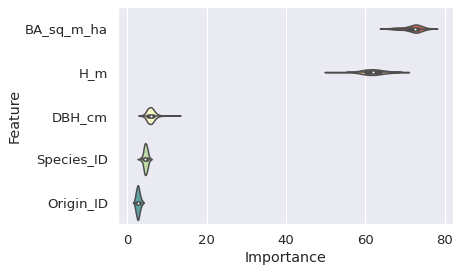

In [32]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'H_m', 'DBH_cm', 'Species_ID', 'Origin_ID'])
plt.show()

In [24]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [30]:
print(len(y_train))
aggr_R_square_std = np.std(aggr_R_square)
print(aggr_R_square_std)
print(aggr_R_square_Q16)
print(aggr_R_square_Q84)

685
0.006970125917045631
0.9655711073259199
0.9782863305237575


In [31]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 118.745, median: 120.0,
 pred. interval (P(0.025)-P(0.975)): 43.0-171.0, 
 conf. interval (p-value=0.95): 112.961-127.192 
***
Aggregate bias statistic: 
 mean: -5.951, median: 12.484,
 pred. interval (P(0.025)-P(0.975)): -748.577-658.932, 
 conf. interval (p-value=0.95): -45.259-58.956 
***
Aggregate RMSE statistic: 
 mean: 24.029, median: 23.63, pred. interval (P(0.025)-P(0.975)): 19.757-30.29, 
 conf. interval (p-value=0.95): 23.296-24.073 
***
Aggregate MSE statistic: 
 mean: 585.264, median: 558.377, pred. interval (P(0.025)-P(0.975)): 390.337-917.492, 
 conf. interval (p-value=0.95): 543.333-580.581 
***
Aggregate R^2 statistic: 
 mean: 0.007, median: 0.973, pred. interval (P(0.025)-P(0.975)): 0.954-0.982, 
 conf. interval (p-value=0.95): 0.972-0.974 
***
Aggregate bias(%) statistic: 
 mean: -0.012, median: 12.484, pred. interval (P(0.025)-P(0.975)): -3.111-2.946, 
 conf. interval (p-value=0.95): -0.198-0.261 
***
Aggregat